In [83]:
#LIBRERIAS A UTILIZAR
import tensorflow as tf
import tensorflow.keras as kr
import keras
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import math as mth
import random as random

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM

from keras.optimizers import RMSprop

In [84]:
#DECLARACION DE CLASES
#Los vectores de 16 elementos se llaman "pixels" porque son un conjunto de elementos "pixel"
#Voy a generar un vector "dataset" que es un vector de 10000 elemenos de tipo "pixels"

class pixel:
    #esta es la clase pixel, contiene seis canales (C1 C2 C3 C4 C5 C6) de enteros de rango 0 a 255 cada uno
    #Cada canal varia sinusoidalmente con parametros aleatorios
    def __init__(self,tiempo, a=0, b=0,A=127,frec1 = 0.05,frec2 = 2, frec3 = 1, frec4 = 0.3, frec5 = 0.8, frec6 = 0.06):
        self.C1 = mth.floor((A * mth.sin(frec1*tiempo + a)) + (A+1) + b) #Aqui genero los seis canales del pixel
        self.C2 = mth.floor((A * mth.sin(frec2*tiempo + a)) + (A+1) + b)
        self.C3 = mth.floor((A * mth.sin(frec3*tiempo + a)) + (A+1) + b)
        self.C4 = mth.floor((A * mth.sin(frec4*tiempo + a)) + (A+1) + b)
        self.C5 = mth.floor((A * mth.sin(frec5*tiempo + a)) + (A+1) + b)
        self.C6 = mth.floor((A * mth.sin(frec6*tiempo + a)) + (A+1) + b)
        #Esto se hace para que los valores sigan dentro del rango 0-255 (si se pasan deben saturar):
        if self.C1 > 255: 
            self.C1 = 255
        if self.C2 > 255: 
            self.C2 = 255
        if self.C3 > 255: 
            self.C3 = 255
        if self.C4 > 255: 
            self.C4 = 255
        if self.C5 > 255: 
            self.C5 = 255
        if self.C6 > 255: 
            self.C6 = 255
        if self.C1 < 0: 
            self.C1 = 0
        if self.C2 < 0: 
            self.C2 = 0
        if self.C3 < 0: 
            self.C3 = 0
        if self.C4 < 0: 
            self.C4 = 0
        if self.C5 < 0: 
            self.C5 = 0
        if self.C6 < 0: 
            self.C6 = 0
    def getData(self): #Esto es para visualizar rapido en caso de que sea necesario
        print("C1:",self.C1, "C2:",self.C2, "C3:", self.C3,"C4:",self.C4, "C5:",self.C5, "C6:", self.C6)
        
        
    def setData(self,tiempo, a1=0, a2=0,a3=0, a4=0,a5=0, a6=0,b=0,A1=127,A2=127,A3=127,A4=127,A5=127,A6=127,frec1 = 0.05,frec2 = 2, frec3 = 1, frec4 = 0.3, frec5 = 0.8, frec6 = 0.06):
        self.C1 = mth.floor((A1 * mth.sin(frec1*tiempo + a1)) + (A1+1) + b) #Aqui seteo los seis canales del pixel
        self.C2 = mth.floor((A2 * mth.sin(frec2*tiempo + a2)) + (A2+1) + b)
        self.C3 = mth.floor((A3 * mth.sin(frec3*tiempo + a3)) + (A3+1) + b)
        self.C4 = mth.floor((A4 * mth.sin(frec4*tiempo + a4)) + (A4+1) + b)
        self.C5 = mth.floor((A5 * mth.sin(frec5*tiempo + a5)) + (A5+1) + b)
        self.C6 = mth.floor((A6 * mth.sin(frec6*tiempo + a6)) + (A6+1) + b)
        
class pixels(list): #Esta es la clase de 16 elementos (cada elemento es un pixel)
    def fillWithPixels(self, cantElementos = 16):
        a1 = mth.floor(random.uniform(0,10)) #Aqui esta la aleatoriedad necesaria para entrenar bien
        a2 = mth.floor(random.uniform(0,10))
        a3 = mth.floor(random.uniform(0,10))
        a4 = mth.floor(random.uniform(0,10))
        a5 = mth.floor(random.uniform(0,10))
        a6= mth.floor(random.uniform(0,10))
        A1 = mth.floor(random.uniform(5,127))
        A2 = mth.floor(random.uniform(5,127))
        A3 = mth.floor(random.uniform(5,127))
        A4 = mth.floor(random.uniform(5,127))
        A5 = mth.floor(random.uniform(5,127))
        A6 = mth.floor(random.uniform(5,127))
        frec1=random.uniform(0.02,2)
        frec2=random.uniform(0.02,2)
        frec3=random.uniform(0.02,2)
        frec4=random.uniform(0.02,2)
        frec5=random.uniform(0.02,2)
        frec6=random.uniform(0.02,2)
        b=random.uniform(0,5)
        
        print("a1: ", a1, "A1: ", A1, "frec1: ", frec1, "b", b)
        k = 0
        for x in range(cantElementos*10):
            #print("Iteracion numero ", x)
            if(x % 10 == 0):
                self.append(pixel(x))
                self[k].setData(x,a1,a2,a3,a4,a5,a6,b,A1,A2,A3,A4,A5,A6,frec1,frec2,frec3,frec4,frec5,frec6)
                k = k + 1
                #print("x: ",x)

In [85]:
#prueba:
X = pixels()
X.fillWithPixels()
X[0].getData()
X[1].getData()
X[2].getData()
X[3].getData()
X[4].getData()
X[5].getData()
X[6].getData()
X[7].getData()
X[8].getData()
X[9].getData()
X[10].getData()
X[11].getData()
X[12].getData()
X[13].getData()
X[14].getData()
X[15].getData()

a1:  3 A1:  26 frec1:  0.4009664422472677 b 1.9826278823987336
C1: 32 C2: 3 C3: 20 C4: 69 C5: 15 C6: 7
C1: 46 C2: 3 C3: 35 C4: 4 C5: 3 C6: 161
C1: 2 C2: 9 C3: 138 C4: 72 C5: 9 C6: 159
C1: 45 C2: 18 C3: 95 C4: 2 C5: 23 C6: 6
C1: 33 C2: 26 C3: 3 C4: 72 C5: 21 C6: 110
C1: 6 C2: 30 C3: 72 C4: 4 C5: 6 C6: 194
C1: 53 C2: 29 C3: 144 C4: 69 C5: 4 C6: 34
C1: 20 C2: 23 C3: 56 C4: 8 C5: 18 C6: 56
C1: 16 C2: 14 C3: 8 C4: 64 C5: 24 C6: 201
C1: 54 C2: 6 C3: 109 C4: 14 C5: 12 C6: 83
C1: 8 C2: 3 C3: 130 C4: 57 C5: 2 C6: 16
C1: 29 C2: 5 C3: 23 C4: 22 C5: 12 C6: 179
C1: 48 C2: 11 C3: 31 C4: 48 C5: 24 C6: 138
C1: 3 C2: 20 C3: 136 C4: 32 C5: 18 C6: 3
C1: 42 C2: 28 C3: 99 C4: 38 C5: 4 C6: 133
C1: 36 C2: 30 C3: 4 C4: 42 C5: 6 C6: 182


In [86]:
#GENERACION DEL DATASET DE ENTRENAMIENTO
#Quiero una lista de 10000 elementos. Cada elemento es un vector de pixels. Es decir dataset1 y dataset2 son listas de 10000 elementos de pixels.
#Cada uno de ellos es un conjunto de 16 elementos pixel, cada uno con sus 6 canales

size = 10000
dataset1 = [] #Para entrenamiento
dataset2 = [] #Para testeo

for x in range(size):
    dataset1.append(pixels())
    dataset1[x].fillWithPixels()
    dataset2.append(pixels())
    dataset2[x].fillWithPixels()

    
#prueba de que anda todo bien hasta aqui:

dataset1[258][4].getData()

a1:  1 A1:  108 frec1:  0.8786317206635784 b 3.3049199731757586
a1:  0 A1:  56 frec1:  0.44229862000986775 b 0.9853969644487082
a1:  5 A1:  46 frec1:  1.3808512141072824 b 0.6401124163977912
a1:  8 A1:  41 frec1:  1.3546419405093704 b 3.4428383115936034
a1:  2 A1:  50 frec1:  0.44643441863329586 b 4.1505548244816985
a1:  4 A1:  51 frec1:  0.29016158634865596 b 2.221423276277342
a1:  5 A1:  121 frec1:  1.593935266526476 b 3.913740040594264
a1:  9 A1:  33 frec1:  0.7920961983742032 b 3.6924086448749334
a1:  9 A1:  6 frec1:  0.43296147028425097 b 3.8047671902459856
a1:  8 A1:  99 frec1:  1.2416110842973604 b 0.890831612954468
a1:  5 A1:  42 frec1:  1.7439076679041547 b 0.34236155921079536
a1:  2 A1:  117 frec1:  1.0460365769679214 b 1.7702488654106703
a1:  9 A1:  45 frec1:  0.5592154837200206 b 1.5957929494096579
a1:  0 A1:  59 frec1:  0.4826598620906163 b 0.030772392737214438
a1:  2 A1:  22 frec1:  0.47450659736348794 b 1.9337758267030498
a1:  0 A1:  41 frec1:  0.3551384740010001 b 0.592

a1:  8 A1:  26 frec1:  1.5471133840501832 b 1.5527377785214447
a1:  2 A1:  17 frec1:  1.4131583244537043 b 1.3394586097944239
a1:  4 A1:  36 frec1:  1.0442206159802172 b 3.8118178445861473
a1:  0 A1:  56 frec1:  1.065428582423778 b 4.515908081965273
a1:  1 A1:  26 frec1:  0.7518770712583597 b 1.1677174266604813
a1:  7 A1:  106 frec1:  0.24322766026503365 b 0.13502751108893263
a1:  1 A1:  62 frec1:  1.8059048490047356 b 0.2679539625625682
a1:  6 A1:  85 frec1:  0.4212681424062598 b 2.7678900795397015
a1:  6 A1:  76 frec1:  1.8254919511922707 b 0.5412635894512718
a1:  1 A1:  85 frec1:  1.9234457554400668 b 2.846464262624993
a1:  3 A1:  100 frec1:  1.0909086724241097 b 0.6420755133652994
a1:  6 A1:  47 frec1:  0.7120606873577882 b 2.3706695726774205
a1:  3 A1:  55 frec1:  0.16658306718022195 b 4.351383209632341
a1:  9 A1:  86 frec1:  1.7038962978627459 b 3.7542971389282758
a1:  0 A1:  83 frec1:  0.19361530427465196 b 0.7794929108419518
a1:  8 A1:  123 frec1:  1.3290790370359025 b 4.137409

a1:  9 A1:  67 frec1:  1.4125837750400518 b 0.41116756276243727
a1:  1 A1:  84 frec1:  1.8152575516249259 b 3.6967035501977517
a1:  4 A1:  100 frec1:  1.146749583945514 b 4.585499766834297
a1:  5 A1:  89 frec1:  0.04376392157234042 b 2.836827708766481
a1:  8 A1:  124 frec1:  0.3383038718244068 b 0.1436339791534652
a1:  7 A1:  68 frec1:  0.18872071050827707 b 4.665293367136252
a1:  2 A1:  22 frec1:  1.8421204108174096 b 3.4120449116168388
a1:  0 A1:  36 frec1:  0.9563693285077735 b 0.7483987893133126
a1:  8 A1:  33 frec1:  1.4189407124587283 b 2.684333070247935
a1:  1 A1:  90 frec1:  1.5697896327248722 b 2.7535610502762053
a1:  9 A1:  42 frec1:  0.6843485215989631 b 4.789410232058276
a1:  0 A1:  22 frec1:  0.5229878008678146 b 2.1339199231737216
a1:  5 A1:  103 frec1:  0.9840186371589688 b 1.7425845387397187
a1:  5 A1:  63 frec1:  0.050278959863352374 b 2.2473729572008865
a1:  7 A1:  75 frec1:  0.18222561980648713 b 0.1449914725160728
a1:  1 A1:  46 frec1:  1.7587050354210092 b 1.348973

a1:  4 A1:  43 frec1:  1.0160276207115786 b 4.299284234732131
a1:  3 A1:  76 frec1:  1.270700758535466 b 4.365664921372529
a1:  9 A1:  108 frec1:  1.7915195396744703 b 0.9539027175868015
a1:  0 A1:  59 frec1:  0.22502159766246446 b 3.5059981367202737
a1:  6 A1:  14 frec1:  1.9068642097385142 b 3.8717697008821643
a1:  5 A1:  56 frec1:  0.8547845956442621 b 2.0210110404095665
a1:  8 A1:  89 frec1:  0.6627366362649743 b 3.1269554194084943
a1:  0 A1:  94 frec1:  0.10367094865968562 b 1.3789452272140164
a1:  5 A1:  39 frec1:  1.910012574427302 b 0.17589265392602693
a1:  7 A1:  31 frec1:  0.8985143600374123 b 3.579235464389055
a1:  9 A1:  121 frec1:  1.7154687678537937 b 4.845788745503374
a1:  1 A1:  58 frec1:  1.1936387396489985 b 3.888307628194545
a1:  4 A1:  77 frec1:  1.7300498641222757 b 4.776939326669259
a1:  1 A1:  88 frec1:  1.2965658661067292 b 1.709444356579251
a1:  0 A1:  78 frec1:  0.8155298389538026 b 0.4445446885491733
a1:  3 A1:  103 frec1:  0.8462575431219513 b 3.713318308016

a1:  1 A1:  120 frec1:  1.241352642191282 b 0.11714762824158453
a1:  5 A1:  84 frec1:  0.0825559741820889 b 0.332968221561174
a1:  7 A1:  49 frec1:  0.5220218389401362 b 1.9006969566537717
a1:  3 A1:  97 frec1:  0.5115121170057247 b 1.3130251878929973
a1:  0 A1:  89 frec1:  0.3440866748205986 b 0.7273806414600054
a1:  7 A1:  45 frec1:  1.65037178518358 b 3.237952310600396
a1:  4 A1:  39 frec1:  1.9512855696297522 b 1.9304009529352717
a1:  9 A1:  65 frec1:  1.537071888854698 b 0.028174808588291578
a1:  7 A1:  37 frec1:  1.4681315986597563 b 1.0521523767730423
a1:  4 A1:  79 frec1:  0.5116763030195058 b 0.8025066483434823
a1:  0 A1:  117 frec1:  0.6345083130070397 b 0.9833679596775241
a1:  5 A1:  84 frec1:  1.4581384337770418 b 2.2000834428158726
a1:  1 A1:  73 frec1:  1.153447685454947 b 0.6183541717445257
a1:  3 A1:  90 frec1:  1.4154777255444233 b 2.2121207405066006
a1:  2 A1:  71 frec1:  1.0514018358663302 b 2.426938926679095
a1:  6 A1:  36 frec1:  0.4662632329258477 b 3.530253626352

a1:  9 A1:  57 frec1:  1.4665225490326061 b 0.38327448498643946
a1:  1 A1:  126 frec1:  0.6320140502100098 b 3.100915654883395
a1:  8 A1:  53 frec1:  1.5000453167491794 b 3.2986310374691263
a1:  4 A1:  106 frec1:  0.6824412557245116 b 3.996468147721811
a1:  2 A1:  67 frec1:  0.7022685123068891 b 3.393748091328505
a1:  6 A1:  18 frec1:  1.689534696813709 b 2.43766640005427
a1:  5 A1:  69 frec1:  1.9788387281333595 b 4.912199263275782
a1:  8 A1:  9 frec1:  1.1262470996740044 b 1.08865396160566
a1:  4 A1:  80 frec1:  0.7489162618644382 b 2.9314313952452817
a1:  9 A1:  75 frec1:  0.6639616272786234 b 2.4834719865686457
a1:  8 A1:  85 frec1:  0.2826126172202476 b 0.6465536346478057
a1:  2 A1:  111 frec1:  0.37522842497829423 b 2.4215403719318997
a1:  4 A1:  46 frec1:  0.6553383863544293 b 3.0555942209263005
a1:  6 A1:  98 frec1:  0.6517108332138344 b 4.413635460796535
a1:  5 A1:  88 frec1:  0.2290280906605272 b 2.7236223587916077
a1:  1 A1:  82 frec1:  0.46137746013966624 b 4.51059387298476

a1:  7 A1:  69 frec1:  1.26054361665762 b 1.3813182051516992
a1:  0 A1:  34 frec1:  0.16588011005442457 b 1.0176773281248592
a1:  2 A1:  37 frec1:  1.1791411807530012 b 0.21918989595683613
a1:  5 A1:  56 frec1:  0.3704389938791355 b 4.773277469317102
a1:  1 A1:  110 frec1:  1.226594266353858 b 1.1562932515570556
a1:  5 A1:  42 frec1:  0.5716223678831577 b 4.482574844562641
a1:  9 A1:  37 frec1:  1.5291108017960446 b 3.5781819557832724
a1:  1 A1:  9 frec1:  0.672703185393857 b 3.5170861761544803
a1:  2 A1:  61 frec1:  1.624033936566927 b 1.1097544230259921
a1:  5 A1:  60 frec1:  1.970691036533411 b 0.2895956184374049
a1:  1 A1:  122 frec1:  0.6274015869039153 b 0.6036188850265944
a1:  3 A1:  72 frec1:  1.2382216940242827 b 4.784275663473943
a1:  4 A1:  95 frec1:  0.17968169069108816 b 0.024353982199424307
a1:  6 A1:  47 frec1:  1.8175656880805293 b 3.7974561298454512
a1:  9 A1:  79 frec1:  1.5518048719523128 b 3.1677293873018817
a1:  9 A1:  50 frec1:  1.190071062451359 b 4.6400704799478

a1:  9 A1:  13 frec1:  1.1591210771105072 b 0.529178803429482
a1:  4 A1:  111 frec1:  1.8371808554152156 b 3.9829314541090444
a1:  7 A1:  50 frec1:  1.4431306218473492 b 3.2592950423900593
a1:  9 A1:  106 frec1:  0.9132011415987961 b 2.1466011405354624
a1:  7 A1:  47 frec1:  1.910147714895883 b 1.6993430245725416
a1:  1 A1:  80 frec1:  0.2928439899018757 b 2.24477928654155
a1:  9 A1:  91 frec1:  0.8553445480445856 b 3.63288184864491
a1:  3 A1:  93 frec1:  1.7793456321223262 b 4.94948669805694
a1:  7 A1:  41 frec1:  0.7133474189785755 b 4.993734315551261
a1:  2 A1:  8 frec1:  0.5782304687841283 b 4.599230603792626
a1:  5 A1:  36 frec1:  1.707898792751105 b 2.640808610905749
a1:  7 A1:  19 frec1:  0.1330177509165677 b 1.6401995386344943
a1:  8 A1:  94 frec1:  0.4971835657108021 b 0.10301222239960162
a1:  4 A1:  61 frec1:  1.3999886268677697 b 2.7952578212943195
a1:  8 A1:  7 frec1:  0.33664577488504 b 0.8585946941306039
a1:  7 A1:  119 frec1:  1.287079221589485 b 3.981209422661665
a1:  1

a1:  0 A1:  54 frec1:  1.3351756278396587 b 1.5050290125370802
a1:  4 A1:  41 frec1:  1.3244916912247011 b 0.7951052686610227
a1:  2 A1:  53 frec1:  1.8367178462579392 b 3.0734892175713746
a1:  3 A1:  104 frec1:  1.4171307152493726 b 4.775991752974683
a1:  2 A1:  57 frec1:  0.5187858611989761 b 0.5149982488204263
a1:  1 A1:  78 frec1:  1.1424378614376534 b 0.39169488360116633
a1:  4 A1:  11 frec1:  1.4412386221385205 b 1.0457274939842005
a1:  1 A1:  57 frec1:  1.140339399039741 b 4.023633191285969
a1:  2 A1:  45 frec1:  0.6044346508381968 b 2.4037813439717337
a1:  8 A1:  113 frec1:  1.651387243165345 b 4.878217937580832
a1:  7 A1:  11 frec1:  1.9678800601610087 b 1.7469904510251777
a1:  0 A1:  103 frec1:  1.1320549447145642 b 4.225766318082462
a1:  9 A1:  64 frec1:  0.9890173897993554 b 4.301301401389602
a1:  6 A1:  58 frec1:  1.0197245863446183 b 0.5000100000849345
a1:  3 A1:  40 frec1:  0.5463552529932437 b 1.381816421965198
a1:  7 A1:  60 frec1:  1.3151286227873418 b 3.7705417439204

a1:  7 A1:  101 frec1:  1.2114643856881702 b 2.713011959498602
a1:  5 A1:  57 frec1:  1.9946366432437592 b 4.132776239423449
a1:  4 A1:  110 frec1:  1.4460091380073894 b 3.0826838690634744
a1:  9 A1:  59 frec1:  1.568583894863085 b 0.7046371554168468
a1:  9 A1:  76 frec1:  0.8508900037082502 b 3.5787095722029187
a1:  4 A1:  34 frec1:  1.2447388002094075 b 0.43751231015367487
a1:  8 A1:  109 frec1:  0.6623657792973386 b 2.428501345304934
a1:  9 A1:  23 frec1:  0.7714823654654523 b 0.16193312574961427
a1:  4 A1:  89 frec1:  1.876707633091641 b 0.9000356425788619
a1:  8 A1:  116 frec1:  0.19898425075221599 b 4.678208412275025
a1:  6 A1:  60 frec1:  1.6832701846521332 b 1.3273989029803313
a1:  7 A1:  97 frec1:  1.8098972169084186 b 2.022071493673145
a1:  5 A1:  72 frec1:  0.9045753485458772 b 2.627197565190374
a1:  8 A1:  35 frec1:  1.981865276249155 b 2.634324305675863
a1:  2 A1:  47 frec1:  1.4889889390813211 b 0.9140842020164375
a1:  3 A1:  72 frec1:  0.7091376949952339 b 1.351775285402

a1:  4 A1:  35 frec1:  0.9949430334760803 b 2.2302551065918714
a1:  4 A1:  56 frec1:  1.0594325431304055 b 3.5892697456722273
a1:  6 A1:  9 frec1:  1.4382402223210722 b 0.6533159760446255
a1:  2 A1:  104 frec1:  0.9974535973148291 b 1.7375402128783235
a1:  2 A1:  37 frec1:  1.3632980760058815 b 0.5278050292090081
a1:  8 A1:  66 frec1:  0.9987905011483432 b 4.534196715091973
a1:  7 A1:  60 frec1:  1.1572921296785692 b 1.5446302450683218
a1:  4 A1:  54 frec1:  0.34017071611222954 b 0.23890568725897676
a1:  1 A1:  9 frec1:  1.9210308557279954 b 1.2653364138854395
a1:  7 A1:  48 frec1:  1.9658855120361571 b 2.17303611313725
a1:  2 A1:  6 frec1:  0.7010178216015601 b 2.232648984389848
a1:  7 A1:  87 frec1:  1.3110002920910746 b 0.24582568627523227
a1:  2 A1:  82 frec1:  1.1946174684944755 b 4.520750191340439
a1:  5 A1:  63 frec1:  1.897109831106974 b 4.662524807897445
a1:  5 A1:  16 frec1:  0.48258314017762394 b 0.41639021371650264
a1:  2 A1:  81 frec1:  1.5856181247692447 b 2.5756466969384

a1:  8 A1:  44 frec1:  1.679715173973677 b 1.123160546768407
a1:  9 A1:  36 frec1:  0.6534174686539778 b 4.528882718196313
a1:  2 A1:  109 frec1:  1.5601890080727934 b 0.9230142344032938
a1:  8 A1:  14 frec1:  0.27257174887001495 b 1.2883522053147223
a1:  1 A1:  85 frec1:  1.1228354088811014 b 2.3062631881108335
a1:  2 A1:  14 frec1:  1.47470409610505 b 2.8691096476528504
a1:  2 A1:  38 frec1:  0.730226991450846 b 2.558440712561985
a1:  1 A1:  37 frec1:  0.20547062061157562 b 2.3756812043374724
a1:  2 A1:  103 frec1:  1.2966080692106108 b 2.7717016954085643
a1:  4 A1:  40 frec1:  0.37063534301549844 b 1.2940897487406948
a1:  1 A1:  88 frec1:  0.8172877057478055 b 2.8977494700700603
a1:  7 A1:  89 frec1:  0.9847277938164299 b 1.0713471628988351
a1:  2 A1:  30 frec1:  0.8920295307568089 b 2.6825666464377633
a1:  1 A1:  114 frec1:  1.3240021471351247 b 0.7479828499258118
a1:  0 A1:  85 frec1:  1.6113005098028876 b 2.646379809372579
a1:  4 A1:  51 frec1:  1.2792694978852277 b 3.15945602849

a1:  1 A1:  104 frec1:  0.8974576104549188 b 2.2578157721493164
a1:  0 A1:  115 frec1:  0.16363742633886058 b 3.0676402577565236
a1:  2 A1:  124 frec1:  0.17818409935023957 b 1.309557829327207
a1:  9 A1:  26 frec1:  1.1849973814001455 b 3.132752352397865
a1:  6 A1:  36 frec1:  0.8930274062895173 b 3.556858329501698
a1:  2 A1:  65 frec1:  1.2985780926214885 b 1.4596911924268874
a1:  8 A1:  72 frec1:  1.9774348142635276 b 4.171117486815314
a1:  9 A1:  114 frec1:  1.501624351430262 b 4.383522593947755
a1:  2 A1:  58 frec1:  1.1122596476991675 b 2.779102013620705
a1:  9 A1:  32 frec1:  1.423320191502387 b 0.035975668946247596
a1:  7 A1:  22 frec1:  1.5511599106058274 b 4.081667650915729
a1:  4 A1:  51 frec1:  1.5519779994598186 b 4.517526393154686
a1:  3 A1:  123 frec1:  1.148123948844993 b 4.711680017064697
a1:  6 A1:  108 frec1:  1.831805607876335 b 2.364749982045518
a1:  4 A1:  54 frec1:  0.08634013128742009 b 1.7569860264511656
a1:  2 A1:  38 frec1:  1.42902249947838 b 3.14053746627133

a1:  4 A1:  16 frec1:  1.4310228504077045 b 4.453486574561179
a1:  6 A1:  46 frec1:  0.1834778593558753 b 1.1855600626194933
a1:  1 A1:  29 frec1:  0.731121967764133 b 4.506581093021079
a1:  6 A1:  14 frec1:  0.6158916634417174 b 4.609423935644219
a1:  5 A1:  47 frec1:  1.157621525646506 b 0.5165234718109513
a1:  5 A1:  111 frec1:  0.7155856919985046 b 1.034073453093447
a1:  6 A1:  68 frec1:  0.20584002319460784 b 3.9475632107435654
a1:  7 A1:  84 frec1:  0.703303730943776 b 2.790543200702693
a1:  0 A1:  123 frec1:  1.9465096382221658 b 3.621653557932254
a1:  5 A1:  94 frec1:  0.39476346597318157 b 3.92550905272956
a1:  0 A1:  20 frec1:  1.4534691781830007 b 0.2713666134014514
a1:  2 A1:  16 frec1:  0.10995729249597476 b 0.30248290347369033
a1:  5 A1:  102 frec1:  0.8294733292869811 b 2.5484869725049464
a1:  2 A1:  50 frec1:  1.287657731275408 b 4.279307805471241
a1:  9 A1:  78 frec1:  1.8560656034074658 b 0.27779815361219373
a1:  0 A1:  28 frec1:  1.430945220816931 b 2.442366021693453

a1:  1 A1:  32 frec1:  1.412740966546579 b 2.738897649489196
a1:  2 A1:  77 frec1:  0.7575487022713951 b 3.7086340583388795
a1:  5 A1:  115 frec1:  0.6753427697664505 b 4.432989165119877
a1:  9 A1:  118 frec1:  0.10628182384152142 b 1.9009011271377507
a1:  7 A1:  61 frec1:  0.18996378224098712 b 3.5942207638258377
a1:  1 A1:  114 frec1:  1.586440275787457 b 1.792935634754111
a1:  1 A1:  117 frec1:  1.0024679834092867 b 3.436340385009525
a1:  1 A1:  70 frec1:  0.4987228187498373 b 4.660712272649377
a1:  9 A1:  38 frec1:  0.06764891963461 b 0.7726424955511579
a1:  0 A1:  64 frec1:  0.9446224091988276 b 2.8548152905762
a1:  3 A1:  64 frec1:  1.39793039449901 b 1.2008973118259152
a1:  0 A1:  114 frec1:  1.8869426291622309 b 3.049509039280063
a1:  9 A1:  123 frec1:  0.05191863416633752 b 2.847186485747304
a1:  4 A1:  56 frec1:  0.6054618520568343 b 0.64795961258027
a1:  0 A1:  48 frec1:  0.2591576967666959 b 4.707280103151225
a1:  2 A1:  32 frec1:  1.4854135809831508 b 2.985492523194531
a1:

a1:  1 A1:  8 frec1:  1.0839632932451713 b 2.2074368059866907
a1:  0 A1:  113 frec1:  1.823641139279511 b 3.5437984710077073
a1:  6 A1:  27 frec1:  1.0636968636891857 b 0.47487260810337606
a1:  1 A1:  119 frec1:  0.7359730165730188 b 2.775185740305825
a1:  7 A1:  23 frec1:  0.5737595749050186 b 0.040484216409164
a1:  0 A1:  15 frec1:  1.706247316934746 b 0.15358778130209472
a1:  9 A1:  79 frec1:  0.542129046531129 b 1.4151686300066841
a1:  0 A1:  19 frec1:  1.7242354232453112 b 4.082627707399238
a1:  5 A1:  100 frec1:  0.38790592484495107 b 1.05552509481387
a1:  7 A1:  51 frec1:  1.004236562877321 b 0.5350200476387368
a1:  0 A1:  47 frec1:  1.320515716129375 b 2.1579693575467966
a1:  8 A1:  30 frec1:  0.6838433422923136 b 4.293923887757424
a1:  5 A1:  83 frec1:  0.15801234219253024 b 1.1101181879015982
a1:  8 A1:  46 frec1:  0.7727246874613648 b 4.159149411776673
a1:  1 A1:  17 frec1:  0.46695000274012693 b 0.020814533668825352
a1:  4 A1:  57 frec1:  0.3254269021124022 b 4.830928214252

a1:  6 A1:  68 frec1:  1.0238334965329816 b 4.18039638691437
a1:  4 A1:  106 frec1:  1.221501975653751 b 2.945686113890317
a1:  4 A1:  65 frec1:  0.04049777973942252 b 3.286453492196803
a1:  4 A1:  33 frec1:  1.1980002641217071 b 0.9632775682898853
a1:  5 A1:  5 frec1:  1.7931009520150045 b 3.348695388133893
a1:  2 A1:  112 frec1:  1.2931156012929972 b 3.9687638806880243
a1:  7 A1:  124 frec1:  1.9713458450968109 b 0.9992997728564912
a1:  2 A1:  33 frec1:  0.9536225693984564 b 0.613538641478561
a1:  6 A1:  11 frec1:  1.5625529495668082 b 3.9587720051174147
a1:  5 A1:  68 frec1:  0.8640638428215139 b 4.495942693843872
a1:  8 A1:  29 frec1:  0.44453642494713363 b 3.8011760964809262
a1:  6 A1:  101 frec1:  0.29755752986505013 b 0.2662347865996406
a1:  1 A1:  65 frec1:  1.0131562724029808 b 4.739385571110545
a1:  4 A1:  92 frec1:  1.0122967784901313 b 2.0655229047970787
a1:  9 A1:  118 frec1:  1.2098730119776424 b 3.9367746851393774
a1:  9 A1:  120 frec1:  0.6951515114453923 b 1.5902239898

a1:  7 A1:  107 frec1:  0.5677978526937982 b 4.754853645018137
a1:  1 A1:  50 frec1:  0.4887449717868438 b 1.6106814734210306
a1:  3 A1:  98 frec1:  1.4563867082769415 b 1.59395388815037
a1:  2 A1:  64 frec1:  0.3849196033359631 b 1.407692772334439
a1:  4 A1:  34 frec1:  1.4255961136887612 b 1.708183335314365
a1:  8 A1:  8 frec1:  1.5396682500931438 b 3.3025263997726357
a1:  2 A1:  115 frec1:  0.657182208787638 b 1.7212559956985602
a1:  6 A1:  43 frec1:  0.7822452474678471 b 1.182805612572374
a1:  9 A1:  55 frec1:  1.3675976565311414 b 4.951424494241531
a1:  3 A1:  11 frec1:  0.27313290033160154 b 3.581008530692136
a1:  8 A1:  5 frec1:  0.11328277746046471 b 3.8516936908386694
a1:  6 A1:  110 frec1:  1.7644199614042126 b 3.5787975630534956
a1:  4 A1:  23 frec1:  1.6163039422019807 b 2.8849748186157917
a1:  6 A1:  52 frec1:  0.49067013883600513 b 0.2600215242497633
a1:  0 A1:  79 frec1:  0.6413755752491918 b 3.1104152671548095
a1:  6 A1:  66 frec1:  0.3202091976960363 b 1.97048026293674

a1:  1 A1:  90 frec1:  1.687296626580281 b 4.399403101375458
a1:  5 A1:  6 frec1:  0.26382785128535036 b 1.186089922914193
a1:  8 A1:  12 frec1:  0.2334145845973596 b 1.4144868019234902
a1:  8 A1:  33 frec1:  0.8969035082706597 b 0.5110469278998575
a1:  4 A1:  70 frec1:  0.11444972559159064 b 3.9753700268190197
a1:  3 A1:  118 frec1:  0.6745121197015415 b 2.003606143986075
a1:  3 A1:  65 frec1:  1.9331658976293598 b 3.623412464254698
a1:  2 A1:  17 frec1:  0.07648965410946192 b 3.565427994804062
a1:  3 A1:  15 frec1:  1.4755086519567795 b 1.7673653257118749
a1:  6 A1:  28 frec1:  1.245659016590035 b 1.4182656783331042
a1:  6 A1:  9 frec1:  0.8618620852876075 b 0.4460970190908897
a1:  8 A1:  102 frec1:  0.10768061894822681 b 2.426085924124335
a1:  2 A1:  122 frec1:  0.33850810084706817 b 2.843904925177614
a1:  1 A1:  59 frec1:  1.1131293897113912 b 2.4029441623592462
a1:  0 A1:  116 frec1:  0.9598916809474547 b 0.9264460367625549
a1:  8 A1:  10 frec1:  0.9226022773827354 b 2.55175954208

a1:  7 A1:  108 frec1:  1.725338388155148 b 2.1205565236420605
a1:  1 A1:  19 frec1:  1.4123249014301018 b 4.825967434053389
a1:  0 A1:  49 frec1:  1.539324583691953 b 0.21362673719439007
a1:  5 A1:  32 frec1:  1.796744184567864 b 3.669374531459914
a1:  8 A1:  42 frec1:  1.6480892324934708 b 3.9959828442772087
a1:  2 A1:  20 frec1:  0.5832490253482103 b 1.313629895545449
a1:  5 A1:  100 frec1:  1.395901826206456 b 3.9245009555398314
a1:  2 A1:  119 frec1:  1.060779170281197 b 4.156214214469346
a1:  7 A1:  126 frec1:  1.202471912234102 b 1.6413003162998034
a1:  6 A1:  106 frec1:  1.5004214320867812 b 2.309786348411236
a1:  9 A1:  103 frec1:  0.2631712732799575 b 2.4066513912956475
a1:  0 A1:  75 frec1:  1.1226241736720879 b 4.72794492063988
a1:  7 A1:  28 frec1:  1.1044321989693462 b 3.2370254886950396
a1:  7 A1:  101 frec1:  1.0883007981892479 b 1.0512211864539274
a1:  0 A1:  43 frec1:  0.8997775631018772 b 4.942172295758974
a1:  7 A1:  59 frec1:  1.293960176132041 b 3.472638274359028


a1:  5 A1:  118 frec1:  1.134907349800432 b 2.0844552409153976
a1:  8 A1:  75 frec1:  1.569759499419508 b 2.8385525229282766
a1:  7 A1:  51 frec1:  0.13798214075352588 b 2.7215855235184723
a1:  1 A1:  64 frec1:  0.6050190643403165 b 0.44022740602015054
a1:  6 A1:  64 frec1:  1.5617223136902827 b 0.8144237286852768
a1:  3 A1:  43 frec1:  0.8881876298838272 b 0.8341747010129513
a1:  0 A1:  24 frec1:  1.209135099566628 b 4.0516189161409475
a1:  6 A1:  116 frec1:  1.4534413517725133 b 2.1952876209179157
a1:  9 A1:  99 frec1:  1.8732571734854169 b 3.6479000016059837
a1:  8 A1:  120 frec1:  0.9570034478800366 b 1.9676982573321933
a1:  2 A1:  86 frec1:  0.7119729410389412 b 0.9416427181624737
a1:  0 A1:  126 frec1:  1.3309962814997893 b 2.8172430118657648
a1:  4 A1:  66 frec1:  0.27107658290678516 b 1.5360054229944864
a1:  3 A1:  113 frec1:  1.2314013493122928 b 1.438475036441761
a1:  2 A1:  113 frec1:  0.4371638195260957 b 0.8754290116853558
a1:  0 A1:  118 frec1:  1.3461391096189395 b 4.354

a1:  6 A1:  110 frec1:  0.8689821607898836 b 2.075456382375898
a1:  9 A1:  75 frec1:  0.5702879249834464 b 3.9776060417715864
a1:  9 A1:  111 frec1:  1.162073764076237 b 3.3119720403720194
a1:  5 A1:  46 frec1:  1.8471334303946692 b 0.6839401701186992
a1:  8 A1:  18 frec1:  0.4174627555612981 b 2.383004014815538
a1:  8 A1:  125 frec1:  1.0010682863054663 b 3.522782148835702
a1:  1 A1:  50 frec1:  0.934100254539619 b 4.072034712027129
a1:  4 A1:  30 frec1:  0.6871251119462557 b 3.7598764794313935
a1:  9 A1:  93 frec1:  0.6122828683244312 b 0.19562956304838175
a1:  2 A1:  19 frec1:  1.689357068074792 b 2.092121028747597
a1:  6 A1:  105 frec1:  1.3583035886233015 b 1.1136201005298252
a1:  7 A1:  86 frec1:  0.18108415234203817 b 0.30129448938667813
a1:  1 A1:  22 frec1:  0.8017581488164306 b 1.229850767459299
a1:  9 A1:  107 frec1:  1.948246687265177 b 3.2855576274368063
a1:  3 A1:  67 frec1:  0.03738606212024244 b 4.8514894265903
a1:  6 A1:  80 frec1:  1.728062331004113 b 4.78613153629905

a1:  4 A1:  74 frec1:  0.9867982932160502 b 2.2726829449149504
a1:  4 A1:  112 frec1:  0.21752136477432332 b 2.954034243434389
a1:  9 A1:  37 frec1:  0.62568808760208 b 1.638651805963881
a1:  7 A1:  119 frec1:  1.1720438854795354 b 4.188398063291589
a1:  3 A1:  66 frec1:  1.264973092264262 b 1.456328994302703
a1:  3 A1:  11 frec1:  0.7508235278419683 b 1.2811639654563212
a1:  8 A1:  84 frec1:  0.9797575014482577 b 0.7032435010775451
a1:  3 A1:  124 frec1:  0.0865073492537651 b 1.92427608432154
a1:  2 A1:  83 frec1:  1.605895064073017 b 4.983765683875571
a1:  7 A1:  71 frec1:  1.605375835227983 b 1.0115556022189953
a1:  9 A1:  74 frec1:  0.7584366190330505 b 3.3722855640154648
a1:  5 A1:  51 frec1:  1.2256059321327626 b 2.591777001286197
a1:  3 A1:  124 frec1:  0.27418524287191376 b 3.041735379277287
a1:  3 A1:  116 frec1:  0.7178911399699931 b 0.1150642837312893
a1:  7 A1:  106 frec1:  0.6325058057920989 b 2.2050080382745674
a1:  8 A1:  12 frec1:  0.8413900995506204 b 2.104833080895416

a1:  4 A1:  37 frec1:  0.2418882809018577 b 2.686307570540405
a1:  5 A1:  77 frec1:  0.4715735048219442 b 4.067155888877045
a1:  0 A1:  95 frec1:  1.891159709583528 b 3.3046661143198515
a1:  1 A1:  34 frec1:  1.0443196362550997 b 3.9307248747561068
a1:  0 A1:  27 frec1:  1.1573421943394886 b 2.0938566953847353
a1:  0 A1:  18 frec1:  1.9618619097580217 b 1.0569986894340606
a1:  7 A1:  26 frec1:  1.7323840319039863 b 0.26312329154061787
a1:  2 A1:  16 frec1:  1.5205933947928592 b 3.300352445665569
a1:  4 A1:  111 frec1:  0.43112402334666067 b 3.588557891554365
a1:  7 A1:  100 frec1:  1.214926868003517 b 3.9388322693379996
a1:  7 A1:  70 frec1:  0.48560985459535516 b 1.297229289757822
a1:  3 A1:  120 frec1:  0.8223704015559898 b 3.9867903532205213
a1:  9 A1:  78 frec1:  0.855460657353083 b 3.4025942928718433
a1:  2 A1:  76 frec1:  0.2509912186058636 b 3.6695383154724572
a1:  5 A1:  91 frec1:  0.43878300255134406 b 1.5480882808123657
a1:  4 A1:  125 frec1:  1.5860270417288123 b 4.006744481

a1:  1 A1:  93 frec1:  0.5649483342097704 b 0.10521256577475713
a1:  3 A1:  118 frec1:  1.6374857776083864 b 3.5425868173419452
a1:  4 A1:  81 frec1:  1.5241801562613728 b 0.09609535129896263
a1:  0 A1:  78 frec1:  0.45573498629164516 b 1.6197179693406731
a1:  4 A1:  125 frec1:  1.4268993507229129 b 0.2369605818888748
a1:  5 A1:  97 frec1:  1.5959457890931974 b 1.4975179239544083
a1:  2 A1:  94 frec1:  0.5792609287435098 b 0.3081271331241764
a1:  0 A1:  58 frec1:  1.5792719348858686 b 0.5970068772993442
a1:  3 A1:  52 frec1:  0.5811338305330178 b 1.3007796857890837
a1:  5 A1:  120 frec1:  0.2732932920202025 b 3.4299666810467766
a1:  4 A1:  74 frec1:  0.516466144907859 b 3.248145298678104
a1:  0 A1:  16 frec1:  0.987247185561838 b 4.901213745342788
a1:  9 A1:  99 frec1:  1.9315168403765284 b 4.536138419789095
a1:  1 A1:  66 frec1:  1.0101523968529624 b 4.436859631159353
a1:  7 A1:  87 frec1:  0.8879423224480509 b 2.6113620939309
a1:  2 A1:  99 frec1:  1.9999331986093851 b 0.327707639485

a1:  4 A1:  9 frec1:  1.234866021135605 b 4.071830695200148
a1:  4 A1:  51 frec1:  1.1829666977241227 b 0.9138495914790351
a1:  4 A1:  66 frec1:  1.2722461365111084 b 3.181384129112494
a1:  1 A1:  45 frec1:  1.7219679035091546 b 3.938702684077131
a1:  7 A1:  116 frec1:  0.7916516762029652 b 2.1981495089443364
a1:  4 A1:  107 frec1:  0.5312459711138575 b 3.2255482662797212
a1:  2 A1:  7 frec1:  1.7246441807690274 b 1.44611014599353
a1:  0 A1:  76 frec1:  1.3742232520630744 b 4.90047506890009
a1:  8 A1:  65 frec1:  0.33828952400097817 b 4.306402277648391
a1:  8 A1:  83 frec1:  0.9732288753772206 b 1.0561495671652532
a1:  7 A1:  71 frec1:  0.8559896596771367 b 4.715838229732402
a1:  9 A1:  69 frec1:  0.8989247737691521 b 4.338668515222908
a1:  3 A1:  79 frec1:  0.5821240840514866 b 1.3575667703737304
a1:  2 A1:  95 frec1:  0.8226350882355165 b 2.1276862557041065
a1:  9 A1:  72 frec1:  0.9825223860076757 b 3.563417726863804
a1:  2 A1:  11 frec1:  0.4836109726780006 b 3.53825297499946
a1:  

a1:  7 A1:  71 frec1:  1.0771870941295763 b 0.440719986606285
a1:  0 A1:  19 frec1:  1.2464855286472762 b 4.915567731188876
a1:  1 A1:  17 frec1:  1.7976238230878552 b 0.04624817232894873
a1:  1 A1:  24 frec1:  1.3191175003991238 b 3.0203390437875384
a1:  6 A1:  46 frec1:  1.1609524668083726 b 2.9664156839226323
a1:  6 A1:  91 frec1:  0.38133770358725927 b 1.0269064071357026
a1:  5 A1:  67 frec1:  0.4166960451873412 b 2.958952090338757
a1:  9 A1:  39 frec1:  1.6292448597621518 b 2.4711011362584117
a1:  5 A1:  32 frec1:  1.9384479607840246 b 3.393978881479469
a1:  3 A1:  122 frec1:  0.49191853110370737 b 1.3730425792551744
a1:  3 A1:  36 frec1:  1.311058364627165 b 1.168225914224867
a1:  7 A1:  112 frec1:  0.40917094238048407 b 2.9814447757869673
a1:  6 A1:  27 frec1:  0.6744328307720668 b 4.8495674151441035
a1:  8 A1:  21 frec1:  0.6366388621345462 b 0.4476613722575423
a1:  2 A1:  112 frec1:  1.3173525996669766 b 0.08957181694910887
a1:  3 A1:  26 frec1:  0.06419423911044662 b 0.329927

a1:  2 A1:  35 frec1:  0.07895397445227835 b 4.747675492663582
a1:  3 A1:  92 frec1:  1.1312856699513023 b 1.672292448487639
a1:  9 A1:  12 frec1:  1.0446087242574498 b 0.29756340913190626
a1:  2 A1:  125 frec1:  0.821228906453481 b 2.1339164654441936
a1:  1 A1:  113 frec1:  0.34725468696702066 b 1.46678460980256
a1:  0 A1:  119 frec1:  1.0695138804405973 b 3.3508970627902155
a1:  6 A1:  116 frec1:  0.7993246527294445 b 3.4662491415556955
a1:  3 A1:  75 frec1:  1.6507897833717833 b 4.057875728049728
a1:  7 A1:  70 frec1:  1.6058770976940604 b 2.071716463192202
a1:  3 A1:  65 frec1:  0.3005365769694093 b 1.0916639587355386
a1:  4 A1:  25 frec1:  1.687268326620872 b 3.9144037580135453
a1:  3 A1:  103 frec1:  1.174287740876556 b 2.5846009567756543
a1:  2 A1:  125 frec1:  1.65897805752711 b 3.7889394532373046
a1:  6 A1:  13 frec1:  1.8000901510240004 b 4.336057925976285
a1:  3 A1:  44 frec1:  0.14524431237657082 b 0.015435334609135709
a1:  5 A1:  58 frec1:  1.240190171560526 b 1.6616687762

a1:  1 A1:  29 frec1:  1.0263867482574376 b 2.0747800162080283
a1:  4 A1:  79 frec1:  0.35674503711356614 b 4.989131520934632
a1:  5 A1:  37 frec1:  1.8116130872479876 b 2.7356415117694874
a1:  7 A1:  48 frec1:  1.5393668762110517 b 2.550469964896604
a1:  0 A1:  83 frec1:  0.6893898833586889 b 1.337011130074981
a1:  9 A1:  44 frec1:  0.5081467589358795 b 1.9084945920316687
a1:  5 A1:  95 frec1:  0.4824041276924147 b 2.465891852554631
a1:  9 A1:  86 frec1:  1.999274955397193 b 4.917954499259901
a1:  1 A1:  63 frec1:  1.7664245778693446 b 4.2346974177803745
a1:  0 A1:  58 frec1:  1.1978929304429649 b 1.4344665518950483
a1:  8 A1:  110 frec1:  1.5297367257854166 b 3.8012413867772588
a1:  8 A1:  22 frec1:  0.8301188221074515 b 0.355888046616778
a1:  6 A1:  21 frec1:  1.6046996644075255 b 2.759195661615875
a1:  6 A1:  65 frec1:  0.2228385004435568 b 4.271922642260037
a1:  8 A1:  90 frec1:  1.8618673148427878 b 3.583707562892664
a1:  0 A1:  124 frec1:  1.570886756343019 b 2.4518258607443193


a1:  4 A1:  8 frec1:  1.4006265800558042 b 0.0934361828485103
a1:  3 A1:  33 frec1:  1.8369107908497782 b 1.8699443083803735
a1:  8 A1:  105 frec1:  0.1795349005877503 b 1.7272561882431985
a1:  0 A1:  48 frec1:  0.1358086094556616 b 4.761556095739234
a1:  6 A1:  115 frec1:  0.9254356511394296 b 3.2998577175842336
a1:  5 A1:  21 frec1:  1.9341153570935483 b 3.207032172725999
a1:  8 A1:  85 frec1:  1.447206990756353 b 4.237664627465827
a1:  7 A1:  64 frec1:  0.38795244370918425 b 2.8185794831420723
a1:  8 A1:  87 frec1:  1.7253112486482847 b 3.9774444807960716
a1:  0 A1:  110 frec1:  1.2743747338261167 b 2.7020055690349527
a1:  4 A1:  46 frec1:  0.6740995974912967 b 4.343031486564473
a1:  6 A1:  90 frec1:  1.6752336712468368 b 3.7089602023462613
a1:  5 A1:  70 frec1:  0.6875200621026958 b 0.5599451775964481
a1:  1 A1:  123 frec1:  1.3446148539614462 b 0.2865046065301141
a1:  4 A1:  109 frec1:  0.22193854212265296 b 2.3622311938186566
a1:  0 A1:  65 frec1:  1.7874174118331159 b 0.25640304

a1:  2 A1:  46 frec1:  1.673276532082052 b 2.887711615379989
a1:  7 A1:  28 frec1:  0.7344400690951035 b 4.102133130571205
a1:  5 A1:  104 frec1:  1.373922771384107 b 3.235232962883255
a1:  0 A1:  104 frec1:  0.3308099080681119 b 0.7333672119670426
a1:  6 A1:  64 frec1:  0.19755448284746444 b 0.010270369215745756
a1:  3 A1:  119 frec1:  1.655384679224291 b 2.6802483753397572
a1:  2 A1:  112 frec1:  0.5260606377313921 b 1.8251826499566048
a1:  1 A1:  87 frec1:  0.7152752204922964 b 4.847060487952813
a1:  7 A1:  15 frec1:  0.743170905253328 b 0.1884438141372896
a1:  1 A1:  122 frec1:  0.8651208561640309 b 3.403867854842848
a1:  5 A1:  83 frec1:  1.0916341564110479 b 3.9791805368266737
a1:  3 A1:  66 frec1:  0.15515436682024902 b 4.760685268897094
a1:  7 A1:  101 frec1:  1.812778924789106 b 4.365464931574805
a1:  7 A1:  79 frec1:  1.3095458128602737 b 0.5881368594259667
a1:  0 A1:  29 frec1:  0.9302649093938098 b 4.365356245615991
a1:  7 A1:  75 frec1:  1.2895943784211317 b 4.578646734725

a1:  1 A1:  72 frec1:  0.2021991838325917 b 3.5098767218989253
a1:  5 A1:  81 frec1:  1.3524186599060457 b 2.496282482393766
a1:  3 A1:  15 frec1:  0.10941590270206807 b 3.905154473363397
a1:  5 A1:  7 frec1:  0.6271491703717954 b 4.260551543195803
a1:  0 A1:  49 frec1:  1.3410319402897206 b 4.778161377217717
a1:  7 A1:  75 frec1:  0.9977589723399031 b 4.417465935952654
a1:  4 A1:  70 frec1:  0.7199596308860298 b 0.5342482324813508
a1:  2 A1:  105 frec1:  1.3477451713048012 b 1.5289215485995329
a1:  7 A1:  95 frec1:  1.4523088751058373 b 1.1705128107044593
a1:  9 A1:  95 frec1:  0.16878423387704308 b 3.6295524119672513
a1:  4 A1:  6 frec1:  1.1323853321112274 b 3.3292805136869537
a1:  7 A1:  15 frec1:  0.9087749706817683 b 3.6476534484673584
a1:  1 A1:  82 frec1:  0.6891445314428889 b 2.8448427468151802
a1:  1 A1:  73 frec1:  1.5439076998742363 b 0.24429094783023464
a1:  6 A1:  121 frec1:  0.8625058745471377 b 4.31793981519448
a1:  6 A1:  69 frec1:  1.1686372989540714 b 1.0709337222151

a1:  5 A1:  16 frec1:  0.3784262422238607 b 2.7902481023912964
a1:  6 A1:  83 frec1:  0.1411319838131168 b 1.135562341503431
a1:  1 A1:  126 frec1:  0.7960456107781789 b 3.543152207883402
a1:  3 A1:  77 frec1:  1.8010636510394877 b 4.291669244997007
a1:  7 A1:  8 frec1:  0.2495275318526862 b 0.44417648557914524
a1:  0 A1:  24 frec1:  0.3176795236488543 b 1.8993118202848502
a1:  5 A1:  67 frec1:  0.8201042376605504 b 4.380790088840318
a1:  7 A1:  60 frec1:  0.29514331209912503 b 0.8140603223634812
a1:  1 A1:  35 frec1:  0.08376049728695131 b 2.941951311059099
a1:  7 A1:  94 frec1:  1.67204140329027 b 4.540678066186169
a1:  5 A1:  92 frec1:  0.6919610228383997 b 4.157008107258779
a1:  5 A1:  9 frec1:  0.1691325347708592 b 0.18428494417869645
a1:  5 A1:  57 frec1:  0.7409091954055523 b 2.248637542945539
a1:  4 A1:  38 frec1:  1.8913681208492026 b 3.996852787846672
a1:  6 A1:  104 frec1:  0.8090756251175623 b 2.2140568579505304
a1:  7 A1:  26 frec1:  1.5666749954326196 b 4.089557901882548


a1:  8 A1:  88 frec1:  1.7573382316671167 b 0.8488714840749917
a1:  3 A1:  6 frec1:  0.5692806143851293 b 4.56544038917872
a1:  6 A1:  87 frec1:  1.7248608732432953 b 3.8191728891878585
a1:  0 A1:  73 frec1:  1.1789408567077866 b 3.0764583812270625
a1:  4 A1:  29 frec1:  1.255904741368596 b 2.473237539027969
a1:  2 A1:  83 frec1:  1.780983935165007 b 3.390752133948065
a1:  5 A1:  95 frec1:  1.0994850915842158 b 1.6800781072002646
a1:  6 A1:  31 frec1:  0.9864591011489184 b 0.5016219768829316
a1:  2 A1:  41 frec1:  0.2297009563977692 b 2.4586870487539283
a1:  3 A1:  65 frec1:  1.6344127779942472 b 1.3120216463585916
a1:  9 A1:  5 frec1:  1.1293619069039202 b 2.6691500205979763
a1:  5 A1:  111 frec1:  0.9790904495429085 b 3.6187286109020174
a1:  4 A1:  51 frec1:  1.745330956744036 b 2.7036648264198626
a1:  2 A1:  20 frec1:  1.4755856807648604 b 1.498961693570463
a1:  9 A1:  79 frec1:  0.9850294345692825 b 2.785543991098844
a1:  4 A1:  83 frec1:  0.35152253994027083 b 3.2084175559409682
a

a1:  1 A1:  18 frec1:  0.4023015739637597 b 4.537149501024423
a1:  4 A1:  30 frec1:  1.4550717086885576 b 1.715211175760583
a1:  5 A1:  73 frec1:  1.3419159260307316 b 0.0005673811856898858
a1:  7 A1:  48 frec1:  1.5339920409228782 b 2.9762440080203016
a1:  7 A1:  101 frec1:  1.9361711043480683 b 3.1946410199149664
a1:  8 A1:  48 frec1:  0.7023843988892472 b 4.1600063630031245
a1:  3 A1:  92 frec1:  0.8372679361618132 b 1.9177894361137704
a1:  5 A1:  109 frec1:  1.4734305690323486 b 0.12904088478212616
a1:  6 A1:  45 frec1:  1.5574311942281929 b 4.587570023582555
a1:  1 A1:  84 frec1:  1.593684664545354 b 2.6504152037813093
a1:  9 A1:  91 frec1:  0.18684854835885975 b 0.44460244083512124
a1:  3 A1:  85 frec1:  0.32811487307712345 b 2.82790741466885
a1:  0 A1:  94 frec1:  1.6265217349755 b 4.781349133720456
a1:  2 A1:  37 frec1:  1.0341311283056331 b 1.6824004805407395
a1:  6 A1:  50 frec1:  0.14420324929963668 b 4.758451915805041
a1:  7 A1:  56 frec1:  1.5857144726231729 b 1.9875421594

a1:  9 A1:  33 frec1:  0.7318464800380392 b 3.4362838036625387
a1:  7 A1:  39 frec1:  1.0888712585490068 b 3.7848910609568556
a1:  9 A1:  66 frec1:  1.8288922992967243 b 3.221104119547886
a1:  9 A1:  56 frec1:  1.3248073896349764 b 4.603813238072291
a1:  1 A1:  18 frec1:  0.565883151736038 b 4.767259077729179
a1:  2 A1:  111 frec1:  1.2784932268029436 b 0.3564319525267484
a1:  0 A1:  12 frec1:  1.442816735500296 b 0.4499943324788186
a1:  4 A1:  5 frec1:  0.2712584998907917 b 0.1050492346833426
a1:  6 A1:  78 frec1:  0.7759613219717825 b 2.96004764584656
a1:  8 A1:  35 frec1:  0.1036633571328253 b 2.552099237490102
a1:  1 A1:  46 frec1:  1.0089442412890905 b 1.9960775430163573
a1:  6 A1:  62 frec1:  0.048672988023712616 b 4.7646942721381595
a1:  7 A1:  100 frec1:  0.25317172237596186 b 0.1462695120898605
a1:  8 A1:  101 frec1:  1.0205105728960244 b 3.454547582719843
a1:  3 A1:  95 frec1:  1.8434371991033769 b 2.9608452215032237
a1:  6 A1:  40 frec1:  0.3684717662373509 b 2.2480433000019

a1:  6 A1:  10 frec1:  0.4494912373973483 b 1.6340851582969056
a1:  2 A1:  97 frec1:  1.0759788224286007 b 0.7352392718553541
a1:  0 A1:  61 frec1:  0.7412242554140099 b 2.4517981780391764
a1:  5 A1:  106 frec1:  1.8221106536368297 b 1.0664312293085743
a1:  3 A1:  99 frec1:  1.9448668082332923 b 1.1419114936634651
a1:  9 A1:  6 frec1:  1.8817976115933361 b 2.7138152093284704
a1:  9 A1:  69 frec1:  1.4301946272895083 b 2.894856107833924
a1:  8 A1:  112 frec1:  0.9130811139615435 b 4.313810150080291
a1:  6 A1:  74 frec1:  0.4725452410902105 b 4.359074252387586
a1:  3 A1:  85 frec1:  1.98962473481175 b 4.339902371304669
a1:  5 A1:  120 frec1:  0.7646075583560868 b 3.3185279035377278
a1:  8 A1:  112 frec1:  0.05268134210427662 b 1.9041388909623513
a1:  5 A1:  11 frec1:  1.231036306428181 b 1.35023723171658
a1:  0 A1:  105 frec1:  1.646101524762149 b 4.993553924371453
a1:  8 A1:  48 frec1:  0.2818544900987317 b 2.5061344052089405
a1:  9 A1:  23 frec1:  1.0145972368568414 b 0.308420567262203

a1:  2 A1:  66 frec1:  1.8906610084686575 b 3.4216807585427063
a1:  2 A1:  44 frec1:  1.4176998568392127 b 3.736295559062413
a1:  1 A1:  71 frec1:  1.7352874157329938 b 3.63252862469143
a1:  3 A1:  42 frec1:  1.738691991561564 b 4.293030133091382
a1:  6 A1:  84 frec1:  1.0177140130528084 b 4.676621609212174
a1:  1 A1:  121 frec1:  1.9905740240247554 b 1.742731917694735
a1:  7 A1:  37 frec1:  1.3083438287640328 b 1.580950518227369
a1:  8 A1:  116 frec1:  0.06970253353588719 b 2.631445393226677
a1:  1 A1:  65 frec1:  0.7169941281230263 b 2.21681410579172
a1:  5 A1:  53 frec1:  0.09385012324046285 b 1.9990219935598263
a1:  6 A1:  111 frec1:  1.0528746520211825 b 1.1834717862550126
a1:  6 A1:  83 frec1:  1.0036988534045894 b 0.07302874602273912
a1:  6 A1:  18 frec1:  1.7318644507058112 b 1.51398237529254
a1:  3 A1:  52 frec1:  0.6265048906271315 b 4.5238117971420895
a1:  6 A1:  82 frec1:  0.49616594598127606 b 1.8645137847440885
a1:  0 A1:  33 frec1:  0.9283841704829441 b 2.779229574334246

a1:  3 A1:  24 frec1:  1.9361331553299441 b 3.9834373969075982
a1:  1 A1:  9 frec1:  0.1485169935217438 b 0.8607064122243735
a1:  7 A1:  108 frec1:  0.5320985096291799 b 0.43527338823680095
a1:  4 A1:  85 frec1:  0.4202838186787189 b 4.160526925309526
a1:  9 A1:  108 frec1:  0.8829181380682909 b 0.5970088251156463
a1:  2 A1:  31 frec1:  1.2377875642064975 b 4.242771236478525
a1:  2 A1:  12 frec1:  1.5358246868511962 b 4.979298712494947
a1:  9 A1:  76 frec1:  1.4071408416929894 b 0.11986930075361002
a1:  6 A1:  77 frec1:  1.9435997437789614 b 4.724941462452746
a1:  6 A1:  19 frec1:  0.9910805411065954 b 0.9863689692967492
a1:  3 A1:  6 frec1:  0.9809698007213608 b 3.1721760253680493
a1:  3 A1:  6 frec1:  1.9855519257103433 b 2.7616038959242166
a1:  6 A1:  58 frec1:  1.1622981045560712 b 4.28446272841628
a1:  9 A1:  14 frec1:  0.2499661369497272 b 3.2954365681181965
a1:  4 A1:  38 frec1:  0.3169500933008752 b 0.5004719839701915
a1:  9 A1:  19 frec1:  1.1060733146842696 b 0.43484964854771

a1:  4 A1:  117 frec1:  1.9303860243141198 b 4.741632682068392
a1:  8 A1:  102 frec1:  1.7712943339521827 b 1.063510994751438
a1:  3 A1:  99 frec1:  0.4422746769495938 b 2.8293898784930755
a1:  3 A1:  104 frec1:  0.06431919514849516 b 3.400285604964913
a1:  3 A1:  72 frec1:  1.2479442142547834 b 0.01917813632501264
a1:  6 A1:  95 frec1:  0.036960813457318845 b 0.6471657031197947
a1:  5 A1:  91 frec1:  0.9660049557765379 b 3.4516686321224577
a1:  2 A1:  17 frec1:  1.4121186809821082 b 1.4594427168548956
a1:  4 A1:  106 frec1:  0.2435673076240368 b 2.044354082351661
a1:  0 A1:  32 frec1:  0.6024717832950105 b 3.468406332582542
a1:  5 A1:  103 frec1:  1.5367946507700765 b 1.991215276317282
a1:  3 A1:  20 frec1:  0.020666856275757865 b 3.7676029966835327
a1:  7 A1:  28 frec1:  1.8285564678376625 b 4.685421740305862
a1:  1 A1:  40 frec1:  0.9825174901624288 b 1.2637719154245541
a1:  0 A1:  31 frec1:  1.1486985485044678 b 4.559698216436323
a1:  9 A1:  46 frec1:  1.7967813978713671 b 2.998959

a1:  2 A1:  49 frec1:  1.0614444360250794 b 4.2304211775584415
a1:  7 A1:  93 frec1:  0.46640864639570273 b 1.4429364542896512
a1:  5 A1:  64 frec1:  0.6881508045937632 b 0.88284307448937
a1:  2 A1:  115 frec1:  0.1253187761489417 b 2.386125051777711
a1:  1 A1:  115 frec1:  1.674662009666076 b 3.769482454015928
a1:  4 A1:  72 frec1:  1.909424559276132 b 4.089661632699929
a1:  5 A1:  107 frec1:  0.8290636358579544 b 1.895341006389596
a1:  2 A1:  18 frec1:  1.7622687441135452 b 2.8950284305024434
a1:  6 A1:  81 frec1:  1.0398649327295728 b 2.304677557632466
a1:  2 A1:  99 frec1:  1.7250115377055348 b 1.2658639145678867
a1:  2 A1:  45 frec1:  0.13644535813835915 b 0.6839003527485943
a1:  8 A1:  82 frec1:  0.3262483992047325 b 4.679365538856941
a1:  8 A1:  49 frec1:  1.9895621223233102 b 3.1974379695944104
a1:  1 A1:  44 frec1:  0.20043897985092993 b 3.6991441036155708
a1:  7 A1:  7 frec1:  0.4491232036424113 b 1.8934517404267526
a1:  4 A1:  79 frec1:  0.3244211823272235 b 2.55403101997825

a1:  3 A1:  60 frec1:  0.7019051713122451 b 2.926756156938744
a1:  1 A1:  70 frec1:  1.719072333575928 b 0.6073854093918812
a1:  2 A1:  74 frec1:  1.5245151296424497 b 0.2617300318393273
a1:  0 A1:  56 frec1:  0.3012827865027296 b 2.7074624828089893
a1:  6 A1:  90 frec1:  0.7734158493217245 b 2.5621830392001286
a1:  0 A1:  87 frec1:  0.7480631691173237 b 2.2022785490303827
a1:  0 A1:  41 frec1:  1.0280986243232264 b 0.6620680609133256
a1:  4 A1:  70 frec1:  0.8937675333090823 b 1.0391964911018503
a1:  8 A1:  51 frec1:  1.4006909838611266 b 3.4322178182962033
a1:  4 A1:  38 frec1:  1.860182168107932 b 0.7340520437704429
a1:  1 A1:  51 frec1:  0.6366102399233888 b 2.479163364967955
a1:  9 A1:  27 frec1:  0.5636735111499609 b 0.14042455476396654
a1:  2 A1:  55 frec1:  0.886555014897244 b 4.554383484339785
a1:  5 A1:  58 frec1:  1.3813376024641713 b 4.064980882667468
a1:  9 A1:  40 frec1:  1.1123161696062693 b 0.07081844610092258
a1:  7 A1:  84 frec1:  1.6907313211721517 b 2.03573428975397

a1:  8 A1:  74 frec1:  1.5175620563418164 b 2.419414003459544
a1:  9 A1:  96 frec1:  0.16523978677187282 b 4.727247061865105
a1:  9 A1:  55 frec1:  1.0316055018771144 b 3.315550026557795
a1:  5 A1:  72 frec1:  0.6405354505755936 b 1.8214284778839511
a1:  0 A1:  52 frec1:  1.0440652783361155 b 0.07361193800095034
a1:  2 A1:  46 frec1:  0.7154929830910659 b 3.4739897349359823
a1:  5 A1:  54 frec1:  0.8344943488573192 b 1.1234460832543147
a1:  5 A1:  106 frec1:  1.219676658369848 b 3.18852060189893
a1:  8 A1:  115 frec1:  1.5967577121120549 b 2.9005850642251323
a1:  4 A1:  22 frec1:  0.4039724950558253 b 1.783644095561544
a1:  2 A1:  22 frec1:  0.21388654566667872 b 3.53191818346408
a1:  5 A1:  17 frec1:  0.8712426035846487 b 4.385981923833379
a1:  7 A1:  88 frec1:  0.4128440127394879 b 3.308245040504265
a1:  4 A1:  109 frec1:  1.1043654203665618 b 4.461111138530207
a1:  8 A1:  108 frec1:  1.9228376201814374 b 2.4022565861293903
a1:  9 A1:  65 frec1:  0.051742436661718114 b 1.197494983926

a1:  2 A1:  96 frec1:  0.08737903609904374 b 0.08949936282708848
a1:  5 A1:  50 frec1:  1.8858670456819915 b 2.4472017536859116
a1:  1 A1:  89 frec1:  1.5017999448097126 b 1.7479835125227288
a1:  0 A1:  78 frec1:  1.6528183786128199 b 1.0944173526486716
a1:  8 A1:  112 frec1:  1.3473280586723297 b 2.0367880376105116
a1:  5 A1:  37 frec1:  1.361352830515379 b 2.6651123881782905
a1:  6 A1:  119 frec1:  0.3284908501522191 b 0.8760743756723194
a1:  6 A1:  100 frec1:  1.8271049699451956 b 4.259109033290777
a1:  4 A1:  44 frec1:  0.10036067573978714 b 0.40212732165835097
a1:  6 A1:  88 frec1:  0.05711793103383227 b 4.717220757021318
a1:  3 A1:  93 frec1:  0.5125658541563564 b 1.3186233215290566
a1:  2 A1:  94 frec1:  1.805882531431138 b 2.5228028645452865
a1:  1 A1:  53 frec1:  1.2000369578320644 b 2.4620895629363075
a1:  0 A1:  97 frec1:  1.8239940307931344 b 2.9249582903852294
a1:  1 A1:  120 frec1:  0.05752172775441232 b 2.431880067303262
a1:  2 A1:  103 frec1:  1.8321008170014104 b 2.952

a1:  4 A1:  21 frec1:  1.4816955549530624 b 0.6566029728611328
a1:  9 A1:  35 frec1:  0.6834267716565161 b 3.5321321425529284
a1:  1 A1:  55 frec1:  1.429807061867867 b 3.2188049190796644
a1:  8 A1:  96 frec1:  0.29547016419597155 b 4.514324378946624
a1:  3 A1:  109 frec1:  1.1142364990063562 b 1.6350153791893391
a1:  0 A1:  108 frec1:  1.2692457738322547 b 4.19688319439819
a1:  7 A1:  30 frec1:  1.2551746463873295 b 3.045087235915753
a1:  0 A1:  7 frec1:  0.40216086015371943 b 2.035488340004183
a1:  5 A1:  117 frec1:  0.5940540929417327 b 2.834697409635125
a1:  0 A1:  40 frec1:  1.8453866054578205 b 3.303441841019059
a1:  6 A1:  109 frec1:  1.0018552322052139 b 0.48225045710554637
a1:  9 A1:  20 frec1:  1.8532266308268182 b 1.9317525345983806
a1:  3 A1:  30 frec1:  1.9989047779863383 b 2.1532370130548535
a1:  1 A1:  101 frec1:  0.8033399361135835 b 1.1948334470379178
a1:  0 A1:  60 frec1:  0.7262599535590061 b 4.7151126702877475
a1:  3 A1:  75 frec1:  0.10536718656492258 b 3.426289998

a1:  5 A1:  49 frec1:  0.6520157858904774 b 2.6839425427039543
a1:  2 A1:  58 frec1:  1.5205095160065194 b 1.3715309398612257
a1:  1 A1:  67 frec1:  1.23207352635159 b 4.7457694635131915
a1:  1 A1:  72 frec1:  0.5788459785716681 b 2.3458509491074775
a1:  4 A1:  18 frec1:  1.8607882101326687 b 0.5338052860999054
a1:  7 A1:  37 frec1:  1.834167935818154 b 0.5956876029862146
a1:  5 A1:  92 frec1:  1.000185845468263 b 0.9003615523237674
a1:  7 A1:  7 frec1:  0.3173305162390278 b 2.3628712581938127
a1:  4 A1:  17 frec1:  0.28882081879143034 b 3.8944048994106604
a1:  9 A1:  58 frec1:  0.9159372745362732 b 4.61719528020889
a1:  3 A1:  26 frec1:  1.5689800159674392 b 4.92977798388508
a1:  7 A1:  36 frec1:  1.4299732055430423 b 3.3217523402063662
a1:  9 A1:  83 frec1:  0.6818980220868978 b 1.6549753755747694
a1:  2 A1:  89 frec1:  0.9864678121098192 b 0.03133203731043588
a1:  2 A1:  85 frec1:  1.0630607468906568 b 3.7900491330697443
a1:  2 A1:  29 frec1:  1.7836485068201227 b 4.185181638290844


a1:  3 A1:  30 frec1:  1.530467014338426 b 3.904500429238314
a1:  8 A1:  113 frec1:  0.4052898355558244 b 4.95554915164861
a1:  2 A1:  59 frec1:  0.2818299970603037 b 3.8637820217633756
a1:  9 A1:  62 frec1:  0.9032577794536368 b 4.544816323339277
a1:  7 A1:  63 frec1:  0.10603649654462276 b 2.6927701069792533
a1:  9 A1:  99 frec1:  0.5547464993543377 b 0.704454269376828
a1:  7 A1:  17 frec1:  1.2258856630930708 b 2.422667402837674
a1:  0 A1:  41 frec1:  0.8432534397965916 b 2.282852256657628
a1:  7 A1:  37 frec1:  0.7703125281311867 b 1.9094055890171373
a1:  9 A1:  25 frec1:  0.5268792834121016 b 4.960343227211875
a1:  3 A1:  87 frec1:  1.9194573301318463 b 3.2994580846439043
a1:  9 A1:  49 frec1:  1.8436781505423967 b 1.396619147100806
a1:  8 A1:  65 frec1:  1.095248662295512 b 4.957343331891918
a1:  0 A1:  67 frec1:  1.9075853354480488 b 0.9030115043504955
a1:  4 A1:  86 frec1:  1.7731920764153912 b 1.7138555006484302
a1:  5 A1:  67 frec1:  0.6144286296052691 b 4.3058953910255235
a1

a1:  9 A1:  116 frec1:  0.9195300315615096 b 4.1586633286917065
a1:  0 A1:  26 frec1:  1.728062105463185 b 2.754058963402943
a1:  0 A1:  13 frec1:  1.1351772843390775 b 2.254229000292013
a1:  6 A1:  79 frec1:  0.5296646792749389 b 2.140015350390107
a1:  6 A1:  52 frec1:  0.6181859299958823 b 2.34328980622493
a1:  3 A1:  121 frec1:  1.2273150593416022 b 3.9938641368832206
a1:  2 A1:  8 frec1:  0.6163485251632148 b 1.2652691212188598
a1:  5 A1:  13 frec1:  0.9701110320673665 b 1.9889273562980603
a1:  7 A1:  71 frec1:  0.5874748041046335 b 4.5858594852309515
a1:  8 A1:  110 frec1:  0.9662883548714428 b 3.7662302855280236
a1:  4 A1:  49 frec1:  1.7035983567547863 b 4.388322075312151
a1:  2 A1:  110 frec1:  1.4486804636377337 b 1.053472694101495
a1:  6 A1:  122 frec1:  1.6632503565071917 b 4.763791480065912
a1:  9 A1:  100 frec1:  1.5097833483166965 b 3.004903464973376
a1:  2 A1:  37 frec1:  0.6542577309795179 b 0.2163310887657105
a1:  0 A1:  65 frec1:  1.8087956266444496 b 1.12396018644867

a1:  9 A1:  105 frec1:  1.7778277840348595 b 4.318139679830733
a1:  6 A1:  7 frec1:  0.8543944933184938 b 4.310664150903096
a1:  2 A1:  51 frec1:  0.528296114990158 b 4.631477871286781
a1:  2 A1:  80 frec1:  0.07160808367290125 b 1.8419958399003629
a1:  0 A1:  30 frec1:  1.4590862390588326 b 1.292469245462019
a1:  7 A1:  116 frec1:  1.849806235480396 b 4.219001486221023
a1:  1 A1:  71 frec1:  1.4591822627572464 b 3.739932492234021
a1:  6 A1:  34 frec1:  1.506097695983564 b 1.6339773283070929
a1:  0 A1:  17 frec1:  0.4441259159100643 b 0.22240241416709494
a1:  8 A1:  37 frec1:  0.7207123247726649 b 3.8285986699711536
a1:  6 A1:  37 frec1:  0.3915131794426762 b 0.06328164564189331
a1:  1 A1:  52 frec1:  1.2829133272895357 b 4.220318014439918
a1:  6 A1:  77 frec1:  0.44747677716337997 b 1.281049552711055
a1:  9 A1:  18 frec1:  0.8572426709849552 b 0.9757289820299231
a1:  3 A1:  18 frec1:  1.8275095887322954 b 0.3454588630150923
a1:  0 A1:  15 frec1:  1.6340094324269845 b 4.719995448019353

a1:  1 A1:  46 frec1:  0.11979885802369326 b 1.9177046907436184
a1:  4 A1:  123 frec1:  1.6838433806151918 b 4.237860416756562
a1:  0 A1:  32 frec1:  1.6696967070212314 b 0.28736475404483763
a1:  7 A1:  51 frec1:  0.11287136031114668 b 2.0968513737166976
a1:  3 A1:  12 frec1:  0.03637258450099243 b 2.6036299902906053
a1:  6 A1:  54 frec1:  1.6283015120352693 b 1.2628464188687012
a1:  7 A1:  35 frec1:  0.24567625282352798 b 1.5286907517971526
a1:  2 A1:  112 frec1:  0.9020206986470133 b 0.20135335719242253
a1:  4 A1:  7 frec1:  1.6187514749177172 b 3.2590565398606595
a1:  3 A1:  45 frec1:  1.910631826628111 b 4.668608084615506
a1:  8 A1:  35 frec1:  1.6431020127571991 b 2.463323819849254
a1:  2 A1:  7 frec1:  1.466691645153876 b 4.086259988326305
a1:  0 A1:  93 frec1:  0.047033925996048 b 3.5436113947603176
a1:  7 A1:  85 frec1:  0.428153796544898 b 0.050327807435553984
a1:  0 A1:  37 frec1:  0.4086954994825169 b 1.0570083845709495
a1:  7 A1:  64 frec1:  0.7757717677918353 b 0.599592414

a1:  6 A1:  46 frec1:  1.8375629168605696 b 3.637415210630863
a1:  1 A1:  114 frec1:  1.1647598386210434 b 3.576674920523082
a1:  4 A1:  53 frec1:  0.6516664835715671 b 4.153729130893511
a1:  6 A1:  69 frec1:  0.7883582064563873 b 3.624488851518661
a1:  8 A1:  38 frec1:  1.3150928175938015 b 1.4943697969199976
a1:  1 A1:  84 frec1:  0.4978791601303147 b 4.7736890925412485
a1:  7 A1:  7 frec1:  0.5259321405306661 b 1.3163051008317046
a1:  4 A1:  114 frec1:  1.2146278129348917 b 1.6047277746933624
a1:  8 A1:  18 frec1:  0.13697343282869653 b 1.6102266009765782
a1:  1 A1:  13 frec1:  1.0312468113838151 b 2.0658967772098293
a1:  8 A1:  82 frec1:  1.1817378690208344 b 3.540296594889873
a1:  1 A1:  91 frec1:  0.46651204364680865 b 2.9763725140672066
a1:  5 A1:  59 frec1:  0.9822952313943618 b 3.2418612542973384
a1:  0 A1:  7 frec1:  0.8431372720371112 b 0.2673008415497441
a1:  2 A1:  103 frec1:  0.4976495981686483 b 2.911517481358072
a1:  4 A1:  65 frec1:  1.8828886710202155 b 0.531182292944

a1:  4 A1:  93 frec1:  0.5538550614709089 b 0.935776889561396
a1:  2 A1:  95 frec1:  1.504365310251953 b 1.8746207779787982
a1:  2 A1:  82 frec1:  1.3787350145936708 b 3.3328138170901322
a1:  1 A1:  97 frec1:  0.5952088872774979 b 1.885775484000865
a1:  7 A1:  96 frec1:  1.190481902231512 b 4.1541163075882395
a1:  3 A1:  69 frec1:  0.7851861408962661 b 0.4715866049852818
a1:  7 A1:  106 frec1:  1.9390147970212186 b 4.10926826264538
a1:  3 A1:  6 frec1:  0.13698275194822765 b 4.414441417544212
a1:  3 A1:  115 frec1:  0.5547935780979364 b 2.798097269146471
a1:  0 A1:  123 frec1:  0.19691439677418038 b 0.2547664072497141
a1:  3 A1:  124 frec1:  1.3291554392104221 b 4.428132762131382
a1:  4 A1:  69 frec1:  1.1291758696446375 b 0.33229036638726894
a1:  1 A1:  41 frec1:  1.875958335672415 b 0.9949190403041142
a1:  0 A1:  12 frec1:  1.1433593001138762 b 2.59237817826015
a1:  4 A1:  5 frec1:  0.3132711836000359 b 3.1245716715127476
a1:  1 A1:  92 frec1:  0.8709610212740331 b 3.8917168624213367

a1:  8 A1:  43 frec1:  1.1736425619759057 b 3.7513889717888675
a1:  2 A1:  51 frec1:  0.7596461847291054 b 3.619380986316818
a1:  7 A1:  88 frec1:  1.6156292859246806 b 3.9982784090238965
a1:  0 A1:  65 frec1:  0.16473703799083 b 0.5884626335159021
a1:  8 A1:  125 frec1:  1.577594944595017 b 4.417636715966662
a1:  2 A1:  34 frec1:  1.8972784585786306 b 4.1457717990204905
a1:  4 A1:  123 frec1:  0.18491260282482333 b 4.290134863909956
a1:  2 A1:  116 frec1:  1.5752798324388058 b 1.8065753266706226
a1:  9 A1:  28 frec1:  1.9198625573175252 b 1.0867149165060408
a1:  7 A1:  10 frec1:  1.827834816491347 b 3.1822764905467826
a1:  0 A1:  11 frec1:  0.6780221295505362 b 2.219647008087713
a1:  3 A1:  102 frec1:  0.5329605611676147 b 1.0437288624795156
a1:  2 A1:  98 frec1:  1.4948886349505859 b 2.4078601951281318
a1:  4 A1:  98 frec1:  0.24118689538626126 b 2.0120989310609967
a1:  7 A1:  39 frec1:  1.8061572362945357 b 0.11805608641277054
a1:  3 A1:  54 frec1:  0.18023258760547953 b 2.967273269

a1:  0 A1:  79 frec1:  0.5823410072473668 b 2.382409154872205
a1:  7 A1:  22 frec1:  1.3055443208857307 b 1.5799510424904346
a1:  0 A1:  76 frec1:  1.6887966771632112 b 2.8866000019279143
a1:  1 A1:  25 frec1:  0.1027793305221996 b 0.6111224464340137
a1:  3 A1:  19 frec1:  1.5865048243358157 b 2.327920286462384
a1:  3 A1:  52 frec1:  1.2435414245444978 b 0.3137655022158775
a1:  2 A1:  73 frec1:  1.7634057039129218 b 4.843783964475271
a1:  5 A1:  117 frec1:  1.3496679949372665 b 0.48115387488524675
a1:  7 A1:  39 frec1:  0.46089696202795166 b 0.36456892587772793
a1:  8 A1:  55 frec1:  0.1564695026387561 b 1.048096011194792
a1:  9 A1:  113 frec1:  1.8398238184882854 b 1.6695494956039698
a1:  4 A1:  85 frec1:  1.501875876120497 b 1.2496141113700865
a1:  3 A1:  61 frec1:  0.5137088322672206 b 4.342500538074365
a1:  5 A1:  38 frec1:  1.3166137281327879 b 0.10267698111512458
a1:  0 A1:  69 frec1:  0.8379506541038085 b 2.013781265907732
a1:  0 A1:  113 frec1:  0.7468823284340708 b 2.136121805

a1:  5 A1:  18 frec1:  0.8763089819524633 b 1.439058584486204
a1:  4 A1:  39 frec1:  1.6857414049126713 b 2.7267657080538985
a1:  9 A1:  18 frec1:  0.22186512596913074 b 2.8950885168604445
a1:  3 A1:  95 frec1:  0.11876581396632177 b 3.867157308185778
a1:  2 A1:  16 frec1:  0.1650922590829965 b 0.7515187399953716
a1:  0 A1:  75 frec1:  1.7147120229030999 b 1.3288446261945375
a1:  5 A1:  104 frec1:  1.4001248269701614 b 0.5823470577468592
a1:  2 A1:  70 frec1:  0.9587174343716844 b 2.6674375981371816
a1:  1 A1:  96 frec1:  0.4158383529250737 b 1.1583374555671129
a1:  5 A1:  59 frec1:  1.6037746906742252 b 3.6952599595455373
a1:  9 A1:  26 frec1:  1.0098093216085453 b 0.3626589509753275
a1:  9 A1:  113 frec1:  0.4989445572590768 b 2.63326455045481
a1:  4 A1:  59 frec1:  0.7471401397658888 b 1.6595815571024124
a1:  8 A1:  43 frec1:  0.4564311325427276 b 3.1930669253849473
a1:  5 A1:  98 frec1:  1.7601488651704624 b 1.0689704435905418
a1:  3 A1:  20 frec1:  1.2336002676118505 b 1.725057564

a1:  8 A1:  81 frec1:  0.07527617288923466 b 4.131703567399071
a1:  6 A1:  19 frec1:  0.21717499871186696 b 0.18100999394124961
a1:  6 A1:  24 frec1:  1.564231209837974 b 4.6694395034051155
a1:  1 A1:  31 frec1:  0.7739133059755806 b 2.4116958324589266
a1:  7 A1:  80 frec1:  1.2329901506753536 b 1.0073937818170626
a1:  3 A1:  106 frec1:  0.6900207105994619 b 0.1015369066916888
a1:  8 A1:  48 frec1:  0.6357699100765315 b 4.193140233720085
a1:  8 A1:  77 frec1:  0.6268160690289042 b 4.673354727229706
a1:  0 A1:  79 frec1:  0.5098194067989967 b 4.991131503389771
a1:  6 A1:  87 frec1:  1.606137625283057 b 4.415630517846864
a1:  9 A1:  61 frec1:  0.8834267122756422 b 2.9854904260135955
a1:  8 A1:  24 frec1:  0.5401421246638686 b 0.7839467394867683
a1:  9 A1:  8 frec1:  0.9093672217987432 b 0.4187250587238006
a1:  8 A1:  93 frec1:  0.3184395447180123 b 3.1253830321738563
a1:  2 A1:  78 frec1:  1.106191365365453 b 1.8217345994039307
a1:  9 A1:  37 frec1:  0.761541555438245 b 2.349157896300169

a1:  5 A1:  124 frec1:  1.3703375222021572 b 1.2747242102502625
a1:  3 A1:  55 frec1:  1.7529086666098268 b 0.26752079363547565
a1:  6 A1:  59 frec1:  1.4063512534529719 b 3.5901662559245615
a1:  3 A1:  94 frec1:  1.1766315920872619 b 4.107029254563947
a1:  8 A1:  87 frec1:  1.6818889067272653 b 2.0117482754622613
a1:  4 A1:  107 frec1:  1.3526155130778938 b 2.673959725455023
a1:  3 A1:  99 frec1:  1.7850641653543553 b 3.7055535964461
a1:  1 A1:  46 frec1:  1.2907475953345828 b 3.7719596972346983
a1:  9 A1:  102 frec1:  1.1623405882605946 b 3.8369882828104
a1:  0 A1:  31 frec1:  1.630511107445847 b 1.9073459506388324
a1:  7 A1:  52 frec1:  1.7240193759950209 b 3.214820907835204
a1:  1 A1:  80 frec1:  0.6633067353093699 b 4.693072358381473
a1:  2 A1:  61 frec1:  0.6530678324724644 b 3.471687107097911
a1:  4 A1:  57 frec1:  0.13583855647194953 b 3.499184807206464
a1:  5 A1:  54 frec1:  0.7067927641815989 b 2.449380282903934
a1:  1 A1:  24 frec1:  1.958285383861475 b 1.9288083150673123
a1

a1:  6 A1:  25 frec1:  0.09677838241153042 b 4.200339224230289
a1:  7 A1:  96 frec1:  1.2377693647680095 b 1.343166541340974
a1:  9 A1:  25 frec1:  0.3021488940914543 b 2.8468014593397233
a1:  4 A1:  8 frec1:  0.18491563995428859 b 3.7458189787797123
a1:  5 A1:  20 frec1:  1.964019359166963 b 4.010959244801619
a1:  0 A1:  88 frec1:  1.7310838217242965 b 3.841411248569439
a1:  5 A1:  123 frec1:  1.7351004174458373 b 3.5511375890409953
a1:  9 A1:  102 frec1:  1.4705273800070509 b 1.1719401845921236
a1:  9 A1:  47 frec1:  0.8533047897861524 b 2.783442119474375
a1:  3 A1:  15 frec1:  1.2879841332933135 b 3.8635738989809405
a1:  7 A1:  60 frec1:  1.214315895318248 b 0.24025514570493844
a1:  1 A1:  54 frec1:  1.1233164170135674 b 1.2560538732748172
a1:  0 A1:  45 frec1:  1.0964871559919291 b 3.124140376307873
a1:  1 A1:  104 frec1:  1.6993189138357956 b 3.6448884994679
a1:  1 A1:  40 frec1:  1.1143722564164305 b 0.6286025870236944
a1:  0 A1:  77 frec1:  1.3445302352844621 b 4.857526721181288

a1:  6 A1:  36 frec1:  1.652020351758751 b 3.7348243152210174
a1:  9 A1:  115 frec1:  1.9324681319006263 b 2.487350586561505
a1:  8 A1:  96 frec1:  1.016698339333937 b 0.0915123405881646
a1:  4 A1:  122 frec1:  0.5836136213854902 b 3.317716962529833
a1:  6 A1:  73 frec1:  0.29778914742136753 b 2.5554009014541883
a1:  8 A1:  80 frec1:  1.3250815157846905 b 4.735470785074524
a1:  3 A1:  40 frec1:  0.8581547159049266 b 3.794240800896484
a1:  0 A1:  49 frec1:  0.2432080157898049 b 0.3013689482505233
a1:  9 A1:  110 frec1:  0.9509417824245724 b 4.7038778735437745
a1:  9 A1:  120 frec1:  0.06672438500119217 b 2.8935553354568238
a1:  5 A1:  115 frec1:  0.09499077154478361 b 2.6312520928841425
a1:  2 A1:  75 frec1:  1.023929720160545 b 1.126078665580278
a1:  4 A1:  83 frec1:  1.871205092929336 b 1.6161313772846668
a1:  1 A1:  84 frec1:  0.839791385596819 b 1.215266512464635
a1:  3 A1:  43 frec1:  0.46619123168465043 b 0.5702461896348465
a1:  6 A1:  94 frec1:  1.257224546108644 b 1.543479261580

a1:  2 A1:  109 frec1:  1.3441934777733133 b 1.5001979751929595
a1:  2 A1:  96 frec1:  1.0799542536415139 b 4.244251650145438
a1:  7 A1:  33 frec1:  1.9277178613554775 b 2.01153044306875
a1:  9 A1:  71 frec1:  0.9728152906495718 b 4.037853593745791
a1:  4 A1:  22 frec1:  0.5020054850879235 b 4.834570792945342
a1:  7 A1:  59 frec1:  0.07163712710842036 b 0.2843191272526019
a1:  8 A1:  73 frec1:  1.31801826847237 b 1.2490328222383513
a1:  6 A1:  46 frec1:  1.9964313033796268 b 3.4345839956057533
a1:  8 A1:  82 frec1:  1.1423731671234507 b 0.34568033879564086
a1:  7 A1:  54 frec1:  0.3917555924885307 b 4.557005992844511
a1:  5 A1:  67 frec1:  1.4207464770415663 b 1.095976171468838
a1:  8 A1:  90 frec1:  1.8771738113822065 b 2.531707906172935
a1:  5 A1:  40 frec1:  0.03127343237754893 b 1.361739387091931
a1:  7 A1:  124 frec1:  1.5476115577401242 b 1.854970492632384
a1:  9 A1:  96 frec1:  1.7067261949096064 b 1.025544889012232
a1:  6 A1:  61 frec1:  1.4877157549131363 b 4.868023842626868
a

a1:  0 A1:  13 frec1:  1.2351100301633287 b 2.7476605240499725
a1:  5 A1:  72 frec1:  1.9099338406875852 b 2.9135059114330004
a1:  0 A1:  23 frec1:  1.3919835990087985 b 1.4987312430362731
a1:  7 A1:  46 frec1:  0.3025522005362467 b 2.457569212349669
a1:  9 A1:  65 frec1:  0.2695018808639924 b 2.303786115713739
a1:  9 A1:  14 frec1:  1.1953921266317251 b 1.3400992053287286
a1:  6 A1:  59 frec1:  0.21461122007565672 b 2.004833124668885
a1:  9 A1:  40 frec1:  0.3451661300066332 b 3.6028201565632925
a1:  9 A1:  24 frec1:  0.9390246713149891 b 1.3043683674538087
a1:  3 A1:  102 frec1:  1.9724533446327828 b 0.7118366247435032
a1:  2 A1:  118 frec1:  0.07676126125565963 b 3.698542396841522
a1:  4 A1:  31 frec1:  1.4955151974356806 b 1.935365176215364
a1:  2 A1:  37 frec1:  0.2322604649918261 b 0.8315830659852835
a1:  3 A1:  49 frec1:  1.1839571020009363 b 2.161478619031728
a1:  9 A1:  13 frec1:  0.9169631166714153 b 0.7344808501419708
a1:  7 A1:  46 frec1:  1.0566630510940698 b 4.75130123843

a1:  6 A1:  80 frec1:  0.6667219331091089 b 4.381887277994652
a1:  6 A1:  58 frec1:  1.8247703638682864 b 2.6080009515528375
a1:  9 A1:  91 frec1:  0.09497575002898154 b 4.140489342808828
a1:  9 A1:  77 frec1:  0.5314267491108429 b 3.8234804196059944
a1:  1 A1:  99 frec1:  1.1032960274375598 b 3.7985474868642086
a1:  4 A1:  88 frec1:  0.4787257391119952 b 3.8708009775992287
a1:  0 A1:  124 frec1:  1.0247982990110047 b 4.009584084881567
a1:  1 A1:  12 frec1:  1.1200611196849826 b 2.906443282554931
a1:  1 A1:  81 frec1:  1.0864931098133093 b 0.8600714929281755
a1:  5 A1:  25 frec1:  1.7626357132802615 b 4.339441241245922
a1:  1 A1:  77 frec1:  1.4697596824702504 b 2.0761846511101427
a1:  5 A1:  34 frec1:  0.543750186771038 b 0.4927646629468385
a1:  8 A1:  102 frec1:  0.5085063576672708 b 2.8601896861165947
a1:  0 A1:  48 frec1:  0.8326273509884992 b 2.1561364761510644
a1:  8 A1:  83 frec1:  0.739630162598251 b 1.4380563571246652
a1:  4 A1:  16 frec1:  1.67110405735918 b 4.359566947602592

a1:  9 A1:  84 frec1:  0.8302360922556133 b 2.661445460901957
a1:  8 A1:  94 frec1:  0.9248725264254704 b 3.2711667787522023
a1:  7 A1:  13 frec1:  1.1751295781813915 b 2.068213275963445
a1:  2 A1:  19 frec1:  1.9974601333137758 b 3.4050764160675673
a1:  8 A1:  13 frec1:  1.8936229502992759 b 2.598407308895018
a1:  1 A1:  76 frec1:  0.9328638597862482 b 3.5026775491269193
a1:  6 A1:  80 frec1:  1.6133555173317984 b 2.791653127475975
a1:  2 A1:  66 frec1:  1.486057966603032 b 1.8909295422694794
a1:  9 A1:  5 frec1:  1.4680281669992299 b 3.1940226476342333
a1:  5 A1:  53 frec1:  0.6489442388188699 b 0.24464005261260302
a1:  4 A1:  77 frec1:  1.4456202863117569 b 4.653378616136086
a1:  7 A1:  5 frec1:  0.276352793720864 b 4.198064135816997
a1:  4 A1:  26 frec1:  1.0593378621251477 b 4.821349408620209
a1:  2 A1:  30 frec1:  1.159176443884082 b 1.4827718699972248
a1:  3 A1:  69 frec1:  1.26998450165375 b 1.6034084991086046
a1:  6 A1:  81 frec1:  0.4134213912096424 b 4.9362365530809695
a1:  

a1:  2 A1:  76 frec1:  0.021208391983085332 b 0.1737508208234112
a1:  6 A1:  29 frec1:  1.4419763181148548 b 1.9798795009383348
a1:  1 A1:  68 frec1:  0.04065910163568072 b 2.47827687782927
a1:  3 A1:  21 frec1:  0.054200283699652976 b 2.444619981476918
a1:  1 A1:  59 frec1:  0.3729625967153922 b 0.4972591844320201
a1:  2 A1:  28 frec1:  1.946412765185727 b 2.8516348044122597
a1:  5 A1:  56 frec1:  0.1758105634457133 b 1.4385237102430881
a1:  2 A1:  84 frec1:  0.7011522967624986 b 3.3961609414536524
a1:  3 A1:  5 frec1:  0.20491098192442084 b 4.435990357636189
a1:  5 A1:  23 frec1:  0.6646519174726673 b 2.531868417155427
a1:  1 A1:  86 frec1:  0.25823789867075786 b 2.7028803973952957
a1:  4 A1:  21 frec1:  1.7288483270288384 b 2.595076570419466
a1:  8 A1:  20 frec1:  1.002319408365904 b 0.3758522481917209
a1:  1 A1:  24 frec1:  1.2147285256986384 b 2.7791579146859133
a1:  3 A1:  103 frec1:  1.4856284289863642 b 0.9429631846798958
a1:  9 A1:  56 frec1:  0.07318699015714436 b 1.998965470

a1:  7 A1:  20 frec1:  0.7841306077435747 b 0.8536148076785488
a1:  6 A1:  107 frec1:  0.8929107821773397 b 0.025490136141612663
a1:  1 A1:  105 frec1:  0.4195161919732566 b 1.6150693299717023
a1:  6 A1:  81 frec1:  0.26596190317522367 b 1.5763237283467013
a1:  2 A1:  8 frec1:  0.06021132625630449 b 2.4523615402018795
a1:  5 A1:  97 frec1:  0.21975431139935384 b 4.2105386149624
a1:  5 A1:  85 frec1:  1.5724201126420803 b 0.8564208642342114
a1:  9 A1:  72 frec1:  0.828307119634685 b 4.140522859549092
a1:  9 A1:  69 frec1:  1.0426674598888785 b 3.7384245265083322
a1:  7 A1:  26 frec1:  0.7298175743907903 b 3.450495827806257
a1:  1 A1:  107 frec1:  1.2715949793525256 b 0.27942634796306764
a1:  0 A1:  17 frec1:  0.6892180891111336 b 2.8386270196196155
a1:  5 A1:  126 frec1:  1.9632430171178477 b 3.773089287786895
a1:  8 A1:  105 frec1:  0.5926285624366069 b 4.727456112029882
a1:  4 A1:  15 frec1:  1.3235740985433309 b 0.10922040524340093
a1:  5 A1:  97 frec1:  1.1048154945987194 b 4.674826

a1:  6 A1:  12 frec1:  0.9792177139283309 b 1.2199035939776253
a1:  9 A1:  49 frec1:  1.3799440689575801 b 1.565530049057876
a1:  8 A1:  12 frec1:  0.8860946695512377 b 1.384259017800145
a1:  0 A1:  22 frec1:  1.2497973833492904 b 0.6809554448065874
a1:  4 A1:  119 frec1:  0.9832399872099444 b 2.708861089612029
a1:  4 A1:  103 frec1:  1.9822667279272652 b 2.8738429958611125
a1:  8 A1:  18 frec1:  1.3291409125893032 b 2.5721472842835884
a1:  0 A1:  11 frec1:  1.9793927497824204 b 3.132681891704412
a1:  0 A1:  79 frec1:  1.02326099335325 b 4.686913512076597
a1:  9 A1:  32 frec1:  0.6710205611663099 b 2.390945085714945
a1:  0 A1:  77 frec1:  0.08985882462352071 b 0.5357508324431054
a1:  1 A1:  34 frec1:  1.9523611393346487 b 2.3114412038098657
a1:  7 A1:  71 frec1:  0.7190349510680212 b 3.346357257541496
a1:  0 A1:  91 frec1:  0.1824720209804267 b 0.3313645178262037
a1:  5 A1:  77 frec1:  0.9533477065909755 b 2.792032005835106
a1:  5 A1:  107 frec1:  0.42584286532157845 b 1.42029926183867

a1:  5 A1:  50 frec1:  0.9444935891633631 b 3.4320688812242084
a1:  2 A1:  38 frec1:  0.20038593483831396 b 0.0023036603858667126
a1:  3 A1:  121 frec1:  1.4939682804758003 b 3.9343286149456933
a1:  3 A1:  52 frec1:  0.6626749433267386 b 3.4915694699463096
a1:  4 A1:  29 frec1:  0.6412691514623547 b 2.3962278619986073
a1:  1 A1:  32 frec1:  1.7761322664041772 b 2.0041043217862358
a1:  0 A1:  126 frec1:  0.5404885002200583 b 1.9273160606085376
a1:  9 A1:  30 frec1:  1.7276821525700106 b 1.6028878551929444
a1:  0 A1:  107 frec1:  0.3004988700761125 b 4.485482935683349
a1:  9 A1:  105 frec1:  0.024429714422465665 b 2.2138275579897426
a1:  7 A1:  81 frec1:  0.9421376699349533 b 2.667232045433987
a1:  3 A1:  25 frec1:  0.6353779006047215 b 0.34934207076291635
a1:  1 A1:  25 frec1:  1.7288627432246466 b 1.7242737422697023
a1:  2 A1:  15 frec1:  1.9816896122647483 b 2.0344491656518433
a1:  6 A1:  73 frec1:  1.4643083180003487 b 4.457708687315147
a1:  3 A1:  78 frec1:  0.7669559522541641 b 0.3

a1:  0 A1:  82 frec1:  1.9467602386510185 b 2.4442067601648017
a1:  6 A1:  87 frec1:  1.5587391741870658 b 3.6301289662695724
a1:  4 A1:  111 frec1:  0.8247008942297761 b 0.14905979713043083
a1:  1 A1:  13 frec1:  0.023204564845159672 b 3.9296273367026324
a1:  9 A1:  116 frec1:  0.8650105527740781 b 0.08449325566404042
a1:  6 A1:  71 frec1:  0.5355966407753785 b 0.9186941320298592
a1:  3 A1:  112 frec1:  1.5478587275625468 b 4.500662505251036
a1:  9 A1:  25 frec1:  1.1391241844865065 b 2.4647374611350914
a1:  1 A1:  31 frec1:  0.42387267030117565 b 4.445453504185897
a1:  8 A1:  6 frec1:  0.8991308060868651 b 3.4431037368987694
a1:  4 A1:  98 frec1:  1.667540761589386 b 1.59734627515986
a1:  0 A1:  110 frec1:  0.4154252840113529 b 2.62041585687445
a1:  6 A1:  84 frec1:  0.034246137935297905 b 2.308544615700256
a1:  2 A1:  67 frec1:  1.5725193758995115 b 0.2148598655728995
a1:  9 A1:  44 frec1:  1.4738691832326958 b 0.33695108726260525
a1:  9 A1:  60 frec1:  0.8620873986807867 b 4.457399

a1:  8 A1:  106 frec1:  1.8728555254990493 b 3.9578029922318714
a1:  6 A1:  90 frec1:  1.9430208260950563 b 4.453371568231659
a1:  2 A1:  16 frec1:  1.818997696421567 b 0.3685871538882429
a1:  2 A1:  87 frec1:  1.7553491618523251 b 2.550941639653134
a1:  8 A1:  21 frec1:  0.4355565669266673 b 2.630710597683892
a1:  2 A1:  28 frec1:  1.4877196444915968 b 0.5326659535946743
a1:  7 A1:  116 frec1:  0.9324338419758592 b 3.730743417985117
a1:  6 A1:  29 frec1:  0.753617423665829 b 0.17292193271333578
a1:  1 A1:  31 frec1:  0.6619161483904966 b 1.1484431778107211
a1:  9 A1:  10 frec1:  1.7341594502469357 b 2.4102727231589864
a1:  9 A1:  8 frec1:  0.37103601252104357 b 3.771081166761915
a1:  9 A1:  103 frec1:  1.6968199989057904 b 0.7446076697212434
a1:  7 A1:  55 frec1:  1.9648393747495556 b 2.0330473735170793
a1:  6 A1:  82 frec1:  1.2277580994859658 b 2.6058862416544013
a1:  0 A1:  38 frec1:  1.8446172259481786 b 1.2311777544888858
a1:  2 A1:  45 frec1:  1.3509516696170785 b 3.035639690201

a1:  4 A1:  77 frec1:  0.7307080362591201 b 1.9605728541241656
a1:  2 A1:  92 frec1:  0.5554403649318945 b 0.6355906454483207
a1:  3 A1:  83 frec1:  0.15367505931564795 b 4.612663489393467
a1:  2 A1:  21 frec1:  0.25025967433889434 b 2.877174173820765
a1:  6 A1:  106 frec1:  0.20318536339944387 b 4.9034955569650105
a1:  0 A1:  84 frec1:  1.4782051315864293 b 4.39625441816076
a1:  9 A1:  53 frec1:  1.9798648004879251 b 4.859152525743004
a1:  6 A1:  29 frec1:  1.9708725973002446 b 4.460854666772801
a1:  3 A1:  66 frec1:  1.9649083730263432 b 3.287126919526337
a1:  5 A1:  83 frec1:  0.8814017842700947 b 2.466458209335156
a1:  5 A1:  60 frec1:  0.09212056437169429 b 2.517746004673611
a1:  6 A1:  38 frec1:  1.4273532704955245 b 4.084191057832512
a1:  4 A1:  34 frec1:  0.7347099435014678 b 0.12111932349749666
a1:  0 A1:  122 frec1:  1.7843395482925128 b 3.005693740677298
a1:  7 A1:  29 frec1:  0.48920822424759364 b 1.7020169481967173
a1:  6 A1:  52 frec1:  1.5067849306681658 b 4.943489453098

a1:  1 A1:  91 frec1:  0.6261827884336573 b 2.5635054509432154
a1:  1 A1:  52 frec1:  0.30416853875496663 b 1.9288184057949946
a1:  4 A1:  16 frec1:  1.3031610641108087 b 3.237937943083444
a1:  4 A1:  58 frec1:  1.9058431187495697 b 2.5850773281819945
a1:  2 A1:  51 frec1:  1.8508756147267391 b 1.1188745268986193
a1:  3 A1:  28 frec1:  0.22955117891865626 b 2.026120977895874
a1:  3 A1:  85 frec1:  0.8968735517677867 b 0.07854870069803788
a1:  0 A1:  30 frec1:  1.2939193555961317 b 3.0137633947778717
a1:  4 A1:  19 frec1:  0.6104949669993248 b 1.48936711507344
a1:  7 A1:  106 frec1:  1.3264096714573153 b 4.732739757793337
a1:  1 A1:  12 frec1:  1.5065550151275884 b 3.818294789855781
a1:  8 A1:  45 frec1:  1.1922609547550576 b 2.235487450850119
a1:  6 A1:  31 frec1:  0.6094986824067081 b 3.3636442787134726
a1:  1 A1:  107 frec1:  1.6503092800917392 b 3.1464144819954942
a1:  3 A1:  16 frec1:  1.303467731969465 b 2.4808643705470783
a1:  3 A1:  86 frec1:  0.2981238908067631 b 2.684550306024

a1:  3 A1:  94 frec1:  0.031599778753576474 b 2.088752347780596
a1:  8 A1:  12 frec1:  0.18927409842555717 b 1.6594931464415474
a1:  9 A1:  90 frec1:  0.3545040036720943 b 1.3151595323912395
a1:  2 A1:  23 frec1:  0.7466474913723767 b 1.4689234881769693
a1:  3 A1:  37 frec1:  1.0259383463105942 b 4.770233544869979
a1:  7 A1:  42 frec1:  0.7360850121318845 b 3.1487712835446935
a1:  6 A1:  101 frec1:  1.9264184999976999 b 0.7306855803590323
a1:  1 A1:  108 frec1:  0.4860550016979351 b 3.9179410997857067
a1:  5 A1:  24 frec1:  0.7681548463248942 b 3.8905760956569573
a1:  4 A1:  113 frec1:  0.4006713150773107 b 0.9060037833998147
a1:  8 A1:  63 frec1:  1.6563112062679788 b 2.035409533586192
a1:  2 A1:  40 frec1:  0.7982666489198369 b 1.5113107966815587
a1:  6 A1:  30 frec1:  0.4072331596189164 b 3.134952453886166
a1:  7 A1:  103 frec1:  1.5137145602133757 b 2.31200774594825
a1:  2 A1:  57 frec1:  1.6724239006079555 b 4.161687186198981
a1:  8 A1:  74 frec1:  1.9870656966410358 b 0.335182493

a1:  8 A1:  113 frec1:  1.0735664976349897 b 4.572766720576501
a1:  2 A1:  76 frec1:  0.44089291448715856 b 0.9920441370371474
a1:  7 A1:  18 frec1:  1.4976206099693241 b 0.11157591309507497
a1:  5 A1:  75 frec1:  1.2350412772924197 b 2.971515524449146
a1:  1 A1:  78 frec1:  1.287880528442037 b 1.9547611668434117
a1:  9 A1:  16 frec1:  1.446924881146104 b 0.6070405044671395
a1:  3 A1:  63 frec1:  1.555548112206406 b 0.9167825018683312
a1:  8 A1:  22 frec1:  0.8243551336028335 b 1.964451786826897
a1:  8 A1:  15 frec1:  1.1607931763535795 b 4.771026467257814
a1:  4 A1:  73 frec1:  1.1107401381574276 b 3.50832979429216
a1:  2 A1:  10 frec1:  0.9228957989039765 b 1.8925724511385655
a1:  4 A1:  113 frec1:  0.5333030238643286 b 3.123622381889989
a1:  7 A1:  21 frec1:  1.765063479308018 b 4.27234680505052
a1:  3 A1:  35 frec1:  0.5125614261515694 b 1.0831250386375264
a1:  5 A1:  39 frec1:  0.5758469743882387 b 3.0265371866349784
a1:  6 A1:  87 frec1:  1.479234079886041 b 0.27372626096737906
a

a1:  1 A1:  30 frec1:  1.7985805905734986 b 1.6758526004882635
a1:  1 A1:  42 frec1:  0.4613719260633244 b 0.44728343104515067
a1:  1 A1:  80 frec1:  1.7859600249874235 b 3.871033412529075
a1:  6 A1:  56 frec1:  0.09460241167600664 b 3.4302986443232015
a1:  7 A1:  70 frec1:  0.07712582068784214 b 2.629941404610099
a1:  8 A1:  78 frec1:  0.9945301072327307 b 4.912226018078333
a1:  5 A1:  54 frec1:  1.264192600826827 b 4.844867603684279
a1:  8 A1:  81 frec1:  0.5899252589826001 b 4.707450023195205
a1:  5 A1:  28 frec1:  0.2178833722054145 b 4.4157656407447545
a1:  2 A1:  8 frec1:  0.4384367946803554 b 3.150094015583505
a1:  2 A1:  34 frec1:  1.0683156900066688 b 1.0201113673592137
a1:  7 A1:  73 frec1:  1.6008762066537727 b 0.8079918166962274
a1:  9 A1:  98 frec1:  0.8545385988649554 b 1.896067199497098
a1:  7 A1:  122 frec1:  0.07921562153389297 b 2.8786861442655316
a1:  9 A1:  116 frec1:  0.21554601365811404 b 2.190421395475961
a1:  1 A1:  19 frec1:  0.5217679169390071 b 2.694410535701

a1:  1 A1:  20 frec1:  1.295528165848538 b 4.431335408115724
a1:  3 A1:  74 frec1:  1.2631338782854116 b 3.673904597138522
a1:  2 A1:  122 frec1:  0.8608933325615923 b 2.235062540072783
a1:  5 A1:  31 frec1:  1.027705232251414 b 0.822749999172
a1:  8 A1:  105 frec1:  0.40798138473941026 b 0.8960141056979892
a1:  2 A1:  6 frec1:  0.7154309001375934 b 2.4355392232419284
a1:  7 A1:  73 frec1:  0.8023077896727796 b 1.7431994689486046
a1:  3 A1:  50 frec1:  1.18871870115158 b 0.688163422252695
a1:  5 A1:  125 frec1:  1.5512747081403937 b 2.8220374083543325
a1:  0 A1:  48 frec1:  0.5526013135507568 b 4.604943473560996
a1:  8 A1:  57 frec1:  1.4686989785619915 b 0.33769230809909234
a1:  5 A1:  86 frec1:  1.2976718106716676 b 0.12641491555177187
a1:  0 A1:  61 frec1:  1.2003418947873206 b 4.126688827960025
a1:  1 A1:  57 frec1:  0.7788795783793102 b 4.860211146919546
a1:  2 A1:  57 frec1:  0.2703564734152674 b 2.355051614295667
a1:  6 A1:  112 frec1:  0.5005596103464788 b 4.635811367771784
a1:

a1:  8 A1:  27 frec1:  1.2708989700996167 b 2.190199203384155
a1:  2 A1:  113 frec1:  1.223227811483912 b 4.895837441146766
a1:  3 A1:  54 frec1:  0.9391261804165236 b 3.7592951532992798
a1:  8 A1:  85 frec1:  0.41873580794682097 b 0.2841401895816881
a1:  5 A1:  83 frec1:  1.3722483017069096 b 3.413727198774353
a1:  6 A1:  22 frec1:  0.5790912263668802 b 4.630298625209078
a1:  1 A1:  123 frec1:  0.31147619154529216 b 3.71615326825037
a1:  3 A1:  117 frec1:  0.8903037346681925 b 3.360161587853553
a1:  6 A1:  73 frec1:  0.6812621518294935 b 4.128787411058782
a1:  6 A1:  40 frec1:  0.2676132541906372 b 0.6947891833995951
a1:  7 A1:  23 frec1:  0.46963613372682445 b 0.8057419049683651
a1:  5 A1:  50 frec1:  0.35717227186905903 b 0.7707094785324536
a1:  8 A1:  57 frec1:  1.075348592332639 b 3.1695126690558313
a1:  7 A1:  51 frec1:  1.2673941254785992 b 0.7284842278955278
a1:  8 A1:  118 frec1:  1.410562794242741 b 2.803884038870624
a1:  6 A1:  74 frec1:  0.40543756609553044 b 1.830013941226

a1:  8 A1:  79 frec1:  1.9166801474561612 b 0.8344586677920302
a1:  4 A1:  71 frec1:  1.9122941533551603 b 4.488118725085747
a1:  3 A1:  33 frec1:  1.2909986933568598 b 2.2534152063650486
a1:  8 A1:  47 frec1:  1.77690202473245 b 3.8398416069955843
a1:  6 A1:  6 frec1:  0.057023234689400196 b 0.3282743361071133
a1:  7 A1:  31 frec1:  0.16280468345557667 b 0.2448707860552396
a1:  1 A1:  30 frec1:  0.4905380089739187 b 3.043970082072515
a1:  8 A1:  44 frec1:  0.8205635963941837 b 0.8686709068878518
a1:  1 A1:  68 frec1:  0.6440724408125219 b 3.97149964898945
a1:  7 A1:  62 frec1:  1.1592179746482556 b 2.6848317335216914
a1:  1 A1:  15 frec1:  1.9840048250125262 b 3.212530387955346
a1:  8 A1:  27 frec1:  1.64171635601565 b 4.235792294929332
a1:  5 A1:  92 frec1:  0.325557680212509 b 1.037454868570934
a1:  7 A1:  64 frec1:  1.1825921419243768 b 1.921844751193339
a1:  3 A1:  5 frec1:  1.8178360608539776 b 3.670345057052891
a1:  3 A1:  86 frec1:  1.7672849733400628 b 3.561305952604382
a1:  9

a1:  7 A1:  112 frec1:  0.709780678759581 b 3.3063606901753073
a1:  0 A1:  84 frec1:  1.940592163804037 b 3.525978101172055
a1:  5 A1:  122 frec1:  0.921643290295676 b 1.1824808631797152
a1:  4 A1:  93 frec1:  0.9051617567836955 b 2.3357388167811215
a1:  8 A1:  124 frec1:  0.1332521101036516 b 0.5824281635747608
a1:  9 A1:  92 frec1:  1.892368865424681 b 4.896909853798834
a1:  1 A1:  57 frec1:  1.9900907140193336 b 2.6583591477621464
a1:  2 A1:  114 frec1:  1.17591851681479 b 2.131813935573699
a1:  0 A1:  99 frec1:  0.9951962940079615 b 0.20178540155209423
a1:  7 A1:  85 frec1:  0.3097676622613853 b 1.9899182022303736
a1:  9 A1:  44 frec1:  0.3203266036921971 b 0.16908406354286143
a1:  7 A1:  34 frec1:  1.7719701258762786 b 1.1873822490210006
a1:  5 A1:  23 frec1:  1.0965437265925297 b 2.606617834170402
a1:  6 A1:  12 frec1:  0.3045841668464581 b 0.57648116030448
a1:  6 A1:  113 frec1:  0.5577998868609132 b 2.5301146551900437
a1:  0 A1:  106 frec1:  1.3638952139809026 b 4.6213947442643

a1:  7 A1:  44 frec1:  1.5001858208978491 b 2.3924678840958857
a1:  7 A1:  39 frec1:  1.5635571937162418 b 0.6087122946911294
a1:  7 A1:  66 frec1:  0.8517705336403356 b 4.111187563514455
a1:  9 A1:  104 frec1:  0.1394915431716469 b 2.9051535908294106
a1:  7 A1:  100 frec1:  0.383422032543349 b 3.01637008355129
a1:  5 A1:  47 frec1:  0.2230579838620334 b 4.803770648567783
a1:  9 A1:  40 frec1:  1.1041159683437012 b 2.189736409212272
a1:  7 A1:  11 frec1:  0.26443374510488804 b 1.5289390161193828
a1:  6 A1:  71 frec1:  0.11097947226460309 b 3.2001810385131915
a1:  6 A1:  63 frec1:  1.7264477145055603 b 1.677309118526094
a1:  1 A1:  19 frec1:  1.989753859485447 b 2.6170245949771447
a1:  6 A1:  79 frec1:  0.2411195503065672 b 3.670404528740943
a1:  7 A1:  80 frec1:  1.0494282649467193 b 3.385660957645178
a1:  0 A1:  12 frec1:  0.08119025442964334 b 2.674828944973777
a1:  6 A1:  125 frec1:  1.486573756216811 b 1.5637665818762525
a1:  4 A1:  93 frec1:  0.21641037155570297 b 1.75231889330061

a1:  9 A1:  5 frec1:  1.4524581160820598 b 1.0920887201100493
a1:  8 A1:  17 frec1:  1.1808232173500575 b 1.1569461459477974
a1:  5 A1:  20 frec1:  1.935376974092321 b 4.853266973289941
a1:  0 A1:  27 frec1:  0.6077407898660308 b 0.09018856204922765
a1:  5 A1:  114 frec1:  1.6087128942567297 b 4.919693071745886
a1:  2 A1:  51 frec1:  1.676017747729488 b 1.8430592334871088
a1:  0 A1:  82 frec1:  1.8434282677050995 b 3.1192817763654475
a1:  8 A1:  89 frec1:  0.9277261101977963 b 0.5665136503636797
a1:  8 A1:  86 frec1:  0.26838130838564644 b 3.636145302774067
a1:  8 A1:  67 frec1:  0.0820635307173534 b 2.237797334065854
a1:  6 A1:  102 frec1:  1.737722522414659 b 4.052160651031786
a1:  9 A1:  11 frec1:  0.8578409085048382 b 3.4602006224471937
a1:  3 A1:  95 frec1:  0.2934966667985132 b 3.6091329832867074
a1:  4 A1:  10 frec1:  0.3146791879889545 b 4.789621634865481
a1:  1 A1:  119 frec1:  1.5191837214341275 b 3.606005482908517
a1:  3 A1:  68 frec1:  0.5024194160683519 b 4.091248232064805

a1:  2 A1:  89 frec1:  0.13454453006347106 b 1.2484169848856896
a1:  8 A1:  22 frec1:  1.4116729114148538 b 1.5778672232884894
a1:  1 A1:  91 frec1:  0.7591991196178008 b 4.694136149547229
a1:  3 A1:  111 frec1:  1.627821325395842 b 3.269711050244279
a1:  3 A1:  110 frec1:  0.7120487694200084 b 2.5935618038810953
a1:  5 A1:  92 frec1:  1.3598726120261833 b 3.581368073452709
a1:  8 A1:  82 frec1:  0.2860765784344011 b 2.2688016266842626
a1:  1 A1:  79 frec1:  1.1008059163620063 b 4.359186959338409
a1:  7 A1:  66 frec1:  0.18448393541753813 b 2.8924149538578066
a1:  6 A1:  105 frec1:  1.4473703220473553 b 2.6316133352636717
a1:  7 A1:  56 frec1:  0.14475718374243723 b 4.612406548370598
a1:  2 A1:  114 frec1:  1.7154793234302175 b 1.2168862699557774
a1:  0 A1:  126 frec1:  1.279132130328502 b 2.025162023855909
a1:  7 A1:  29 frec1:  1.3932707847640309 b 0.4116938591787356
a1:  5 A1:  29 frec1:  1.3056075056181602 b 0.6062182132470112
a1:  6 A1:  31 frec1:  0.31708228402036137 b 4.18112434

a1:  7 A1:  40 frec1:  1.2438522858624907 b 0.40337656410871503
a1:  8 A1:  70 frec1:  0.9169188819662784 b 1.83010987985246
a1:  4 A1:  122 frec1:  0.7483567526208387 b 4.036795506119815
a1:  6 A1:  27 frec1:  0.7168861309108878 b 3.110509614709608
a1:  3 A1:  106 frec1:  1.0469349365990839 b 3.987358807488885
a1:  4 A1:  31 frec1:  1.8414464504602386 b 2.098809611759533
a1:  7 A1:  100 frec1:  0.04318280638045976 b 3.424463225762569
a1:  1 A1:  63 frec1:  1.9108517013351003 b 3.054222298270642
a1:  1 A1:  19 frec1:  0.4220787817764258 b 2.0944251266283502
a1:  3 A1:  104 frec1:  1.1529726965857323 b 3.5816107990998134
a1:  2 A1:  54 frec1:  0.1548044213592489 b 2.496552372568684
a1:  3 A1:  47 frec1:  0.21582684406934363 b 2.4560846614684486
a1:  3 A1:  54 frec1:  1.9689646190726438 b 1.1855582290908258
a1:  0 A1:  90 frec1:  1.4888303895725392 b 4.0938475053933825
a1:  9 A1:  87 frec1:  0.24935467002749281 b 0.5330709037184805
a1:  9 A1:  29 frec1:  1.2785097328393387 b 1.0538368433

a1:  0 A1:  40 frec1:  0.36890905287266534 b 0.9931229417661286
a1:  3 A1:  48 frec1:  1.4779036460543489 b 2.3551628375720672
a1:  1 A1:  44 frec1:  1.8283017769031897 b 3.2380961980200325
a1:  8 A1:  5 frec1:  1.3049628104537665 b 2.1098559182464487
a1:  8 A1:  16 frec1:  1.0271022719269451 b 3.8694110263660146
a1:  8 A1:  35 frec1:  0.6204774125002254 b 2.05384375996688
a1:  2 A1:  16 frec1:  1.3154791388018818 b 3.702983606939933
a1:  5 A1:  53 frec1:  0.17249432487579203 b 1.8206805517044917
a1:  5 A1:  28 frec1:  1.3984533290982668 b 2.306499074239622
a1:  0 A1:  24 frec1:  1.600431785238533 b 0.0021187030366109916
a1:  9 A1:  41 frec1:  1.1092481310896671 b 3.1482631861416523
a1:  2 A1:  113 frec1:  1.7929398024840466 b 4.416639192063459
a1:  9 A1:  12 frec1:  0.5257492262792797 b 1.4983018690255745
a1:  7 A1:  124 frec1:  0.10684479320296418 b 3.779622328525985
a1:  1 A1:  58 frec1:  0.12332903506595658 b 1.9761316421029362
a1:  3 A1:  26 frec1:  1.3365454987070642 b 0.31177805

a1:  2 A1:  53 frec1:  0.5744061735925566 b 2.557271171632158
a1:  3 A1:  112 frec1:  0.908422884188282 b 1.2022341358404414
a1:  8 A1:  108 frec1:  1.7363898770230182 b 1.5469809981779015
a1:  8 A1:  70 frec1:  0.6017105429463542 b 2.679346588321707
a1:  5 A1:  62 frec1:  0.3814387912675942 b 4.2385611332447
a1:  6 A1:  83 frec1:  0.5805296171451492 b 0.7056375994104253
a1:  5 A1:  16 frec1:  1.8321691138991696 b 0.5470231853180235
a1:  9 A1:  89 frec1:  1.0392392769070034 b 4.499822197091869
a1:  8 A1:  69 frec1:  0.6615043473658077 b 3.7279974475885593
a1:  0 A1:  43 frec1:  1.3975910648504812 b 3.0985991024658843
a1:  7 A1:  116 frec1:  0.4525903554928933 b 3.111468672136524
a1:  0 A1:  71 frec1:  1.8422065661091878 b 4.1259462787585495
a1:  2 A1:  102 frec1:  0.8942626408935729 b 2.1032777343082705
a1:  1 A1:  69 frec1:  0.4714960464643452 b 0.08138068601151294
a1:  8 A1:  115 frec1:  0.7477736876175847 b 4.019930595566622
a1:  6 A1:  15 frec1:  0.07335654465325013 b 2.64082876147

a1:  2 A1:  56 frec1:  0.3723299445659619 b 2.7720499595215826
a1:  8 A1:  94 frec1:  0.649170633261832 b 2.1354496135584937
a1:  1 A1:  37 frec1:  1.638353776071741 b 4.703120459666371
a1:  5 A1:  49 frec1:  1.1080022852612423 b 4.903212314746811
a1:  6 A1:  42 frec1:  0.769001813496776 b 2.066964602444428
a1:  8 A1:  103 frec1:  0.27914856305979435 b 0.15168839873910323
a1:  8 A1:  100 frec1:  1.4418660355083994 b 0.46549678354493085
a1:  5 A1:  19 frec1:  1.7887510092398615 b 2.572661308993211
a1:  8 A1:  95 frec1:  0.4442027673439573 b 0.7762962209648472
a1:  7 A1:  19 frec1:  1.0243719070987785 b 4.544559885665426
a1:  5 A1:  19 frec1:  0.5594140589145188 b 3.809787909333679
a1:  5 A1:  60 frec1:  0.022993702446218095 b 2.9895629814467215
a1:  3 A1:  112 frec1:  1.7898534180327141 b 1.016437416005755
a1:  1 A1:  63 frec1:  0.7120879433790811 b 4.333564257629811
a1:  9 A1:  96 frec1:  1.9128843449153454 b 4.17803488516631
a1:  2 A1:  117 frec1:  1.7590446915157678 b 1.0334472668228

a1:  3 A1:  35 frec1:  0.32773203789161653 b 4.39324374154905
a1:  5 A1:  59 frec1:  1.3446250531067354 b 1.2664605721700994
a1:  5 A1:  27 frec1:  1.9841208610517296 b 1.6591844951390504
a1:  9 A1:  77 frec1:  1.3359005002405968 b 2.1497784201322583
a1:  6 A1:  100 frec1:  0.8602729986574889 b 0.6332865620779254
a1:  7 A1:  9 frec1:  0.7039729889824063 b 4.826446353900364
a1:  0 A1:  53 frec1:  0.3673311949870816 b 3.0015235976187893
a1:  5 A1:  78 frec1:  1.010029430048851 b 4.318167401992433
a1:  3 A1:  43 frec1:  1.9042921377130284 b 4.616931982265433
a1:  2 A1:  10 frec1:  0.4999014627406206 b 3.658968939688429
a1:  7 A1:  71 frec1:  1.9182466817882828 b 0.5975837330783379
a1:  3 A1:  90 frec1:  1.188634493268363 b 4.358940674409085
a1:  2 A1:  82 frec1:  0.08008256872581848 b 2.6767065387021467
a1:  9 A1:  26 frec1:  0.5961423089340282 b 2.370245001925567
a1:  6 A1:  49 frec1:  0.9417551993085375 b 2.285851242582792
a1:  2 A1:  126 frec1:  1.368221562765783 b 0.8920993846847064
a

a1:  9 A1:  16 frec1:  1.5519210781337074 b 3.984469122360967
a1:  4 A1:  26 frec1:  1.3467731813844341 b 0.7033161474293492
a1:  1 A1:  66 frec1:  1.2072506765015936 b 3.8554960010744876
a1:  8 A1:  57 frec1:  1.28613717880618 b 4.770455407983938
a1:  9 A1:  12 frec1:  0.8175434830455088 b 1.7607737393361356
a1:  3 A1:  41 frec1:  1.4989008666000383 b 0.6344914349625946
a1:  1 A1:  122 frec1:  1.0080748039432763 b 3.747589870969276
a1:  7 A1:  104 frec1:  1.7947997451386588 b 1.5713713119423889
a1:  8 A1:  65 frec1:  0.5865441696431336 b 1.276250440438671
a1:  5 A1:  104 frec1:  1.5735212635858016 b 3.184600124342329
a1:  6 A1:  68 frec1:  0.669161694364593 b 2.848118216673641
a1:  3 A1:  42 frec1:  0.18844405335049136 b 1.5829936217316392
a1:  2 A1:  51 frec1:  1.2076120276175708 b 2.7521602324567036
a1:  6 A1:  105 frec1:  1.7973415758421851 b 1.5729251129605915
a1:  8 A1:  49 frec1:  0.6151537899309402 b 2.781266332380353
a1:  6 A1:  10 frec1:  0.6746111098972195 b 1.06722337038448

a1:  5 A1:  94 frec1:  0.1723599889232157 b 1.7057827267938575
a1:  5 A1:  115 frec1:  0.5901115147953281 b 2.4302583270790192
a1:  9 A1:  41 frec1:  1.9685503544764107 b 4.216434299214843
a1:  2 A1:  61 frec1:  1.0855233692784954 b 3.379352964631306
a1:  5 A1:  93 frec1:  0.7023931532668446 b 1.3036243432205126
a1:  4 A1:  25 frec1:  1.6450411485380876 b 0.023304490923927723
a1:  0 A1:  72 frec1:  0.5130636229275625 b 2.9874557474522874
a1:  8 A1:  26 frec1:  1.952152356602075 b 0.6035635345510137
a1:  9 A1:  77 frec1:  0.8345689262735845 b 2.954485718373125
a1:  6 A1:  69 frec1:  0.8507202155422615 b 2.197569934660023
a1:  0 A1:  105 frec1:  0.916733952156655 b 2.89923033788422
a1:  9 A1:  64 frec1:  0.708717799975335 b 3.7241619561638895
a1:  2 A1:  97 frec1:  1.822504221874875 b 2.7478133083614993
a1:  8 A1:  76 frec1:  0.9982923398133644 b 2.3995742831945006
a1:  1 A1:  78 frec1:  0.9497591833706849 b 2.410813694405027
a1:  2 A1:  59 frec1:  0.8507304590095471 b 1.4561986506546176

a1:  2 A1:  17 frec1:  1.8162969782577958 b 0.21422775441443775
a1:  4 A1:  73 frec1:  0.6106901089871528 b 3.1322828989245313
a1:  9 A1:  116 frec1:  1.4656424725293176 b 3.4440996190578628
a1:  0 A1:  60 frec1:  1.195183040586757 b 3.351222793281327
a1:  7 A1:  125 frec1:  1.0636243870577964 b 3.107647736229457
a1:  2 A1:  47 frec1:  1.5782137000847387 b 2.016486007701995
a1:  4 A1:  9 frec1:  1.9450698165783116 b 1.7646793179869853
a1:  6 A1:  27 frec1:  1.9667635942892123 b 3.9204354493885454
a1:  7 A1:  7 frec1:  1.2540000820252457 b 1.1376015378125608
a1:  6 A1:  114 frec1:  0.8562219538130014 b 4.394009975135675
a1:  8 A1:  32 frec1:  0.7523910847199782 b 2.554057291251675
a1:  6 A1:  80 frec1:  1.8472844420905135 b 3.5781105910313915
a1:  6 A1:  97 frec1:  0.12379801415395769 b 2.6416270654419027
a1:  5 A1:  59 frec1:  0.546892681374781 b 2.344719216651745
a1:  5 A1:  91 frec1:  0.07158423009790861 b 4.098540619069412
a1:  0 A1:  29 frec1:  1.146718169644474 b 1.063715689586065

a1:  3 A1:  5 frec1:  1.4297960474022884 b 0.724639040093174
a1:  4 A1:  79 frec1:  1.187497815300322 b 0.8431224989653802
a1:  4 A1:  58 frec1:  0.7601642699781689 b 1.0000289407848795
a1:  2 A1:  42 frec1:  0.9413461644645825 b 4.340124215923291
a1:  7 A1:  41 frec1:  0.27458199530839444 b 2.187212220984163
a1:  7 A1:  84 frec1:  1.651114431581026 b 1.6814613437527992
a1:  1 A1:  27 frec1:  0.5114780582583687 b 3.600692969942986
a1:  0 A1:  65 frec1:  0.3774250337313457 b 0.25531609093292995
a1:  4 A1:  51 frec1:  1.8179582715570437 b 0.7592172353024901
a1:  7 A1:  67 frec1:  0.7111589794659754 b 3.8131969047658347
a1:  2 A1:  83 frec1:  1.154930048204528 b 4.810666009764369
a1:  5 A1:  89 frec1:  0.42592968574641193 b 2.526660357673295
a1:  1 A1:  20 frec1:  1.959115287199196 b 3.330964627540065
a1:  1 A1:  117 frec1:  0.7144436966878135 b 0.8880951230518502
a1:  7 A1:  76 frec1:  0.5759795216844849 b 2.1614279431992935
a1:  7 A1:  105 frec1:  0.49380394471476957 b 2.131434617444837

a1:  4 A1:  78 frec1:  1.8562860338193357 b 3.973686351922593
a1:  1 A1:  118 frec1:  1.8771973108677993 b 0.06671401250794462
a1:  6 A1:  62 frec1:  1.9749556120730654 b 1.0580741808049439
a1:  4 A1:  116 frec1:  0.5408524550989428 b 3.0061586233679947
a1:  6 A1:  10 frec1:  0.2596594599319813 b 1.386027408683435
a1:  5 A1:  98 frec1:  1.83828243905486 b 3.7100375168122883
a1:  8 A1:  111 frec1:  1.3314534456827056 b 3.3144327841859007
a1:  5 A1:  5 frec1:  1.2081266473924146 b 4.134365955517044
a1:  3 A1:  56 frec1:  1.812050206242061 b 4.597338669797388
a1:  3 A1:  102 frec1:  0.9771289215880722 b 3.42220574041185
a1:  3 A1:  126 frec1:  0.7593359451801246 b 4.363703224798737
a1:  4 A1:  53 frec1:  0.5064334643917845 b 3.011677831343399
a1:  5 A1:  20 frec1:  0.07564617877092436 b 0.3136450474733621
a1:  4 A1:  75 frec1:  0.19833282584469217 b 3.4339196358269213
a1:  7 A1:  103 frec1:  0.8166639856160092 b 1.2186323795519005
a1:  7 A1:  30 frec1:  1.311487622486615 b 4.4387738628857

a1:  7 A1:  58 frec1:  1.9289826264781078 b 0.006609384835147281
a1:  8 A1:  96 frec1:  1.452748715873627 b 0.9621702334291804
a1:  3 A1:  7 frec1:  1.4622686526984323 b 2.018225651983074
a1:  1 A1:  74 frec1:  0.05717722640646822 b 2.688929593480017
a1:  7 A1:  91 frec1:  1.2204177452091505 b 3.3154525032405764
a1:  1 A1:  51 frec1:  0.29039106771264633 b 0.8398221337922268
a1:  6 A1:  60 frec1:  0.9360851276436959 b 0.25210811303370995
a1:  0 A1:  78 frec1:  1.628449959603011 b 0.6073232695976638
a1:  4 A1:  39 frec1:  1.6994241732632096 b 4.2686530009453785
a1:  7 A1:  79 frec1:  1.3267982570436005 b 3.6608082605381016
a1:  3 A1:  58 frec1:  0.5389617250234547 b 4.116515083329249
a1:  5 A1:  124 frec1:  0.7404860197812084 b 2.124852630297443
a1:  3 A1:  71 frec1:  1.1906285122145353 b 2.0695914203988326
a1:  0 A1:  121 frec1:  1.5024116176366968 b 3.278343528111465
a1:  6 A1:  15 frec1:  1.2613587696817945 b 0.021917146275219346
a1:  6 A1:  32 frec1:  0.8601505830100681 b 0.59028346

a1:  6 A1:  28 frec1:  0.6235819841656922 b 1.3184967688087497
a1:  5 A1:  59 frec1:  1.3033063500598465 b 4.779047764885574
a1:  5 A1:  76 frec1:  1.9841580011152795 b 3.096490314076754
a1:  8 A1:  20 frec1:  1.7243730721189043 b 4.876319555244327
a1:  4 A1:  57 frec1:  0.7484109429589896 b 4.424195810204668
a1:  8 A1:  112 frec1:  1.8021458938464403 b 4.400055892650092
a1:  6 A1:  97 frec1:  1.2619803252686665 b 0.25532573278851944
a1:  8 A1:  49 frec1:  1.7933903604758934 b 3.4932166596819663
a1:  6 A1:  66 frec1:  1.1229114580675654 b 4.914464437804787
a1:  0 A1:  76 frec1:  1.3595697536353755 b 0.47944047955675806
a1:  5 A1:  70 frec1:  1.3667647581195645 b 3.3235205231882308
a1:  3 A1:  68 frec1:  1.426216997340769 b 3.3750057484882263
a1:  9 A1:  79 frec1:  1.5329277244535457 b 1.8562086437149805
a1:  2 A1:  84 frec1:  0.6475185616676835 b 3.4532943216328844
a1:  7 A1:  117 frec1:  0.8151280493636169 b 3.442527936724395
a1:  4 A1:  114 frec1:  0.3731963019445147 b 3.589837377460

a1:  3 A1:  44 frec1:  1.8531251991751987 b 2.7320428201088687
a1:  3 A1:  62 frec1:  1.4292193784938447 b 2.258579570425759
a1:  1 A1:  35 frec1:  1.1566378294612303 b 1.817143096513954
a1:  1 A1:  35 frec1:  1.7892258337463922 b 4.137152719102213
a1:  9 A1:  59 frec1:  0.29551860080822634 b 4.282235447904899
a1:  3 A1:  26 frec1:  0.7149494203999854 b 2.495663285218118
a1:  4 A1:  43 frec1:  0.5137834142231961 b 0.23068553613349085
a1:  5 A1:  49 frec1:  0.7422708294998771 b 1.0682749350087613
a1:  3 A1:  42 frec1:  0.7260735696949088 b 3.8891351313971394
a1:  6 A1:  29 frec1:  1.6197235134407568 b 4.787327553592658
a1:  3 A1:  59 frec1:  0.9833778851787663 b 1.3145203392269333
a1:  2 A1:  114 frec1:  1.4468391681661745 b 2.469160042318484
a1:  3 A1:  57 frec1:  0.809787747449341 b 3.376689117386844
a1:  9 A1:  64 frec1:  1.4154301807279468 b 0.35159711672861915
a1:  2 A1:  68 frec1:  0.31501169936006984 b 0.2620931012660366
a1:  6 A1:  56 frec1:  0.3801047749032018 b 3.4217354314494

a1:  1 A1:  35 frec1:  1.8257095171506252 b 4.7990669506243355
a1:  5 A1:  59 frec1:  1.7507671999598124 b 1.9726810203757605
a1:  3 A1:  123 frec1:  0.3128513004019371 b 1.4626552346278805
a1:  6 A1:  18 frec1:  0.3235589399167536 b 2.456771082736146
a1:  1 A1:  66 frec1:  0.32508557639871516 b 2.8532451395479437
a1:  9 A1:  6 frec1:  0.4501854415874391 b 3.739607019924996
a1:  4 A1:  69 frec1:  0.10938116886810888 b 1.7141275987881328
a1:  2 A1:  54 frec1:  0.2838696540671481 b 4.296613420729931
a1:  6 A1:  24 frec1:  1.9640697421534548 b 4.5340521977278385
a1:  3 A1:  46 frec1:  0.4607087983176897 b 1.3114927614402705
a1:  8 A1:  122 frec1:  0.05043489352858818 b 0.19457750069404867
a1:  8 A1:  52 frec1:  0.9792526916584468 b 4.4380104014985875
a1:  2 A1:  11 frec1:  0.0862129639928455 b 0.37189411951048634
a1:  8 A1:  17 frec1:  1.6265696394986067 b 2.6573480479209266
a1:  7 A1:  60 frec1:  1.4688711375273817 b 2.1962848234559758
a1:  4 A1:  116 frec1:  1.8379524464992865 b 2.70837

a1:  7 A1:  61 frec1:  0.681156269177584 b 3.634740895017372
a1:  5 A1:  88 frec1:  0.06494405735943394 b 2.9322505324971915
a1:  0 A1:  95 frec1:  0.1948597814519145 b 2.929593675589296
a1:  2 A1:  30 frec1:  1.6508587765335692 b 3.635628733792821
a1:  3 A1:  63 frec1:  1.9870460620436894 b 4.778972866705928
a1:  2 A1:  125 frec1:  1.2967913330416445 b 4.191653577526171
a1:  5 A1:  67 frec1:  0.2242214355339531 b 4.308878894680746
a1:  5 A1:  93 frec1:  0.34023996351031843 b 1.4919838923158109
a1:  4 A1:  121 frec1:  0.9213685257313768 b 4.544267896557404
a1:  3 A1:  102 frec1:  0.05903808490968236 b 4.085991785070463
a1:  9 A1:  96 frec1:  1.2170577840976007 b 1.2330242951379184
a1:  0 A1:  43 frec1:  1.0438290917585915 b 0.9655460163592605
a1:  0 A1:  17 frec1:  1.6129457385986674 b 4.809444081987917
a1:  7 A1:  78 frec1:  0.9128417460731321 b 2.8403218225694675
a1:  8 A1:  54 frec1:  1.444834920034791 b 0.07104546448928273
a1:  1 A1:  26 frec1:  0.48065598615774063 b 1.098562682993

a1:  8 A1:  16 frec1:  1.8692864676615617 b 0.24032312362250396
a1:  3 A1:  93 frec1:  1.041121915987557 b 0.869675857428977
a1:  1 A1:  52 frec1:  1.4297184007761958 b 3.352846345680157
a1:  8 A1:  113 frec1:  1.9430034477324472 b 0.7169206521141541
a1:  1 A1:  87 frec1:  0.22786851273637387 b 2.36570231315633
a1:  1 A1:  126 frec1:  1.7388371513991554 b 1.9408311180939148
a1:  7 A1:  39 frec1:  1.433566418904162 b 1.985716946909587
a1:  3 A1:  56 frec1:  0.7145782391314552 b 2.740907800091837
a1:  0 A1:  77 frec1:  1.0155790043401138 b 2.6589658131146567
a1:  1 A1:  59 frec1:  1.8275278846436056 b 4.572275360189671
a1:  0 A1:  13 frec1:  1.3872476878215176 b 0.22109473788132938
a1:  8 A1:  126 frec1:  0.8938845978483172 b 0.1931765342532965
a1:  3 A1:  69 frec1:  1.2941686885942667 b 0.2894699425569719
a1:  8 A1:  126 frec1:  1.2594677084965176 b 1.4139757746002362
a1:  8 A1:  22 frec1:  1.4188831523832293 b 2.8947742581502727
a1:  5 A1:  121 frec1:  1.6485260444502952 b 4.5597992980

a1:  2 A1:  111 frec1:  0.12345931506241392 b 1.9814191317582575
a1:  5 A1:  21 frec1:  1.3287367597320845 b 0.026023164315708835
a1:  7 A1:  50 frec1:  0.7339488955086202 b 1.9157563576485193
a1:  1 A1:  12 frec1:  0.9057827807358976 b 1.4303180734701741
a1:  1 A1:  96 frec1:  1.010804198517829 b 3.972305155359095
a1:  5 A1:  79 frec1:  0.9997523440463489 b 1.8643892372112902
a1:  4 A1:  66 frec1:  1.8115192729275458 b 3.0100104079175862
a1:  9 A1:  29 frec1:  0.21457408449157397 b 2.8826118654813193
a1:  5 A1:  90 frec1:  1.9424679388149337 b 3.414938417533895
a1:  6 A1:  102 frec1:  1.9488933524174998 b 4.242690135909078
a1:  4 A1:  14 frec1:  1.3799253610202813 b 2.458244751557988
a1:  5 A1:  42 frec1:  1.87141820146783 b 4.410347019864409
a1:  9 A1:  73 frec1:  1.0851830591330252 b 0.8628979907576007
a1:  7 A1:  22 frec1:  1.5924902323994574 b 0.7083281129472124
a1:  2 A1:  40 frec1:  0.4020643319908027 b 0.7138084959457641
a1:  5 A1:  108 frec1:  1.8756683647359573 b 1.1569010836

a1:  5 A1:  110 frec1:  1.9697231855138055 b 1.942395083833176
a1:  3 A1:  8 frec1:  0.6521014850645314 b 0.36018466250099745
a1:  2 A1:  106 frec1:  1.6808221434622117 b 2.0977728790522536
a1:  1 A1:  70 frec1:  0.7275426115672347 b 0.6249838693522736
a1:  4 A1:  65 frec1:  0.9707659506023807 b 3.346571461049737
a1:  3 A1:  34 frec1:  0.8557843408933546 b 2.857017424947838
a1:  6 A1:  79 frec1:  1.8488707452487871 b 4.92866725611098
a1:  6 A1:  52 frec1:  0.8297381813986382 b 0.9051314654704756
a1:  3 A1:  39 frec1:  1.4882765013671744 b 1.6392432437392568
a1:  6 A1:  80 frec1:  1.2142306514934484 b 4.015147019509216
a1:  0 A1:  104 frec1:  1.4759105649007118 b 2.9380585130360766
a1:  4 A1:  52 frec1:  0.9051624623867763 b 2.8751719832076015
a1:  5 A1:  92 frec1:  1.5926004559715157 b 3.2946449085192926
a1:  6 A1:  102 frec1:  0.29762394324630126 b 0.5661883572150073
a1:  6 A1:  92 frec1:  1.4881349805234598 b 0.4692859162929658
a1:  6 A1:  8 frec1:  0.7017497929753936 b 4.84131998517

a1:  3 A1:  68 frec1:  0.08731481620990872 b 1.005233149458597
a1:  2 A1:  83 frec1:  1.4987860135255646 b 1.2264511743317734
a1:  3 A1:  85 frec1:  1.5618707684617246 b 4.525681886046698
a1:  8 A1:  115 frec1:  1.9680862669225456 b 4.905631289547193
a1:  7 A1:  62 frec1:  0.8533686618880175 b 0.8103082039720971
a1:  7 A1:  91 frec1:  1.7208727224893818 b 3.572359461192452
a1:  2 A1:  53 frec1:  1.4099107786397675 b 2.229887114389679
a1:  4 A1:  113 frec1:  0.7816019549671721 b 4.1330661640718205
a1:  9 A1:  26 frec1:  0.254277653646483 b 3.104432188938463
a1:  6 A1:  89 frec1:  0.2806446018327903 b 4.082390469756385
a1:  9 A1:  19 frec1:  0.9393121482978978 b 4.967045318995634
a1:  2 A1:  75 frec1:  1.8705798821549136 b 1.8227373410251362
a1:  7 A1:  119 frec1:  1.2771724317331987 b 2.292277762161548
a1:  5 A1:  115 frec1:  0.5043569427030264 b 1.3859088924381957
a1:  4 A1:  22 frec1:  0.0623995810889504 b 1.2673731469813077
a1:  9 A1:  9 frec1:  1.789318427825594 b 2.7522204916292736

a1:  5 A1:  76 frec1:  1.5025104520484123 b 2.5395961526740107
a1:  9 A1:  94 frec1:  0.9702240207286804 b 0.9506297132401109
a1:  2 A1:  46 frec1:  0.47311044325549395 b 1.519219545978887
a1:  9 A1:  103 frec1:  1.2339898364366892 b 3.056710356408841
a1:  4 A1:  47 frec1:  1.1795001044544666 b 3.19623106529908
a1:  2 A1:  91 frec1:  1.196378652830411 b 0.17926021328810604
a1:  1 A1:  86 frec1:  1.8138010011464432 b 1.7523951809256761
a1:  6 A1:  96 frec1:  0.4913382877172554 b 0.15299482620465765
a1:  3 A1:  71 frec1:  1.4206044341422621 b 4.064335302041112
a1:  1 A1:  7 frec1:  1.3769190857060312 b 0.38598309329126224
a1:  8 A1:  121 frec1:  0.5015747197799194 b 2.018537941125132
a1:  9 A1:  89 frec1:  1.1363145288273462 b 4.75136822191346
a1:  0 A1:  41 frec1:  0.4889238894078882 b 1.300611321762442
a1:  0 A1:  113 frec1:  1.536012151186722 b 2.0989309870264448
a1:  2 A1:  14 frec1:  0.6893457502616633 b 2.2888405685263176
a1:  1 A1:  119 frec1:  1.4285042596789297 b 3.0735403591714

a1:  9 A1:  117 frec1:  0.6631389337484729 b 0.3787013528685551
a1:  0 A1:  27 frec1:  1.7073347475369334 b 0.5251679078573557
a1:  1 A1:  95 frec1:  1.1852487585963494 b 1.5110255275538615
a1:  9 A1:  52 frec1:  0.8466914676954275 b 4.433313529626798
a1:  5 A1:  114 frec1:  0.8475177359463999 b 2.2323977823621313
a1:  0 A1:  104 frec1:  0.7043633853354494 b 4.953146318438063
a1:  8 A1:  42 frec1:  0.536335240131183 b 0.03678306701397238
a1:  0 A1:  104 frec1:  1.5529174378457455 b 3.9226240384446447
a1:  1 A1:  82 frec1:  1.849024920730982 b 3.547611568539466
a1:  7 A1:  87 frec1:  0.12349952732303617 b 4.011587657727599
a1:  6 A1:  47 frec1:  1.6291187505733065 b 3.1450658641403226
a1:  3 A1:  30 frec1:  1.5541016729965018 b 1.7928171670387916
a1:  6 A1:  36 frec1:  1.4469449327856378 b 0.5141549851336313
a1:  4 A1:  63 frec1:  0.2961573171687702 b 3.6309896628683935
a1:  3 A1:  86 frec1:  1.8330333670120076 b 1.314800802491336
a1:  6 A1:  75 frec1:  0.22404792690919026 b 1.681651378

a1:  4 A1:  71 frec1:  0.1613295325311318 b 0.48151062037029513
a1:  2 A1:  45 frec1:  0.19640358042366118 b 1.2919273892890897
a1:  2 A1:  60 frec1:  1.6344381991493426 b 1.557488821510156
a1:  1 A1:  46 frec1:  0.9564997566803757 b 2.2978614756687
a1:  7 A1:  35 frec1:  1.921066935459794 b 4.863694643152871
a1:  0 A1:  80 frec1:  1.6874166780706124 b 1.5084108137809187
a1:  7 A1:  29 frec1:  1.8562018491714836 b 2.0566789257579337
a1:  4 A1:  49 frec1:  0.16891766445022846 b 4.70507979085856
a1:  8 A1:  103 frec1:  0.13581961809435059 b 0.9162325933227067
a1:  2 A1:  8 frec1:  0.4899553938893087 b 2.080906291603715
a1:  0 A1:  99 frec1:  0.4040502158325939 b 0.3707456798841108
a1:  5 A1:  55 frec1:  0.4533716323928321 b 4.787511693233701
a1:  0 A1:  49 frec1:  0.5285116812842587 b 1.6525496260075057
a1:  1 A1:  108 frec1:  1.3384273559153685 b 0.24255569617920858
a1:  1 A1:  65 frec1:  0.03926480624900243 b 1.4888849067011494
a1:  7 A1:  18 frec1:  0.8464876803518013 b 0.148763780691

a1:  9 A1:  40 frec1:  1.5267380794694196 b 3.5329229481217386
a1:  0 A1:  114 frec1:  1.743151120037431 b 0.25040612185752154
a1:  5 A1:  21 frec1:  1.384512631852382 b 2.548417212139168
a1:  9 A1:  66 frec1:  1.8687356211957442 b 1.5790245867378239
a1:  4 A1:  17 frec1:  1.2344507229797073 b 4.670959642815314
a1:  6 A1:  93 frec1:  0.25085101803030974 b 2.7735985073532055
a1:  2 A1:  62 frec1:  0.7017747120947986 b 1.2030188555268295
a1:  3 A1:  10 frec1:  0.4341338127320885 b 4.746794900318212
a1:  2 A1:  113 frec1:  1.317306110268054 b 2.1488779950000945
a1:  5 A1:  120 frec1:  0.5010135518949252 b 2.756629672740502
a1:  4 A1:  113 frec1:  1.5972015690899617 b 4.707633944987169
a1:  0 A1:  96 frec1:  1.0685965262064454 b 4.732163327746149
a1:  1 A1:  103 frec1:  0.7572063798429878 b 2.033674794133659
a1:  8 A1:  97 frec1:  1.2976054530954007 b 1.1452430071606563
a1:  8 A1:  86 frec1:  1.0902087249927408 b 3.957720136621607
a1:  9 A1:  46 frec1:  1.0823224085522838 b 0.6126057169639

a1:  4 A1:  51 frec1:  0.6682370454223758 b 1.0562700345223837
a1:  5 A1:  50 frec1:  0.4993473281265826 b 4.526376261360922
a1:  6 A1:  54 frec1:  1.9435769968181582 b 2.3033252510752944
a1:  1 A1:  77 frec1:  1.2687907625656252 b 0.37057434412784584
a1:  6 A1:  76 frec1:  0.9858830768820186 b 2.1716172514183905
a1:  8 A1:  65 frec1:  1.964398643499796 b 4.30563023463555
a1:  8 A1:  83 frec1:  0.38392572286208954 b 1.330507107026162
a1:  8 A1:  106 frec1:  1.910979862920506 b 3.2034567402592122
a1:  2 A1:  98 frec1:  0.365398465437213 b 1.7798644315280021
a1:  0 A1:  13 frec1:  1.8459576491712677 b 0.408194960982603
a1:  0 A1:  85 frec1:  0.22708987508260536 b 3.726265923690528
a1:  3 A1:  6 frec1:  1.3968959292680017 b 2.9032127490137616
a1:  0 A1:  53 frec1:  1.6800487856248025 b 4.361010333087901
a1:  4 A1:  59 frec1:  1.1005892142127183 b 0.7964718504106377
a1:  6 A1:  20 frec1:  1.2065332923587737 b 1.9468271114666065
a1:  0 A1:  108 frec1:  1.5975018038901596 b 4.737606239052094

a1:  5 A1:  23 frec1:  1.2018776618569258 b 3.098184717815353
a1:  9 A1:  93 frec1:  1.7655384229621667 b 0.5898183305767712
a1:  6 A1:  58 frec1:  0.8994911824691961 b 0.9625879355130684
a1:  0 A1:  41 frec1:  0.07946412139874304 b 2.4832794977252233
a1:  8 A1:  113 frec1:  0.8614269937039337 b 1.9329637458712918
a1:  4 A1:  118 frec1:  0.6960307904552361 b 3.4345894924119373
a1:  6 A1:  52 frec1:  1.2754866639759637 b 1.1603969748209386
a1:  2 A1:  86 frec1:  0.473425515035457 b 4.697635631055247
a1:  1 A1:  43 frec1:  0.1950925105125092 b 0.09380809948147717
a1:  4 A1:  7 frec1:  0.7439532641908648 b 4.871171721318056
a1:  3 A1:  121 frec1:  0.5635318019128027 b 4.257830221645282
a1:  8 A1:  76 frec1:  1.6915040356575333 b 2.276987511738195
a1:  2 A1:  32 frec1:  0.7416863383319029 b 3.9886229283734407
a1:  4 A1:  66 frec1:  1.9021569556526472 b 1.27190661035909
a1:  1 A1:  110 frec1:  1.47325494739941 b 3.2197999848787404
a1:  5 A1:  79 frec1:  0.28303066585110287 b 0.5002051906455

a1:  8 A1:  32 frec1:  0.18346087355106583 b 1.5132543347049332
a1:  6 A1:  11 frec1:  1.1787338852372398 b 1.4063801223507504
a1:  2 A1:  38 frec1:  0.7750181817998618 b 3.1997118408162106
a1:  1 A1:  85 frec1:  1.4558184370592817 b 4.038726215257959
a1:  5 A1:  104 frec1:  1.0688194046814026 b 2.1917284867648146
a1:  7 A1:  101 frec1:  0.8615855180851016 b 0.5504899741104413
a1:  3 A1:  94 frec1:  1.6865901603304903 b 0.12271093369757624
a1:  1 A1:  11 frec1:  1.5916503276102343 b 4.846131595834391
a1:  8 A1:  55 frec1:  1.2385209237203707 b 4.901299722890348
a1:  0 A1:  61 frec1:  1.663992542365281 b 1.2161874281479246
a1:  1 A1:  24 frec1:  1.2410275721203012 b 0.31406984189128795
a1:  5 A1:  25 frec1:  1.7049388293154664 b 2.2965670766652515
a1:  5 A1:  73 frec1:  0.701032435473289 b 2.6467863586897207
a1:  9 A1:  119 frec1:  1.1653968663971777 b 2.669425415669969
a1:  9 A1:  113 frec1:  1.956337097247436 b 4.364187358274389
a1:  9 A1:  64 frec1:  0.11981567243492848 b 4.818917358

a1:  4 A1:  6 frec1:  0.3965848515443146 b 3.243707355928018
a1:  4 A1:  38 frec1:  1.9164826070364154 b 1.3979271524086678
a1:  9 A1:  81 frec1:  0.6271284430101108 b 4.472568224739319
a1:  4 A1:  43 frec1:  1.5910907041781361 b 2.2488985759796023
a1:  0 A1:  78 frec1:  0.9963411868441298 b 1.571853233469812
a1:  1 A1:  80 frec1:  1.6343451701903633 b 0.19464091672583061
a1:  5 A1:  54 frec1:  1.583228851858616 b 0.645735790282137
a1:  5 A1:  91 frec1:  1.6458374852145394 b 1.480433941829462
a1:  4 A1:  57 frec1:  0.3292142603119399 b 2.864049942937253
a1:  2 A1:  89 frec1:  0.6244239910411996 b 4.027315151656025
a1:  0 A1:  9 frec1:  1.554959846074564 b 4.064769308579722
a1:  7 A1:  124 frec1:  0.37643024160855926 b 4.029311326086093
a1:  4 A1:  125 frec1:  0.7249469653620282 b 0.4845179107489572
a1:  3 A1:  22 frec1:  0.39267803845091626 b 2.344726373298986
a1:  1 A1:  22 frec1:  0.7529321668229937 b 2.744482288783682
a1:  2 A1:  57 frec1:  1.1426390495019598 b 0.7074746138074683
a1

a1:  8 A1:  10 frec1:  1.1983245983094162 b 2.9379920854496646
a1:  4 A1:  85 frec1:  0.3190335351336173 b 3.5579926151265218
a1:  2 A1:  93 frec1:  1.0862500035286458 b 2.6877941534975176
a1:  5 A1:  105 frec1:  0.4309302042440109 b 0.8627274652986022
a1:  7 A1:  59 frec1:  1.986220715357896 b 1.5962813618293765
a1:  7 A1:  26 frec1:  0.8671828684216624 b 2.935031353236712
a1:  6 A1:  90 frec1:  0.03613247005253424 b 1.6967997063525804
a1:  6 A1:  92 frec1:  1.4229868734598374 b 1.8466339242997432
a1:  6 A1:  124 frec1:  1.658095927084636 b 4.444329011984298
a1:  6 A1:  69 frec1:  1.6274757502439763 b 3.728790700566027
a1:  2 A1:  72 frec1:  0.4194816589099617 b 3.1217904995103067
a1:  4 A1:  55 frec1:  0.23914440636733653 b 0.6273892665265851
a1:  6 A1:  106 frec1:  1.3172087706411841 b 1.6389988863622162
a1:  1 A1:  110 frec1:  1.3793102650767286 b 1.223698289216526
a1:  2 A1:  75 frec1:  0.6688477519775112 b 1.3130674527613528
a1:  4 A1:  73 frec1:  1.2476685301889443 b 4.931657423

a1:  2 A1:  63 frec1:  1.0069480460419478 b 3.572758186419943
a1:  1 A1:  63 frec1:  1.1079395922125526 b 3.9370912863553214
a1:  6 A1:  79 frec1:  0.8801887649336361 b 4.44076438811293
a1:  5 A1:  21 frec1:  0.3446904153864551 b 2.4112578738535944
a1:  1 A1:  92 frec1:  1.6095739730982002 b 4.985516293130817
a1:  9 A1:  118 frec1:  1.5245255653488377 b 1.9383060299083188
a1:  5 A1:  92 frec1:  0.8197149634594336 b 3.8609290450457308
a1:  6 A1:  32 frec1:  0.8642471531949896 b 2.603903720651494
a1:  8 A1:  56 frec1:  1.2883868405408843 b 2.8801534879847406
a1:  5 A1:  125 frec1:  1.9435281962988296 b 0.7893422026519303
a1:  8 A1:  31 frec1:  0.5949779749483244 b 2.8815738105771125
a1:  8 A1:  37 frec1:  1.766589604223116 b 3.1228866005829694
a1:  2 A1:  48 frec1:  1.428797490824367 b 4.557263806549334
a1:  2 A1:  89 frec1:  1.8700838023274442 b 4.961645494642706
a1:  7 A1:  66 frec1:  0.2284762048665192 b 3.8036617172546268
a1:  1 A1:  54 frec1:  1.8242335272232935 b 2.9131634452225006

a1:  3 A1:  42 frec1:  1.993180267394458 b 3.861263426830213
a1:  2 A1:  67 frec1:  1.083809354004058 b 3.466474152845084
a1:  8 A1:  54 frec1:  0.22172751851418857 b 2.9380378707643344
a1:  3 A1:  66 frec1:  1.4739456152410575 b 0.700769024153865
a1:  0 A1:  78 frec1:  1.5308592002537535 b 4.263695704327964
a1:  1 A1:  113 frec1:  1.1929151812404097 b 4.367242605336363
a1:  0 A1:  40 frec1:  1.9596068494122447 b 1.738162796260243
a1:  0 A1:  101 frec1:  0.756467697311784 b 1.9429720422001362
a1:  9 A1:  122 frec1:  0.7027807317021733 b 0.1109432243895081
a1:  9 A1:  44 frec1:  0.32750272592977664 b 4.8095165747341895
a1:  0 A1:  70 frec1:  0.317916591955825 b 0.8237730306352842
a1:  6 A1:  69 frec1:  1.6219075313749238 b 4.780845158837161
a1:  5 A1:  30 frec1:  0.6895962331061989 b 2.8151788136787865
a1:  3 A1:  82 frec1:  1.0517849312707659 b 4.459448989446145
a1:  6 A1:  86 frec1:  0.78846353246901 b 0.4689217727535433
a1:  1 A1:  43 frec1:  1.391235829897424 b 1.578309365569489
a1:

a1:  4 A1:  85 frec1:  1.6674519982856684 b 2.3221196113356033
a1:  5 A1:  24 frec1:  0.3860309594574928 b 0.6486957856769682
a1:  0 A1:  73 frec1:  0.06925201096556462 b 0.3077666786226635
a1:  6 A1:  79 frec1:  1.878024822433876 b 3.345625445616036
a1:  3 A1:  24 frec1:  1.8661669042980886 b 3.1962765780500826
a1:  5 A1:  109 frec1:  0.31519505521394736 b 4.277714210139832
a1:  0 A1:  67 frec1:  0.9495934743642547 b 3.4480791186456066
a1:  4 A1:  115 frec1:  0.6232344254434319 b 4.681778172371333
a1:  3 A1:  58 frec1:  1.5742510049061016 b 2.5143947135697333
a1:  6 A1:  115 frec1:  1.0446339426446274 b 4.9165542044808355
a1:  3 A1:  113 frec1:  1.6623704307230578 b 1.9309689069373337
a1:  6 A1:  71 frec1:  1.6017859934148473 b 1.6979164964397109
a1:  3 A1:  67 frec1:  1.3563829637471772 b 4.848306656548308
a1:  0 A1:  5 frec1:  0.45431662131188794 b 2.0442114875277237
a1:  2 A1:  20 frec1:  0.07814485781879152 b 0.6515459521683409
a1:  8 A1:  78 frec1:  0.39520162182443763 b 4.137678

In [87]:
#PREPARACION DEL DATASET PARA ENTRENAMIENTO
#Aqui voy a preparar el dataset para que sea compatible con la red y pueda ser usado para entrenarla:
#Seguramente tenga que convertir todo a tensores con las librerias scipy y/o numpy

dataset1_np = np.array(dataset1) #Para entrenar
dataset2_np = np.array(dataset2) #Para testear

timesteps = 15 #esta es la cantidad de entradas que le vamos a dar a la red para que luego prediga la ultima



#------------------------------------inicio definicion inicial------------------------------------------
train = np.zeros(size*16*6)
test = np.zeros(size*16*6) 
y_train = np.zeros(size*1*6) #El 6 es por 6 canales, 
y_test = np.zeros(size*1*6) 
x_train = np.zeros((size*timesteps*6))
x_test = np.zeros((size*timesteps*6))

train = train.reshape(size,16,6)
test = train.reshape(size,16,6)
y_train = y_train.reshape(size,1,6) #el 1 es porque es solo un tiempo el que hay que predecir (el ultimo)
y_test = y_test.reshape(size,1,6)
x_train = x_train.reshape(size,timesteps,6)
x_test = x_test.reshape(size,timesteps,6)
#----------------------------------------fin de definicion inicial--------------------------------------------

k = 0


for i in range(size):
    for j in range (16):
        train[i][j][0] = dataset1_np[i][j].C1
        train[i][j][1] = dataset1_np[i][j].C2
        train[i][j][2] = dataset1_np[i][j].C3
        train[i][j][3] = dataset1_np[i][j].C4
        train[i][j][4] = dataset1_np[i][j].C5
        train[i][j][5] = dataset1_np[i][j].C6
        test[i][j][0] = dataset2_np[i][j].C1
        test[i][j][1] = dataset2_np[i][j].C2
        test[i][j][2] = dataset2_np[i][j].C3
        test[i][j][3] = dataset2_np[i][j].C4
        test[i][j][4] = dataset2_np[i][j].C5
        test[i][j][5] = dataset2_np[i][j].C6
        if j == 15:
            y_train[k][0][0] = train[i][j][0]
            y_train[k][0][1] = train[i][j][1] 
            y_train[k][0][2] = train[i][j][2] 
            y_train[k][0][3] = train[i][j][3] 
            y_train[k][0][4] = train[i][j][4] 
            y_train[k][0][5] = train[i][j][5] 
            y_test[k][0][0] = test[i][j][0]
            y_test[k][0][1] = test[i][j][1]
            y_test[k][0][2] = test[i][j][2]
            y_test[k][0][3] = test[i][j][3]
            y_test[k][0][4] = test[i][j][4]
            y_test[k][0][5] = test[i][j][5]
            
            k = k + 1
            
for i in range(size):
    for j in range (16):
        if j != 15:
            x_train[i][j] = train[i][j]
            x_test[i][j] = test[i][j]

y_train = y_train.reshape(10000,6)
y_test = y_test.reshape(10000,6)


#LISTO, ahora con x_train y y_train se entrenara la red. Con x_test y y_test se la testeará

In [88]:
#DEFINICION DE ARQUITECTURA DE RED NEURONAL

model = Sequential() #Creo la red neuronal
#input_dim = 256 #es el numero de entrada posible mas grande + 1, segun documentacion de keras
#model.add(Embedding(input_dim, output_dim=256, input_length=7)) #Agrego la capa embedding. Suele ser la primer capa de un red en keras, siempre.
model.add(LSTM(200, activation='relu', input_shape=(15,6))) #15 entradas de 6 caracteristicas cada una. 


model.add(Dense(100, activation='relu'))
#model.add(Dropout(0.5)) #Agrego capa de Dropout
model.add(Dense(6, activation='relu'))

In [89]:
model.load_weights('second_try.h5')

In [8]:
#COMPILACION DE LA RED


optimizador = RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
#optimizador = keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
model.compile(loss='mean_squared_error',
              optimizer=optimizador,
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 200)               165600    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 606       
Total params: 186,306
Trainable params: 186,306
Non-trainable params: 0
_________________________________________________________________


In [9]:
#ENTRENAMIENTO DE LA RED
history = model.fit(x_train, y_train, validation_data=(x_test, y_test) ,epochs=100)


#model.save_weights('first_try.h5') # Accuracy del 90% en el validation set y 88% en el test set
#model.save('primer_intento') #

#model.save_weights('second_try.h5') # 
#model.save('segundo_intento') #

score = model.evaluate(x_test, y_test)
score

Instructions for updating:
Use tf.cast instead.
Train on 10000 samples, validate on 10000 samples
Epoch 1/100
10000/10000 [==============================] - 14s 1ms/step - loss: 3582.2342 - acc: 0.3329 - val_loss: 3585.5816 - val_acc: 0.3423
Epoch 2/100
10000/10000 [==============================] - 12s 1ms/step - loss: 3194.5602 - acc: 0.3708 - val_loss: 3103.5447 - val_acc: 0.3859
Epoch 3/100
10000/10000 [==============================] - 12s 1ms/step - loss: 3096.5680 - acc: 0.3818 - val_loss: 3057.2027 - val_acc: 0.3852
Epoch 4/100
10000/10000 [==============================] - 12s 1ms/step - loss: 3018.1114 - acc: 0.3949 - val_loss: 2947.4119 - val_acc: 0.4059
Epoch 5/100
10000/10000 [==============================] - 12s 1ms/step - loss: 2991.3953 - acc: 0.3975 - val_loss: 3011.5239 - val_acc: 0.4157
Epoch 6/100
10000/10000 [==============================] - 12s 1ms/step - loss: 2884.4672 - acc: 0.4222 - val_loss: 2753.8217 - val_acc: 0.4523
Epoch 7/100
10000/10000 [=============

Epoch 56/100
10000/10000 [==============================] - 12s 1ms/step - loss: 112.4631 - acc: 0.9069 - val_loss: 107.3887 - val_acc: 0.9095
Epoch 57/100
10000/10000 [==============================] - 12s 1ms/step - loss: 109.7438 - acc: 0.9083 - val_loss: 105.6254 - val_acc: 0.9115
Epoch 58/100
10000/10000 [==============================] - 12s 1ms/step - loss: 109.7233 - acc: 0.9134 - val_loss: 110.1194 - val_acc: 0.9154
Epoch 59/100
10000/10000 [==============================] - 12s 1ms/step - loss: 104.8887 - acc: 0.9122 - val_loss: 115.5497 - val_acc: 0.9195
Epoch 60/100
10000/10000 [==============================] - 12s 1ms/step - loss: 104.1929 - acc: 0.9122 - val_loss: 153.5446 - val_acc: 0.8961
Epoch 61/100
10000/10000 [==============================] - 12s 1ms/step - loss: 102.6262 - acc: 0.9138 - val_loss: 113.1401 - val_acc: 0.9054
Epoch 62/100
10000/10000 [==============================] - 12s 1ms/step - loss: 99.7413 - acc: 0.9129 - val_loss: 98.1881 - val_acc: 0.9147
E

[76.41542838134765, 0.9318]

In [7]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

a1:  3 A1:  12 frec1:  1.8225376849746913 b 3.8535095274061355
prediccion:  [[ 18.  30.  39.  14. 102. 208.]]
valor posta:  [ 15.  24.  29.   8. 118. 207.]


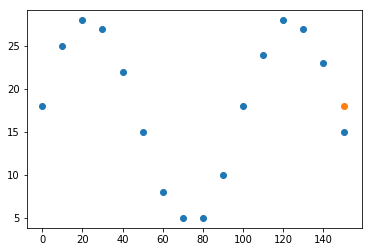

In [105]:
#AHORA PRUEBO CON VALORES FUERA DEL DATASET DE TRAINING
#(correr este bloque repetidas veces y verificar que la prediccion y el valor verdadero se parecen)
del X
X = pixels()
X.fillWithPixels()
Z = np.zeros(1*16*6)
Z = Z.reshape(1,16,6)

for i in range(16):
    for j in range(6):
        if j == 0:
            Z[0][i][j] = X[i].C1
        if j == 1:
            Z[0][i][j] = X[i].C2
        if j == 2:
            Z[0][i][j] = X[i].C3
        if j == 3:
            Z[0][i][j] = X[i].C4
        if j == 4:
            Z[0][i][j] = X[i].C5
        if j == 5:
            Z[0][i][j] = X[i].C6 

entrada = Z[0][:15]
entrada = entrada.reshape(1,15,6)
Y = np.round(model.predict(entrada))
print("prediccion: ",Y)
print("valor posta: ",Z[0][15])

#PLOTEO EL PRIMER CANAL

absisas = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]
Canal1 = np.zeros(16)

for i in range(16):
    Canal1[i] = Z[0][i][0]

plt.scatter(absisas,Canal1)
plt.scatter(150,Y[0][0])

In [106]:
X[0].getData()
X[1].getData()
X[2].getData()
X[3].getData()
X[4].getData()
X[5].getData()
X[6].getData()
X[7].getData()
X[8].getData()
X[9].getData()
X[10].getData()
X[11].getData()
X[12].getData()
X[13].getData()
X[14].getData()
X[15].getData()

C1: 18 C2: 133 C3: 226 C4: 12 C5: 104 C6: 196
C1: 25 C2: 144 C3: 16 C4: 11 C5: 83 C6: 154
C1: 28 C2: 120 C3: 224 C4: 10 C5: 62 C6: 10
C1: 27 C2: 74 C3: 17 C4: 9 C5: 44 C6: 87
C1: 22 C2: 28 C3: 223 C4: 7 C5: 28 C6: 212
C1: 15 C2: 5 C3: 19 C4: 7 C5: 16 C6: 105
C1: 8 C2: 16 C3: 221 C4: 6 C5: 8 C6: 6
C1: 5 C2: 56 C3: 21 C4: 5 C5: 4 C6: 137
C1: 5 C2: 105 C3: 219 C4: 5 C5: 6 C6: 204
C1: 10 C2: 139 C3: 23 C4: 4 C5: 13 C6: 56
C1: 18 C2: 141 C3: 217 C4: 4 C5: 24 C6: 25
C1: 24 C2: 110 C3: 25 C4: 5 C5: 39 C6: 180
C1: 28 C2: 62 C3: 215 C4: 5 C5: 57 C6: 174
C1: 27 C2: 19 C3: 27 C4: 6 C5: 77 C6: 20
C1: 23 C2: 4 C3: 213 C4: 7 C5: 98 C6: 64
C1: 15 C2: 24 C3: 29 C4: 8 C5: 118 C6: 207


In [107]:
#ARMADO DE ESTRUCTURA PARA ENTRENAMIENTO ITERATIVO DE VARIAS REDES
#La idea aqui es armar una lista de redes. La primera tiene 15 entradas, la segunda tiene 14 y asi.
#Así veré como es el trade-off entre la cantidad de entradas y la accuracy de la red

redes = []
optimizador = RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
timesteps = 15
for i in range(12):
    redes.append(Sequential())
    redes[i].add(LSTM(200, activation='relu', input_shape=(timesteps-i,6)))
    redes[i].add(Dense(100, activation='relu'))
    redes[i].add(Dense(6, activation='relu'))
    redes[i].compile(loss='mean_squared_error',
              optimizer=optimizador,
              metrics=['accuracy'])
    print("red número: ",i)
    print("tiene",timesteps-i,"entradas.")
    redes[i].summary()

red número:  0
tiene 15 entradas.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_55 (LSTM)               (None, 200)               165600    
_________________________________________________________________
dense_109 (Dense)            (None, 100)               20100     
_________________________________________________________________
dense_110 (Dense)            (None, 6)                 606       
Total params: 186,306
Trainable params: 186,306
Non-trainable params: 0
_________________________________________________________________
red número:  1
tiene 14 entradas.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_56 (LSTM)               (None, 200)               165600    
_________________________________________________________________
dense_111 (Dense)            (None, 100)               20100     
__

red número:  11
tiene 4 entradas.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_66 (LSTM)               (None, 200)               165600    
_________________________________________________________________
dense_131 (Dense)            (None, 100)               20100     
_________________________________________________________________
dense_132 (Dense)            (None, 6)                 606       
Total params: 186,306
Trainable params: 186,306
Non-trainable params: 0
_________________________________________________________________


In [108]:
#ENTRENANDO REDES DE DISTINTAS ENTRADAS
historias = []
for i in range(12):
    print("Entrenando Red Número: ", i)
    historias.append(redes[i].fit(x_train[:,:timesteps-i,:],y_train, validation_data=(x_test[:,:timesteps-i,:],y_test),epochs=100))
    redes[i].save('Red Número_'+str(i)+'_modelo')
    redes[i].save_weights('Red Número_'+str(i)+'_pesos.h5')
    

    

Entrenando Red Número:  0
Train on 10000 samples, validate on 10000 samples
Epoch 1/100
10000/10000 [==============================] - 19s 2ms/step - loss: 4414.7264 - acc: 0.2866 - val_loss: 3799.1057 - val_acc: 0.2942
Epoch 2/100
10000/10000 [==============================] - 12s 1ms/step - loss: 3683.3226 - acc: 0.3117 - val_loss: 3540.7979 - val_acc: 0.3278
Epoch 3/100
10000/10000 [==============================] - 12s 1ms/step - loss: 3397.6505 - acc: 0.3557 - val_loss: 3232.7291 - val_acc: 0.3638
Epoch 4/100
10000/10000 [==============================] - 12s 1ms/step - loss: 3136.4460 - acc: 0.3754 - val_loss: 3022.9490 - val_acc: 0.3909
Epoch 5/100
10000/10000 [==============================] - 12s 1ms/step - loss: 3023.9344 - acc: 0.3849 - val_loss: 2965.0448 - val_acc: 0.3950
Epoch 6/100
10000/10000 [==============================] - 13s 1ms/step - loss: 2975.6355 - acc: 0.3947 - val_loss: 2970.5756 - val_acc: 0.3932
Epoch 7/100
10000/10000 [==============================] - 1

10000/10000 [==============================] - 13s 1ms/step - loss: 131.8819 - acc: 0.9016 - val_loss: 148.7634 - val_acc: 0.8973
Epoch 58/100
10000/10000 [==============================] - 13s 1ms/step - loss: 127.5702 - acc: 0.9007 - val_loss: 114.1708 - val_acc: 0.9100
Epoch 59/100
10000/10000 [==============================] - 13s 1ms/step - loss: 126.7304 - acc: 0.9043 - val_loss: 118.7426 - val_acc: 0.9087
Epoch 60/100
10000/10000 [==============================] - 13s 1ms/step - loss: 123.1059 - acc: 0.9046 - val_loss: 100.3594 - val_acc: 0.9142
Epoch 61/100
10000/10000 [==============================] - 13s 1ms/step - loss: 121.1477 - acc: 0.9090 - val_loss: 120.0843 - val_acc: 0.9081
Epoch 62/100
10000/10000 [==============================] - 13s 1ms/step - loss: 119.8485 - acc: 0.9019 - val_loss: 123.1976 - val_acc: 0.9082
Epoch 63/100
10000/10000 [==============================] - 13s 1ms/step - loss: 119.8874 - acc: 0.9085 - val_loss: 101.3391 - val_acc: 0.9134
Epoch 64/100

Epoch 14/100
10000/10000 [==============================] - 12s 1ms/step - loss: 2626.4587 - acc: 0.4690 - val_loss: 2632.7983 - val_acc: 0.4645
Epoch 15/100
10000/10000 [==============================] - 12s 1ms/step - loss: 2538.9096 - acc: 0.4821 - val_loss: 2414.6389 - val_acc: 0.4994
Epoch 16/100
10000/10000 [==============================] - 12s 1ms/step - loss: 2419.1969 - acc: 0.4952 - val_loss: 2389.4843 - val_acc: 0.4994
Epoch 17/100
10000/10000 [==============================] - 12s 1ms/step - loss: 2280.3356 - acc: 0.5150 - val_loss: 2210.2233 - val_acc: 0.5285
Epoch 18/100
10000/10000 [==============================] - 12s 1ms/step - loss: 2188.2062 - acc: 0.5319 - val_loss: 2175.4136 - val_acc: 0.5342
Epoch 19/100
10000/10000 [==============================] - 12s 1ms/step - loss: 2085.9615 - acc: 0.5443 - val_loss: 2041.5314 - val_acc: 0.5522
Epoch 20/100
10000/10000 [==============================] - 12s 1ms/step - loss: 1987.3744 - acc: 0.5581 - val_loss: 1925.0935 - v

10000/10000 [==============================] - 12s 1ms/step - loss: 408.7361 - acc: 0.8333 - val_loss: 393.1327 - val_acc: 0.8332 3s - loss: 398.89 - ETA: 2s - loss: 400.7388 - acc: - ETA: 1
Epoch 71/100
10000/10000 [==============================] - 12s 1ms/step - loss: 394.8257 - acc: 0.8294 - val_loss: 507.9560 - val_acc: 0.8009
Epoch 72/100
10000/10000 [==============================] - 12s 1ms/step - loss: 386.5733 - acc: 0.8376 - val_loss: 379.3268 - val_acc: 0.8327
Epoch 73/100
10000/10000 [==============================] - 12s 1ms/step - loss: 367.2695 - acc: 0.8370 - val_loss: 406.6935 - val_acc: 0.8259
Epoch 74/100
10000/10000 [==============================] - 12s 1ms/step - loss: 361.2837 - acc: 0.8396 - val_loss: 383.7155 - val_acc: 0.8270
Epoch 75/100
10000/10000 [==============================] - 12s 1ms/step - loss: 345.4623 - acc: 0.8457 - val_loss: 359.3964 - val_acc: 0.8392
Epoch 76/100
10000/10000 [==============================] - 12s 1ms/step - loss: 333.8860 - ac

10000/10000 [==============================] - 11s 1ms/step - loss: 2552.8218 - acc: 0.4734 - val_loss: 2482.1661 - val_acc: 0.4888
Epoch 27/100
10000/10000 [==============================] - 11s 1ms/step - loss: 2539.3836 - acc: 0.4779 - val_loss: 2453.8000 - val_acc: 0.4892
Epoch 28/100
10000/10000 [==============================] - 11s 1ms/step - loss: 2512.5072 - acc: 0.4790 - val_loss: 2456.2471 - val_acc: 0.4977
Epoch 29/100
10000/10000 [==============================] - 11s 1ms/step - loss: 2498.4283 - acc: 0.4817 - val_loss: 2415.8737 - val_acc: 0.4982
Epoch 30/100
10000/10000 [==============================] - 11s 1ms/step - loss: 2474.8457 - acc: 0.4911 - val_loss: 2392.1068 - val_acc: 0.5103
Epoch 31/100
10000/10000 [==============================] - 11s 1ms/step - loss: 2457.6860 - acc: 0.4988 - val_loss: 2409.2060 - val_acc: 0.5044
Epoch 32/100
10000/10000 [==============================] - 11s 1ms/step - loss: 2436.2572 - acc: 0.4986 - val_loss: 2384.8027 - val_acc: 0.501

10000/10000 [==============================] - 11s 1ms/step - loss: 1107.7756 - acc: 0.6976 - val_loss: 1101.1665 - val_acc: 0.7090
Epoch 83/100
10000/10000 [==============================] - 11s 1ms/step - loss: 1089.1414 - acc: 0.7042 - val_loss: 976.3260 - val_acc: 0.7232
Epoch 84/100
10000/10000 [==============================] - 11s 1ms/step - loss: 1073.9301 - acc: 0.7049 - val_loss: 961.5849 - val_acc: 0.7194
Epoch 85/100
10000/10000 [==============================] - 11s 1ms/step - loss: 1068.8699 - acc: 0.7087 - val_loss: 1007.2331 - val_acc: 0.7163
Epoch 86/100
10000/10000 [==============================] - 11s 1ms/step - loss: 1059.8794 - acc: 0.7073 - val_loss: 967.7757 - val_acc: 0.7184
Epoch 87/100
10000/10000 [==============================] - 11s 1ms/step - loss: 1051.7480 - acc: 0.7070 - val_loss: 955.7968 - val_acc: 0.7191
Epoch 88/100
10000/10000 [==============================] - 11s 1ms/step - loss: 1053.2708 - acc: 0.7046 - val_loss: 1015.2343 - val_acc: 0.7116
Ep

10000/10000 [==============================] - 11s 1ms/step - loss: 2563.8896 - acc: 0.4743 - val_loss: 2521.9301 - val_acc: 0.4840
Epoch 39/100
10000/10000 [==============================] - 11s 1ms/step - loss: 2550.9235 - acc: 0.4724 - val_loss: 2444.6671 - val_acc: 0.4897
Epoch 40/100
10000/10000 [==============================] - 11s 1ms/step - loss: 2526.0838 - acc: 0.4810 - val_loss: 2462.8912 - val_acc: 0.4995
Epoch 41/100
10000/10000 [==============================] - 11s 1ms/step - loss: 2518.6584 - acc: 0.4843 - val_loss: 2429.5878 - val_acc: 0.5026
Epoch 42/100
10000/10000 [==============================] - 11s 1ms/step - loss: 2486.9746 - acc: 0.4861 - val_loss: 2404.8212 - val_acc: 0.5069
Epoch 43/100
10000/10000 [==============================] - 11s 1ms/step - loss: 2482.9985 - acc: 0.4926 - val_loss: 2388.9766 - val_acc: 0.4955
Epoch 44/100
10000/10000 [==============================] - 11s 1ms/step - loss: 2479.6453 - acc: 0.4931 - val_loss: 2386.5337 - val_acc: 0.510

10000/10000 [==============================] - 11s 1ms/step - loss: 1877.9079 - acc: 0.5934 - val_loss: 1826.1769 - val_acc: 0.5940
Epoch 95/100
10000/10000 [==============================] - 11s 1ms/step - loss: 1889.4650 - acc: 0.5882 - val_loss: 1775.4164 - val_acc: 0.6076
Epoch 96/100
10000/10000 [==============================] - 11s 1ms/step - loss: 1866.0479 - acc: 0.5906 - val_loss: 1788.8088 - val_acc: 0.5978
Epoch 97/100
10000/10000 [==============================] - 11s 1ms/step - loss: 1875.8366 - acc: 0.5878 - val_loss: 1767.5251 - val_acc: 0.6040
Epoch 98/100
10000/10000 [==============================] - 11s 1ms/step - loss: 1882.1400 - acc: 0.5825 - val_loss: 1820.3804 - val_acc: 0.5952s - loss: 1882.5381 - acc: 
Epoch 99/100
10000/10000 [==============================] - 11s 1ms/step - loss: 1861.1115 - acc: 0.5931 - val_loss: 1791.3899 - val_acc: 0.5994
Epoch 100/100
10000/10000 [==============================] - 11s 1ms/step - loss: 1854.2518 - acc: 0.5889 - val_loss

Epoch 50/100
10000/10000 [==============================] - 10s 996us/step - loss: 2380.0532 - acc: 0.5105 - val_loss: 2277.0123 - val_acc: 0.5262
Epoch 51/100
10000/10000 [==============================] - 10s 1ms/step - loss: 2363.1520 - acc: 0.5179 - val_loss: 2321.3556 - val_acc: 0.5139
Epoch 52/100
10000/10000 [==============================] - 10s 1ms/step - loss: 2375.8508 - acc: 0.5111 - val_loss: 2330.0257 - val_acc: 0.5078
Epoch 53/100
10000/10000 [==============================] - 10s 1ms/step - loss: 2369.8539 - acc: 0.5071 - val_loss: 2322.6115 - val_acc: 0.5244
Epoch 54/100
10000/10000 [==============================] - 10s 1ms/step - loss: 2356.0164 - acc: 0.5119 - val_loss: 2313.8704 - val_acc: 0.5239
Epoch 55/100
10000/10000 [==============================] - 10s 999us/step - loss: 2347.9068 - acc: 0.5165 - val_loss: 2263.5020 - val_acc: 0.5331
Epoch 56/100
10000/10000 [==============================] - 10s 1ms/step - loss: 2312.5539 - acc: 0.5188 - val_loss: 2242.2522

Epoch 6/100
10000/10000 [==============================] - 9s 919us/step - loss: 2981.9203 - acc: 0.3987 - val_loss: 2976.1415 - val_acc: 0.3999
Epoch 7/100
10000/10000 [==============================] - 9s 912us/step - loss: 2966.8433 - acc: 0.4009 - val_loss: 2917.5839 - val_acc: 0.4065
Epoch 8/100
10000/10000 [==============================] - 9s 913us/step - loss: 2945.2823 - acc: 0.4081 - val_loss: 2905.3511 - val_acc: 0.4113
Epoch 9/100
10000/10000 [==============================] - 9s 913us/step - loss: 2921.2967 - acc: 0.4052 - val_loss: 2856.7570 - val_acc: 0.4188
Epoch 10/100
10000/10000 [==============================] - 9s 912us/step - loss: 2924.4029 - acc: 0.4070 - val_loss: 2903.3758 - val_acc: 0.4133
Epoch 11/100
10000/10000 [==============================] - 9s 912us/step - loss: 2915.4519 - acc: 0.4123 - val_loss: 2864.2347 - val_acc: 0.4193
Epoch 12/100
10000/10000 [==============================] - 9s 910us/step - loss: 2888.3097 - acc: 0.4146 - val_loss: 2869.9773 

10000/10000 [==============================] - 9s 907us/step - loss: 2283.3640 - acc: 0.5341 - val_loss: 2204.3705 - val_acc: 0.5356
Epoch 63/100
10000/10000 [==============================] - 9s 914us/step - loss: 2274.6954 - acc: 0.5324 - val_loss: 2183.4417 - val_acc: 0.5436
Epoch 64/100
10000/10000 [==============================] - 9s 911us/step - loss: 2271.8338 - acc: 0.5268 - val_loss: 2171.7569 - val_acc: 0.5435
Epoch 65/100
10000/10000 [==============================] - 9s 909us/step - loss: 2259.9020 - acc: 0.5246 - val_loss: 2197.8719 - val_acc: 0.5411
Epoch 66/100
10000/10000 [==============================] - 9s 913us/step - loss: 2260.9120 - acc: 0.5349 - val_loss: 2168.7602 - val_acc: 0.5408
Epoch 67/100
10000/10000 [==============================] - 9s 910us/step - loss: 2259.6214 - acc: 0.5329 - val_loss: 2151.7960 - val_acc: 0.5458
Epoch 68/100
10000/10000 [==============================] - 9s 917us/step - loss: 2238.9944 - acc: 0.5283 - val_loss: 2162.1612 - val_acc

Epoch 18/100
10000/10000 [==============================] - 8s 845us/step - loss: 2700.8341 - acc: 0.4551 - val_loss: 2630.1019 - val_acc: 0.4649
Epoch 19/100
10000/10000 [==============================] - 8s 844us/step - loss: 2678.6636 - acc: 0.4563 - val_loss: 2581.1263 - val_acc: 0.4688
Epoch 20/100
10000/10000 [==============================] - 8s 845us/step - loss: 2652.6221 - acc: 0.4548 - val_loss: 2561.3767 - val_acc: 0.4704
Epoch 21/100
10000/10000 [==============================] - 8s 845us/step - loss: 2604.4641 - acc: 0.4721 - val_loss: 2497.9749 - val_acc: 0.4840
Epoch 22/100
10000/10000 [==============================] - 8s 849us/step - loss: 2613.2831 - acc: 0.4679 - val_loss: 2556.3799 - val_acc: 0.4839
Epoch 23/100
10000/10000 [==============================] - 9s 858us/step - loss: 2595.6498 - acc: 0.4721 - val_loss: 2552.4365 - val_acc: 0.4793
Epoch 24/100
10000/10000 [==============================] - 9s 869us/step - loss: 2577.4443 - acc: 0.4782 - val_loss: 2510.6

10000/10000 [==============================] - 8s 848us/step - loss: 1769.8365 - acc: 0.6029 - val_loss: 1673.5620 - val_acc: 0.6194
Epoch 75/100
10000/10000 [==============================] - 8s 849us/step - loss: 1742.8607 - acc: 0.6112 - val_loss: 1630.1522 - val_acc: 0.6263
Epoch 76/100
10000/10000 [==============================] - 8s 849us/step - loss: 1723.5085 - acc: 0.6120 - val_loss: 1628.3968 - val_acc: 0.6288
Epoch 77/100
10000/10000 [==============================] - 9s 861us/step - loss: 1699.8903 - acc: 0.6218 - val_loss: 1610.9488 - val_acc: 0.6250
Epoch 78/100
10000/10000 [==============================] - 8s 850us/step - loss: 1703.4675 - acc: 0.6157 - val_loss: 1601.0240 - val_acc: 0.6268
Epoch 79/100
10000/10000 [==============================] - 8s 849us/step - loss: 1698.2293 - acc: 0.6094 - val_loss: 1634.1503 - val_acc: 0.6287
Epoch 80/100
10000/10000 [==============================] - 9s 852us/step - loss: 1695.6121 - acc: 0.6101 - val_loss: 1578.0746 - val_acc

10000/10000 [==============================] - 8s 783us/step - loss: 2495.2757 - acc: 0.4975 - val_loss: 2398.5003 - val_acc: 0.5007
Epoch 30/100
10000/10000 [==============================] - 8s 817us/step - loss: 2498.3036 - acc: 0.4834 - val_loss: 2421.0745 - val_acc: 0.4972
Epoch 31/100
10000/10000 [==============================] - 8s 800us/step - loss: 2484.9262 - acc: 0.4883 - val_loss: 2499.9350 - val_acc: 0.4843
Epoch 32/100
10000/10000 [==============================] - 8s 787us/step - loss: 2502.7653 - acc: 0.4887 - val_loss: 2411.6143 - val_acc: 0.5004
Epoch 33/100
10000/10000 [==============================] - 8s 786us/step - loss: 2468.2344 - acc: 0.4968 - val_loss: 2388.5226 - val_acc: 0.5094
Epoch 34/100
10000/10000 [==============================] - 8s 782us/step - loss: 2452.7728 - acc: 0.4962 - val_loss: 2342.0781 - val_acc: 0.5123
Epoch 35/100
10000/10000 [==============================] - 8s 785us/step - loss: 2425.3346 - acc: 0.5008 - val_loss: 2304.0880 - val_acc

10000/10000 [==============================] - 8s 783us/step - loss: 1916.2832 - acc: 0.5783 - val_loss: 1850.6997 - val_acc: 0.5927
Epoch 86/100
10000/10000 [==============================] - 8s 798us/step - loss: 1913.3643 - acc: 0.5830 - val_loss: 1857.3435 - val_acc: 0.5931
Epoch 87/100
10000/10000 [==============================] - 8s 783us/step - loss: 1931.1132 - acc: 0.5858 - val_loss: 1735.3630 - val_acc: 0.6034
Epoch 88/100
10000/10000 [==============================] - 8s 789us/step - loss: 1896.2676 - acc: 0.5818 - val_loss: 1772.6152 - val_acc: 0.6042
Epoch 89/100
10000/10000 [==============================] - 8s 789us/step - loss: 1901.1769 - acc: 0.5869 - val_loss: 1778.0770 - val_acc: 0.6056
Epoch 90/100
10000/10000 [==============================] - 8s 790us/step - loss: 1854.0130 - acc: 0.5873 - val_loss: 1738.8489 - val_acc: 0.6086
Epoch 91/100
10000/10000 [==============================] - 8s 788us/step - loss: 1882.6177 - acc: 0.5882 - val_loss: 1745.7554 - val_acc

Epoch 41/100
10000/10000 [==============================] - 7s 719us/step - loss: 2070.5073 - acc: 0.5561 - val_loss: 1961.1411 - val_acc: 0.5713
Epoch 42/100
10000/10000 [==============================] - 7s 722us/step - loss: 2070.3332 - acc: 0.5532 - val_loss: 1985.6029 - val_acc: 0.5694
Epoch 43/100
10000/10000 [==============================] - 7s 725us/step - loss: 2044.9049 - acc: 0.5616 - val_loss: 1960.9813 - val_acc: 0.5772 2
Epoch 44/100
10000/10000 [==============================] - 7s 730us/step - loss: 2025.2260 - acc: 0.5642 - val_loss: 1969.5288 - val_acc: 0.5780
Epoch 45/100
10000/10000 [==============================] - 7s 741us/step - loss: 2022.0211 - acc: 0.5606 - val_loss: 1931.2599 - val_acc: 0.5823
Epoch 46/100
10000/10000 [==============================] - 7s 744us/step - loss: 2026.5754 - acc: 0.5651 - val_loss: 1890.8562 - val_acc: 0.5810
Epoch 47/100
10000/10000 [==============================] - 7s 740us/step - loss: 2002.0068 - acc: 0.5701 - val_loss: 1905

10000/10000 [==============================] - 7s 728us/step - loss: 1547.0968 - acc: 0.6367 - val_loss: 1434.0368 - val_acc: 0.6555
Epoch 97/100
10000/10000 [==============================] - 7s 721us/step - loss: 1522.8259 - acc: 0.6443 - val_loss: 1523.2148 - val_acc: 0.6479
Epoch 98/100
10000/10000 [==============================] - 7s 727us/step - loss: 1531.7418 - acc: 0.6429 - val_loss: 1489.7048 - val_acc: 0.6432
Epoch 99/100
10000/10000 [==============================] - 7s 723us/step - loss: 1514.4622 - acc: 0.6455 - val_loss: 1425.7564 - val_acc: 0.6594
Epoch 100/100
10000/10000 [==============================] - 7s 725us/step - loss: 1515.4922 - acc: 0.6398 - val_loss: 1417.3212 - val_acc: 0.6608
Entrenando Red Número:  9
Train on 10000 samples, validate on 10000 samples
Epoch 1/100
10000/10000 [==============================] - 13s 1ms/step - loss: 3369.1118 - acc: 0.3543 - val_loss: 3152.3015 - val_acc: 0.3827
Epoch 2/100
10000/10000 [==============================] - 7s 

Epoch 52/100
10000/10000 [==============================] - 7s 661us/step - loss: 2049.9555 - acc: 0.5618 - val_loss: 1973.1222 - val_acc: 0.5752
Epoch 53/100
10000/10000 [==============================] - 7s 666us/step - loss: 2051.3372 - acc: 0.5582 - val_loss: 1959.0741 - val_acc: 0.5779
Epoch 54/100
10000/10000 [==============================] - 7s 663us/step - loss: 2033.3610 - acc: 0.5634 - val_loss: 1965.8093 - val_acc: 0.5758
Epoch 55/100
10000/10000 [==============================] - 7s 662us/step - loss: 2024.6909 - acc: 0.5688 - val_loss: 1894.4621 - val_acc: 0.5871
Epoch 56/100
10000/10000 [==============================] - 7s 663us/step - loss: 2006.6340 - acc: 0.5699 - val_loss: 1879.6330 - val_acc: 0.5907
Epoch 57/100
10000/10000 [==============================] - 7s 668us/step - loss: 2005.6968 - acc: 0.5722 - val_loss: 1934.7125 - val_acc: 0.5747
Epoch 58/100
10000/10000 [==============================] - 7s 661us/step - loss: 1992.6320 - acc: 0.5753 - val_loss: 1940.8

10000/10000 [==============================] - 6s 584us/step - loss: 2990.1200 - acc: 0.3994 - val_loss: 2902.7484 - val_acc: 0.4205
Epoch 8/100
10000/10000 [==============================] - 6s 585us/step - loss: 2959.5238 - acc: 0.4081 - val_loss: 2928.8647 - val_acc: 0.4204
Epoch 9/100
10000/10000 [==============================] - 6s 588us/step - loss: 2928.6406 - acc: 0.4131 - val_loss: 2883.3555 - val_acc: 0.4326
Epoch 10/100
10000/10000 [==============================] - 6s 588us/step - loss: 2892.9526 - acc: 0.4255 - val_loss: 2816.5099 - val_acc: 0.4318
Epoch 11/100
10000/10000 [==============================] - 6s 589us/step - loss: 2863.3254 - acc: 0.4310 - val_loss: 2761.2945 - val_acc: 0.4489
Epoch 12/100
10000/10000 [==============================] - 6s 588us/step - loss: 2832.3893 - acc: 0.4310 - val_loss: 2799.8081 - val_acc: 0.4399
Epoch 13/100
10000/10000 [==============================] - 6s 588us/step - loss: 2796.6908 - acc: 0.4419 - val_loss: 2716.4412 - val_acc: 

10000/10000 [==============================] - 6s 594us/step - loss: 1607.3656 - acc: 0.6247 - val_loss: 1551.8558 - val_acc: 0.6330
Epoch 63/100
10000/10000 [==============================] - 6s 586us/step - loss: 1623.8802 - acc: 0.6186 - val_loss: 1460.0868 - val_acc: 0.6467
Epoch 64/100
10000/10000 [==============================] - 6s 587us/step - loss: 1594.6117 - acc: 0.6302 - val_loss: 1517.0583 - val_acc: 0.6349
Epoch 65/100
10000/10000 [==============================] - 6s 585us/step - loss: 1582.2266 - acc: 0.6235 - val_loss: 1477.2949 - val_acc: 0.6360
Epoch 66/100
10000/10000 [==============================] - 6s 586us/step - loss: 1588.0770 - acc: 0.6193 - val_loss: 1495.1831 - val_acc: 0.6377
Epoch 67/100
10000/10000 [==============================] - 6s 587us/step - loss: 1592.8007 - acc: 0.6225 - val_loss: 1490.2851 - val_acc: 0.6367
Epoch 68/100
10000/10000 [==============================] - 6s 588us/step - loss: 1556.0133 - acc: 0.6301 - val_loss: 1448.0545 - val_acc

10000/10000 [==============================] - 5s 518us/step - loss: 2741.5218 - acc: 0.4448 - val_loss: 2629.7550 - val_acc: 0.4646
Epoch 18/100
10000/10000 [==============================] - 5s 525us/step - loss: 2713.4548 - acc: 0.4490 - val_loss: 2625.5419 - val_acc: 0.4690
Epoch 19/100
10000/10000 [==============================] - 5s 521us/step - loss: 2674.4211 - acc: 0.4541 - val_loss: 2573.0369 - val_acc: 0.4754
Epoch 20/100
10000/10000 [==============================] - 5s 541us/step - loss: 2653.1413 - acc: 0.4614 - val_loss: 2576.6632 - val_acc: 0.4730
Epoch 21/100
10000/10000 [==============================] - 5s 533us/step - loss: 2622.1581 - acc: 0.4715 - val_loss: 2490.4032 - val_acc: 0.4823
Epoch 22/100
10000/10000 [==============================] - 5s 542us/step - loss: 2580.1989 - acc: 0.4715 - val_loss: 2460.8984 - val_acc: 0.4926
Epoch 23/100
10000/10000 [==============================] - 5s 526us/step - loss: 2538.3307 - acc: 0.4759 - val_loss: 2420.1092 - val_acc

10000/10000 [==============================] - 5s 522us/step - loss: 1485.2630 - acc: 0.6447 - val_loss: 1370.6463 - val_acc: 0.6574
Epoch 74/100
10000/10000 [==============================] - 5s 519us/step - loss: 1464.2966 - acc: 0.6459 - val_loss: 1394.8423 - val_acc: 0.6644
Epoch 75/100
10000/10000 [==============================] - 5s 519us/step - loss: 1465.1270 - acc: 0.6506 - val_loss: 1356.6373 - val_acc: 0.6632
Epoch 76/100
10000/10000 [==============================] - 5s 519us/step - loss: 1448.9004 - acc: 0.6502 - val_loss: 1339.5676 - val_acc: 0.6705
Epoch 77/100
10000/10000 [==============================] - 5s 539us/step - loss: 1452.1817 - acc: 0.6503 - val_loss: 1336.9914 - val_acc: 0.6614
Epoch 78/100
10000/10000 [==============================] - 5s 531us/step - loss: 1415.3035 - acc: 0.6557 - val_loss: 1332.3075 - val_acc: 0.6697
Epoch 79/100
10000/10000 [==============================] - 5s 541us/step - loss: 1425.7290 - acc: 0.6506 - val_loss: 1308.6286 - val_acc

Mostrando datos de Red Número:  0
La cual tiene  15  entradas.
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


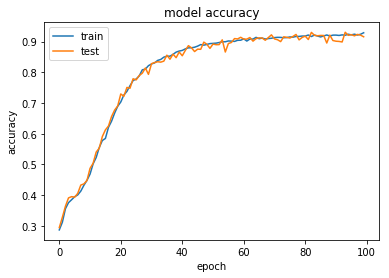

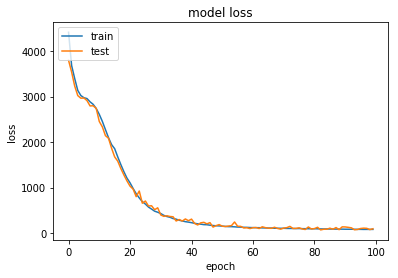

Mostrando datos de Red Número:  1
La cual tiene  14  entradas.
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


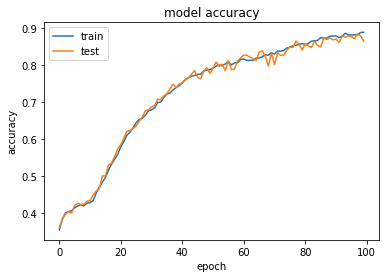

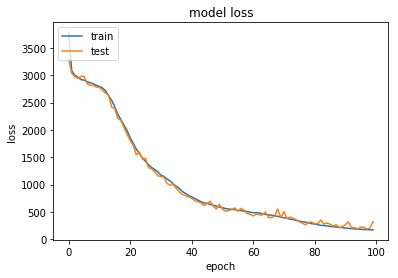

Mostrando datos de Red Número:  2
La cual tiene  13  entradas.
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


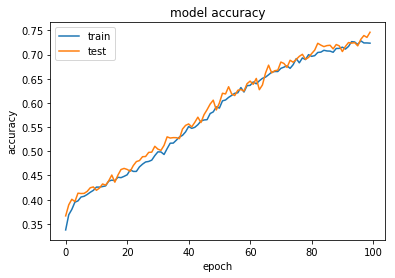

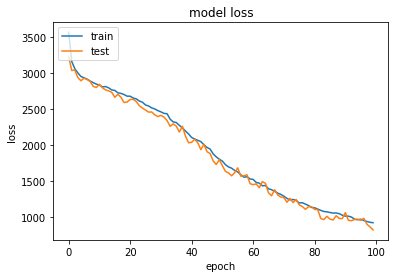

Mostrando datos de Red Número:  3
La cual tiene  12  entradas.
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


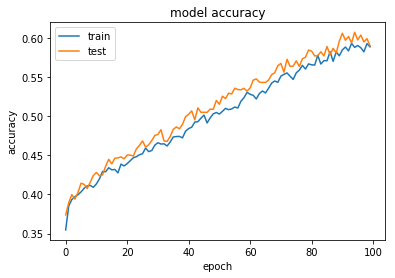

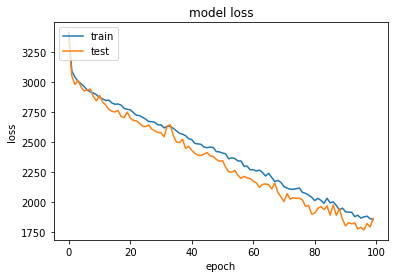

Mostrando datos de Red Número:  4
La cual tiene  11  entradas.
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


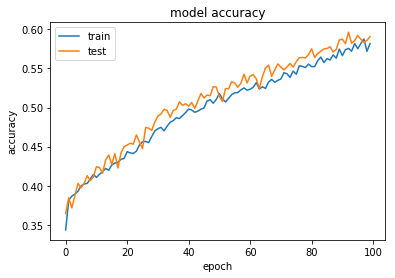

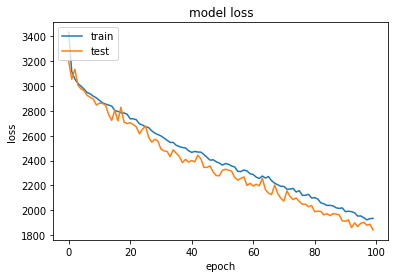

Mostrando datos de Red Número:  5
La cual tiene  10  entradas.
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


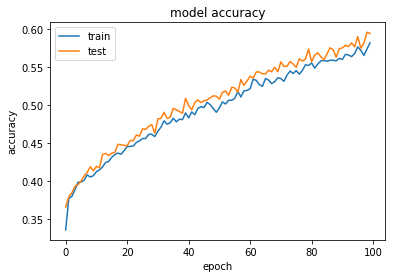

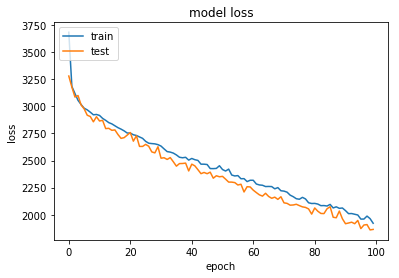

Mostrando datos de Red Número:  6
La cual tiene  9  entradas.
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


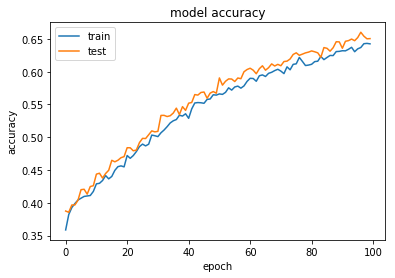

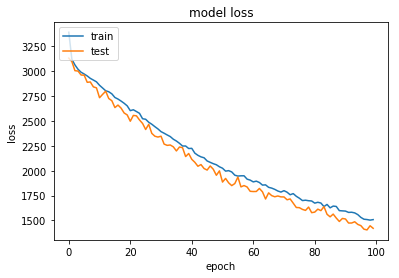

Mostrando datos de Red Número:  7
La cual tiene  8  entradas.
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


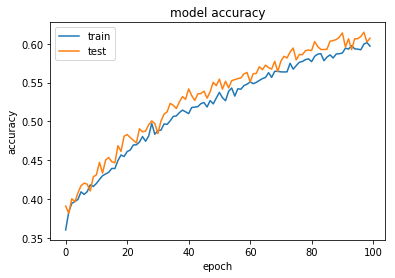

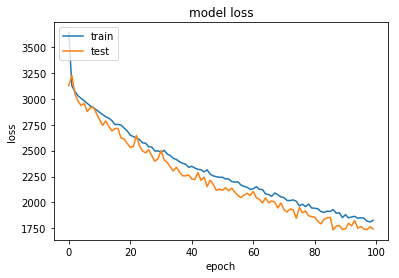

Mostrando datos de Red Número:  8
La cual tiene  7  entradas.
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


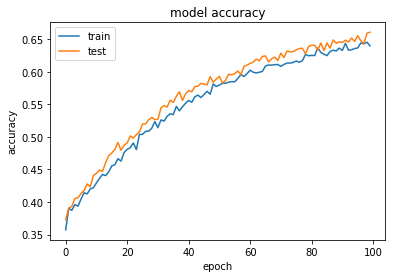

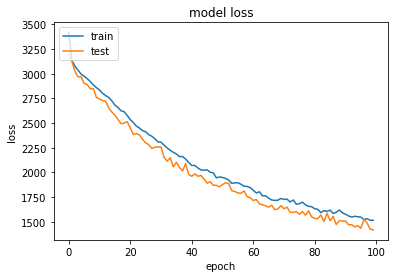

Mostrando datos de Red Número:  9
La cual tiene  6  entradas.
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


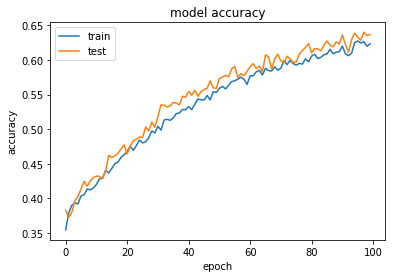

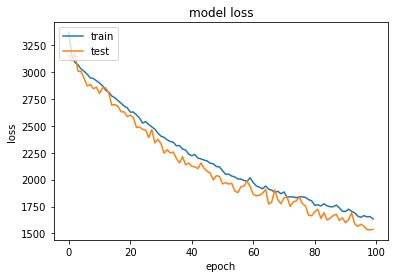

Mostrando datos de Red Número:  10
La cual tiene  5  entradas.
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


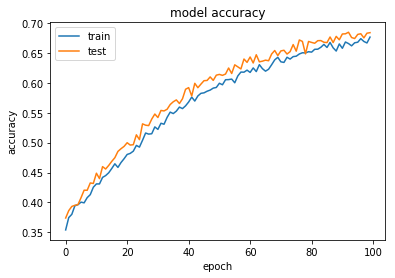

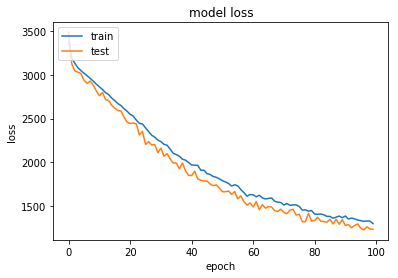

Mostrando datos de Red Número:  11
La cual tiene  4  entradas.
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


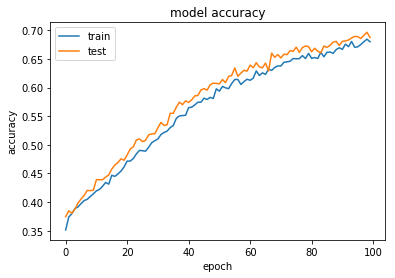

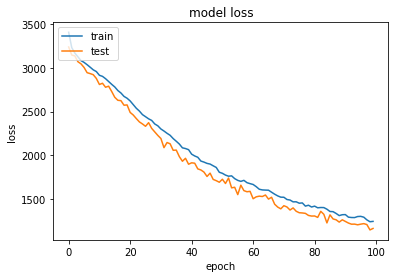

In [109]:
#MOSTRANDO RESULTADOS DE ENTRENAMIENTO
for i in range(12):
    print("Mostrando datos de Red Número: ", i)
    print("La cual tiene ", timesteps-i, " entradas.")
    # list all data in history
    print(historias[i].history.keys())
    # summarize history for accuracy
    plt.plot(historias[i].history['acc'])
    plt.plot(historias[i].history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(historias[i].history['loss'])
    plt.plot(historias[i].history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


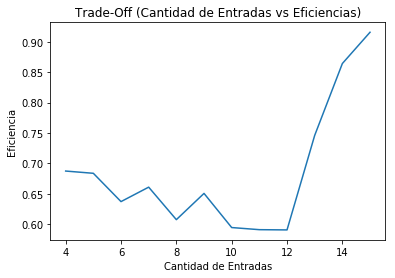

In [110]:
#ANÁLISIS DEL TRADE-OFF ENTRE CANTIDAD DE ENTRADAS Y EFICIENCIA DE LA RED
eficiencias = np.zeros(12)
cantEntradas = np.array([15,14,13,12,11,10,9,8,7,6,5,4])
cantEpochs = np.array(historias[0].history['val_acc']).size
for i in range(12):
    eficiencias[i] = np.array(historias[i].history['val_acc'])[cantEpochs-1]
    
plt.plot(cantEntradas,eficiencias)
plt.title('Trade-Off (Cantidad de Entradas vs Eficiencias)')
plt.ylabel('Eficiencia')
plt.xlabel('Cantidad de Entradas')
plt.show()

a1:  5 A1:  63 frec1:  1.2157175258086446 b 2.9769684974781656
prediccion:  [[  8.  25. 116.  51. 100.  73.]]
valor posta:  [  9. 131.  19.  52. 186.  29.]


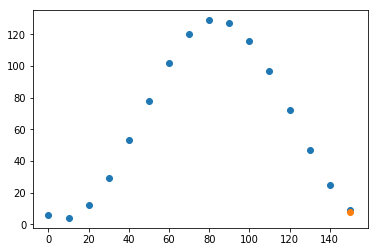

In [119]:
#AHORA PRUEBO LA RED 11 (que es la que tiene solo 4 entradas) Y VEO QUE TAL SE COMPORTA
#Y GRAFICO EL RESULTADO

del X
X = pixels()
X.fillWithPixels()
Z = np.zeros(1*16*6)
Z = Z.reshape(1,16,6)

for i in range(16):
    for j in range(6):
        if j == 0:
            Z[0][i][j] = X[i].C1
        if j == 1:
            Z[0][i][j] = X[i].C2
        if j == 2:
            Z[0][i][j] = X[i].C3
        if j == 3:
            Z[0][i][j] = X[i].C4
        if j == 4:
            Z[0][i][j] = X[i].C5
        if j == 5:
            Z[0][i][j] = X[i].C6 

entrada = Z[0][:4]
entrada = entrada.reshape(1,4,6)
Y = np.round(redes[11].predict(entrada))
print("prediccion: ",Y)
print("valor posta: ",Z[0][15])

#PLOTEO EL PRIMER CANAL

absisas = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]
Canal1 = np.zeros(16)

for i in range(16):
    Canal1[i] = Z[0][i][0]

plt.scatter(absisas,Canal1)
plt.scatter(150,Y[0][0])